#                   CAPSTONE PROJECT-FINAL NOTEBOOK


##### IMPORTING THE LIBRARIES AND READING THE DATASET-INVEHICLE COUPON RECOMMENDATION

In [1]:
# Importing The Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder


# Data Preparation
from sklearn.model_selection import train_test_split


# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier
# import the XGBoost function for classification
from xgboost import XGBClassifier

# Model Tunning
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

# Model With Regularization
from sklearn.linear_model import Ridge,Lasso,ElasticNet,SGDClassifier

# Feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,roc_auc_score,precision_score,recall_score,classification_report,confusion_matrix,r2_score,f1_score

# Ignoring Warnings
from warnings import filterwarnings
filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Reading the file

In [2]:
#Reading The DataSet
df=pd.read_csv('in-vehicle-coupon-recommendation.csv') #reading the dataset and assigning it to a variable with a name 'df'
df.head() #Reading first 5 Entries

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.tail() #Reading last 5 Entries

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [4]:
df.shape #shape of The Data

(12684, 26)

In [5]:
print('Number of Rows in the Dataset is:',df.shape[0])
print('Number of Columns in the Dataset is:',df.shape[1])

Number of Rows in the Dataset is: 12684
Number of Columns in the Dataset is: 26


In [6]:
#12684 Rows/Attributes,26-Columns/Features

###### IDENTIFYING THE UNIQUE FEATURE:-

In [7]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

INFERENCE:-
IN 'toCoupon_GEQ5min' All Columns  have Unique Feature Except'toCoupon_GEQ5min'(Non-distinct one) and so it has only one unique variable which won't help much in the Further processing of Data Like Encoding of the categorical variables.Therefore we can better do drop 'toCoupon_GEQ5min' column

DROPPING 'toCoupon_GEQ5min'

In [8]:
#But Before Dropping it We Try To Get Some INference From toCoupon_GEQ5min

In [9]:
df['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [10]:
df['toCoupon_GEQ5min'].value_counts().sum()

12684

In [11]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True,axis=1)

In [12]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

###### INFERENCE:-
    NOW ALL COLUMNS SEEMS TO BE UNIQUE WITH DISTINCT FEATURE

##### IDENTIFYING THE DATATYPES OF THE DATASET

In [13]:
df.dtypes #Checking For DataTypes For Seperating The Dataset Column into Numerical/Continuous and Categorical

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

INFERENCE:IT LOOKS LIKE COMBINATION OF NUMERICAL AND CATEGORICAL,BUT DATATYPES ARE MISMATCHED

###### Count the datatypes

In [14]:
df.dtypes.value_counts()

object    18
int64      7
dtype: int64

In [15]:
#Categorical/Object-18Columns
#Numerical-7Columns  

    INFERENCE:-
        CHANGING THE DATA TYPE OF COLUMN 'TEMPERATURE' FROM NUMERIC/CONTINUOUS TO CATEGORICAL

In [16]:
df['temperature']

0        55
1        80
2        80
3        80
4        80
         ..
12679    55
12680    55
12681    30
12682    30
12683    80
Name: temperature, Length: 12684, dtype: int64

In [17]:
df['temperature'].unique()

array([55, 80, 30], dtype=int64)

In [18]:
df['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [19]:
df['temperature']=df['temperature'].astype('object') #NUMERICAL TO CATEGORY BECAUSE IT HAS 3 UNIQUE FREQUENCY VARIABLES

In [20]:
df['temperature'].dtypes

dtype('O')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  object
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [22]:
df.describe(include="object").T

,count,unique,top,freq
destination,12684,3,No Urgent Place,6283
passanger,12684,4,Alone,7305
weather,12684,3,Sunny,10069
temperature,12684,3,80,6528
time,12684,5,6PM,3230
coupon,12684,5,Coffee House,3996
expiration,12684,2,1d,7091
gender,12684,2,Female,6511
age,12684,8,21,2653
maritalStatus,12684,5,Married partner,5100


# Checking Imbalance on Target Variables

In [23]:
df.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [24]:
df["Y"].value_counts(normalize=True)

1    0.568433
0    0.431567
Name: Y, dtype: float64

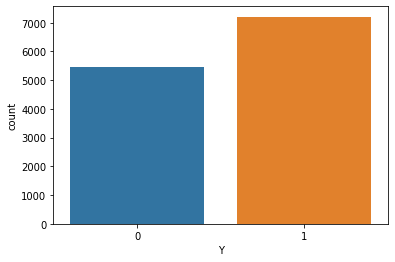

In [25]:
sns.countplot(df["Y"])
plt.show()

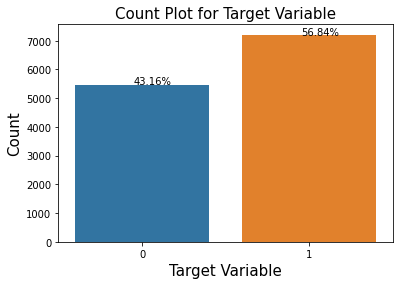

In [26]:
# plot the countplot of the target variable
sns.countplot(x = df['Y'])


plt.text(x = -0.05, y = df.Y.value_counts()[0] + 1, s = str(round((df.Y.value_counts()[0])*100/len(df.Y),2)) + '%')
plt.text(x = 0.95, y = df.Y.value_counts()[1] +1, s = str(round((df.Y.value_counts()[1])*100/len(df.Y),2)) + '%')


plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [27]:
#Target variable Data is nearly Balanced Data(56.84-43.16=13.68) Which is Less Than 15%(Not More than 15-20%),hence they are good for prediction

##### VISUALIZATION

###### UNIVARIATE ANALYSIS(CATEGORICAL)

In [28]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

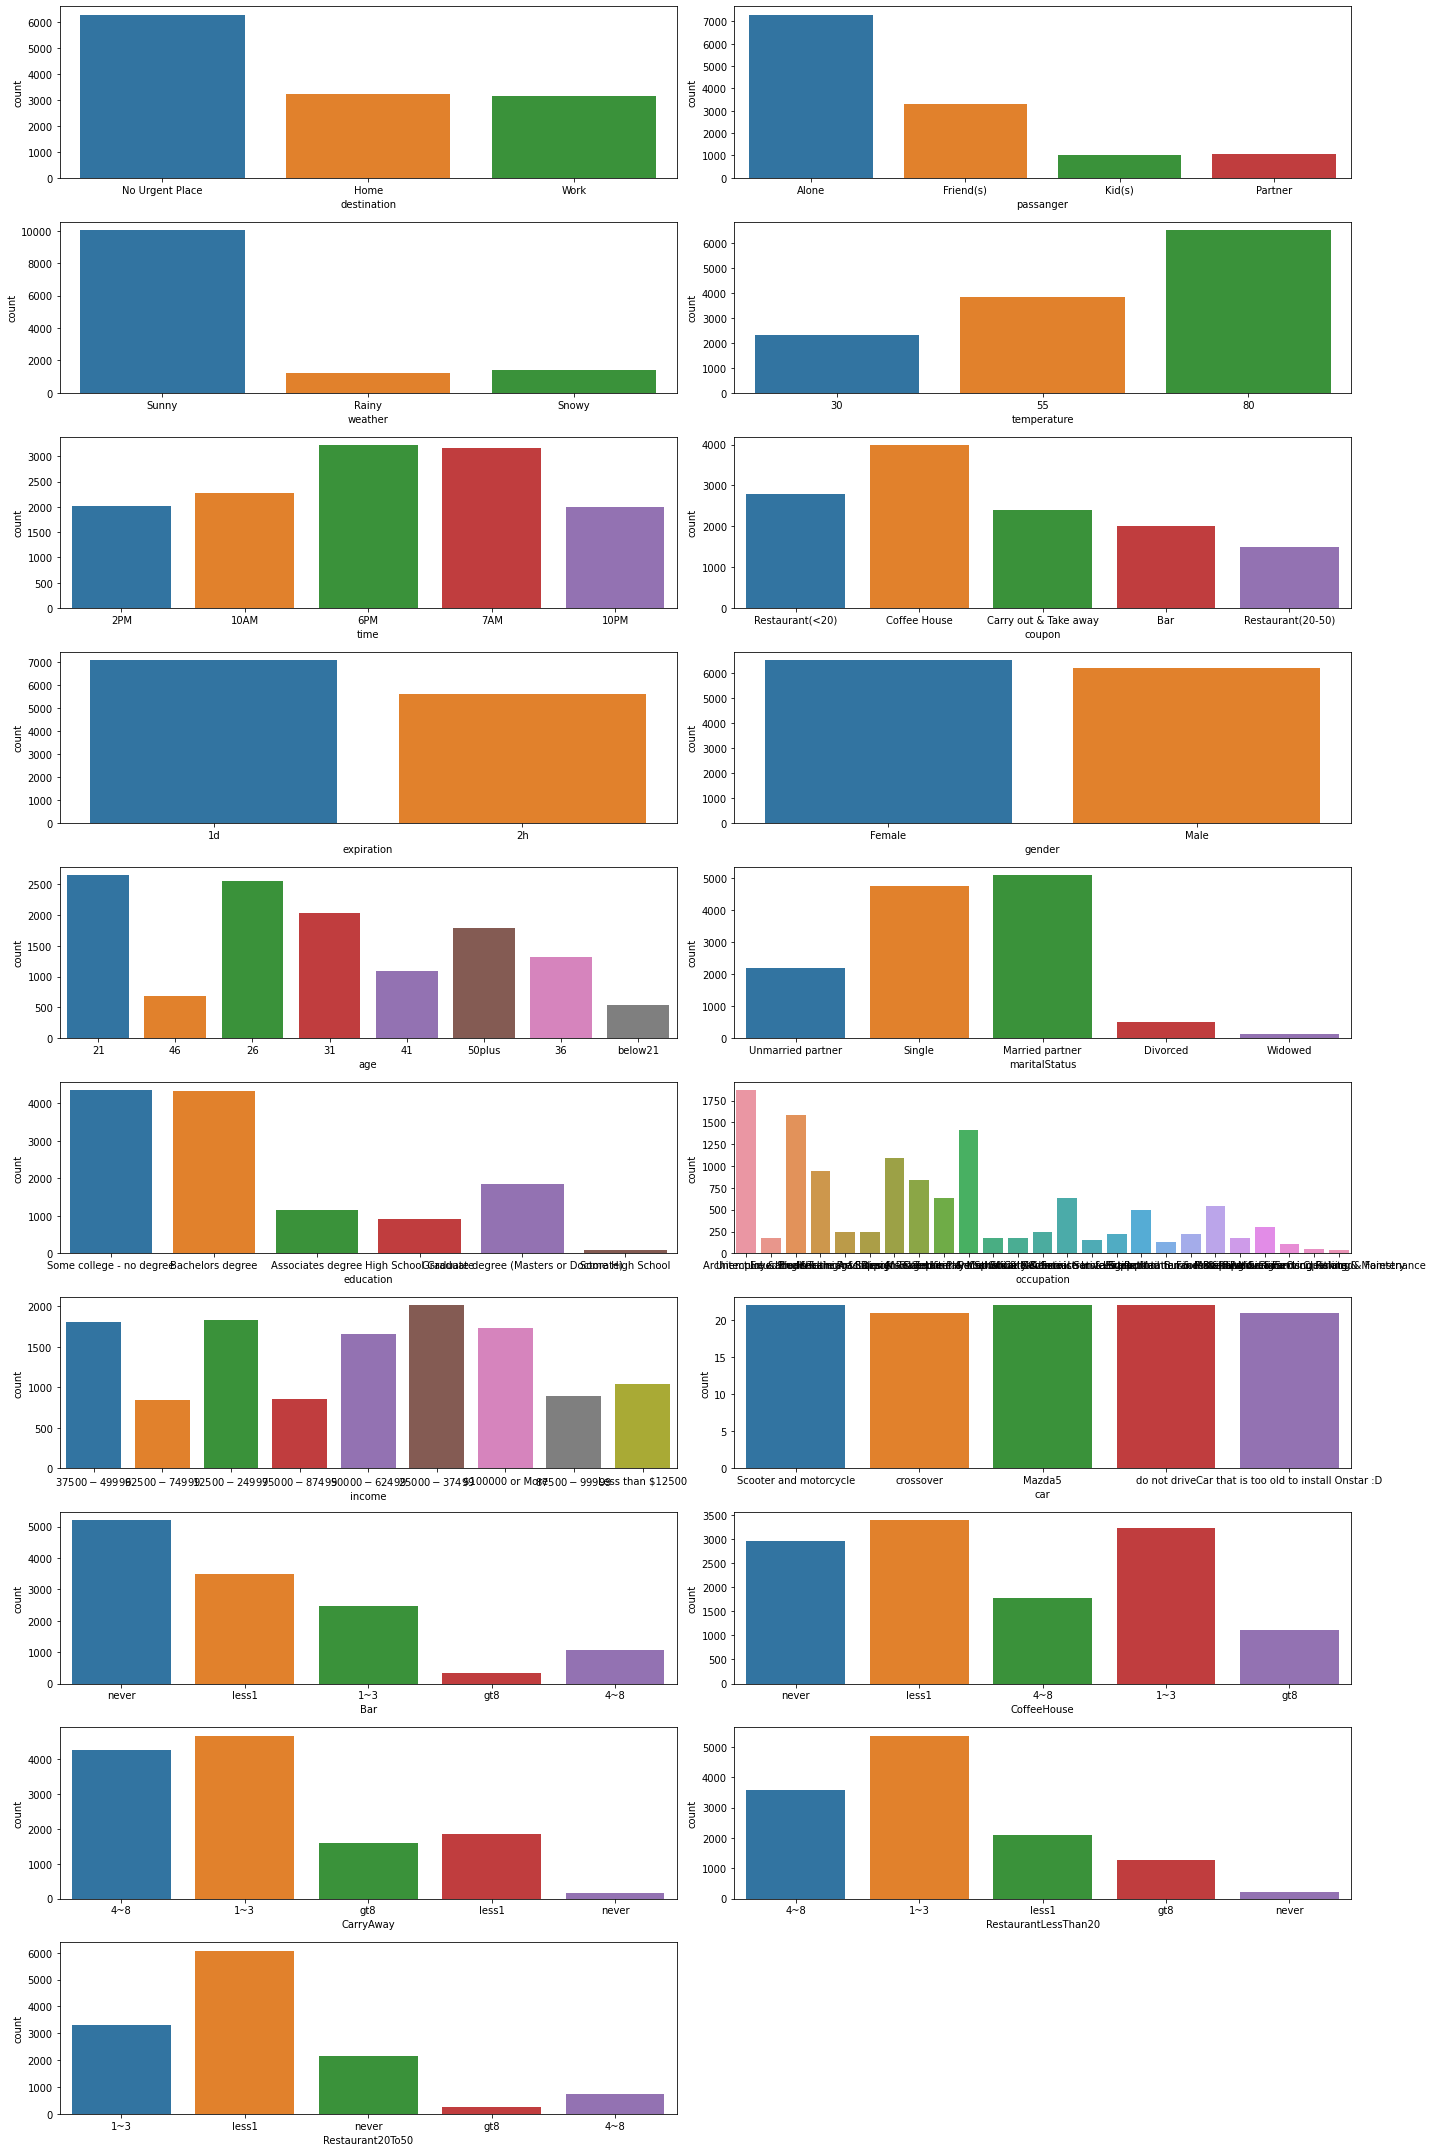

In [29]:
col=df.select_dtypes(include='object')
c=1
plt.figure(figsize=(20,30))
for i in col:
    ax=plt.subplot(10,2,c)
    sns.countplot(x=df[i],ax=ax)
    c+=1
    plt.tight_layout()

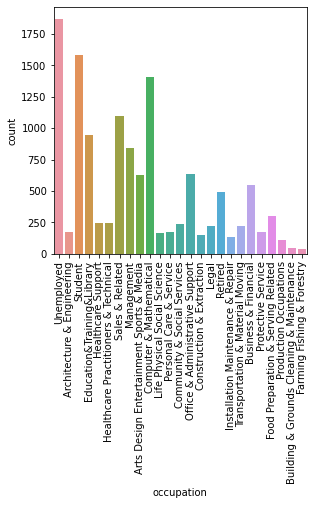

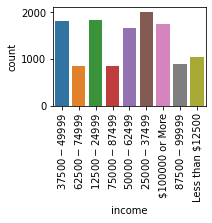

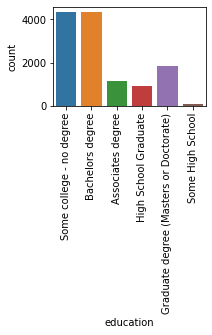

In [30]:
co = df[["occupation","income","education"]]
c=1
plt.figure(figsize=(10,10))
for i in co:
    ax=plt.subplot(2,2,c)
    sns.countplot(x=df[i],ax=ax)
    c+=1
    plt.xticks(rotation=90)
    plt.show()
    

###### BIVARIATE ANALYSIS INDEPENDENT  VARIABLE VS DEPENDENT/TARGET VARIABLE (CATEGORICAL VS CATEGORICAL)

In [31]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

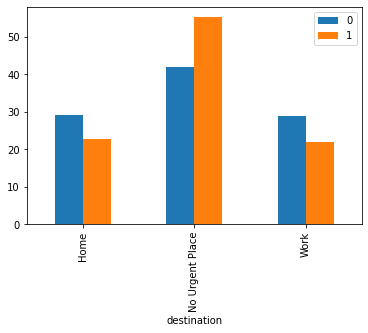

In [32]:
tab=pd.crosstab(df['destination'],df['Y'])/df['Y'].value_counts()*100
tab.plot(kind='bar')#GROUPEDBAR
plt.show()

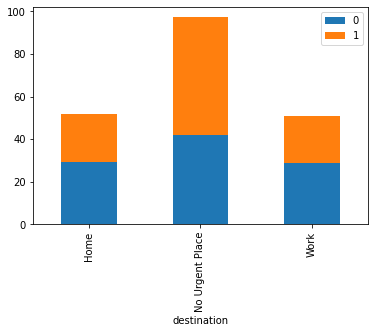

In [33]:
tab.plot(kind='bar',stacked=True)#STACKEDBAR-DERIVATIVE OF GROUPED BAR-BARS ARE STACKED ONE OVER THE OTHER
plt.show()

#destination- Driver with no urgency place as destination accepts more coupons.
#passanger-Drivers travelling alone are more and they accepts more coupon than who is travelling with company.
#weather- When the weather is Rainy and Snowy, Drivers travelling is very less but Drivers travelling in Sunny weather is high hence coupon acceptance is also huge.
#temperature-when the temperature is around 80, people accepting the coupon is very high. 
#expiration-Drivers accept less coupon when its expiration is less than 2 hours.
#gender-Rejection of coupon is more when its a female driver.
#age-More coupons is accepted by young drivers (21-31)

#time-
#coupon - coffee house,restaurants less than $20 and takeaway coupons are more accepted than bar or restaurants more than $20.
#maritalStatus - Single and married partner accepts more coupon than others
#has children - Drivers who doesnt have children accepts more coupon
#education - Drivers with some college-no drgree and Bachelors degree accepts more coupon
#occupation - unemployed and students accepts more coupon than others
#income - Drivers with salary between 25-37k are accepting more coupon.On an average, drivers between 12.5K to 62K are accepting coupons.
#car - Drivers coming in old car and Mazda5 are accepting more coupon
#bar - Drivers who has never visited bar are accepting more bar coupon,while drivers who have visited bar more than 8 times are accepting very few coupon.
#coffeehouse - Drivers who visits coffee house 1-3 times a month accepts more coupons than who have visited bar more than 8 times
#Carryaway - Drivers who takes away food 1-8 times a month accepts more coupon while those who never take away food accepts less coupon
#RestaurantLessThan20 - Drivers who visits restaurants 1-3 times that costs an average of $20 per month accepts more coupon
#Restaurant20To50 - Drivers who visits restaurants less than 1 time that costs an average of $20-$50 per month accepts more coupon
#direction_same - Drivers accepts less coupon for restaurant/bar in same direction as destination
#direction_opp -Drivers accepts more coupon for restaurant/bar in opposite direction as destination
#Y - accepting and rejecting couopons are more or less in same ratio
#toCoupon_GEQ15min - More coupon is accepted when driving distance to the restaurant/bar for using the coupon is greater than 15 minutes.
#toCoupon_GEQ25min - Less coupon is accepted when driving distance to the restaurant/bar for using the coupon is greater than 25 minutes


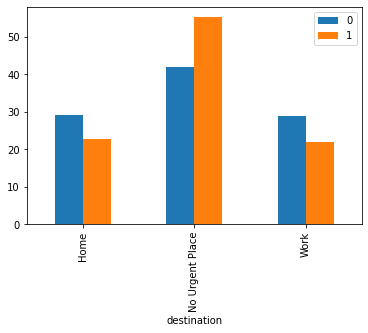

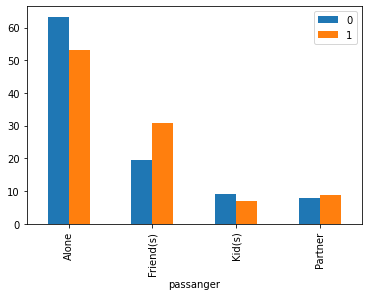

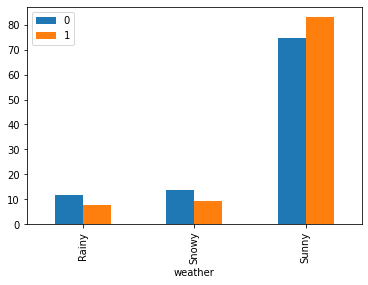

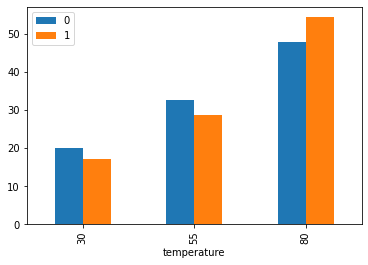

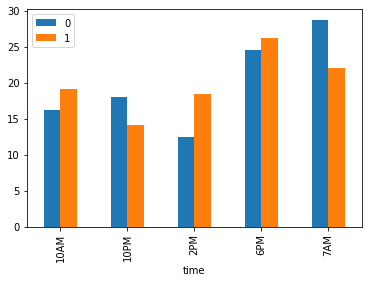

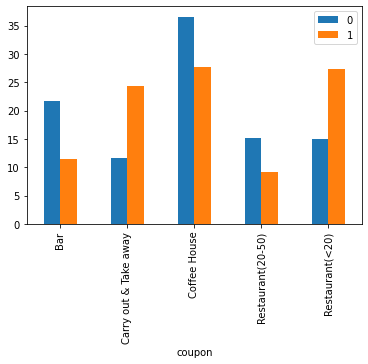

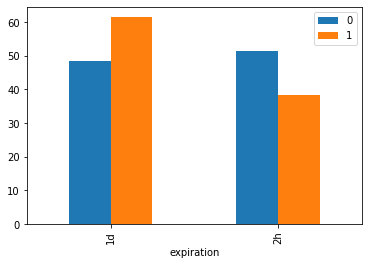

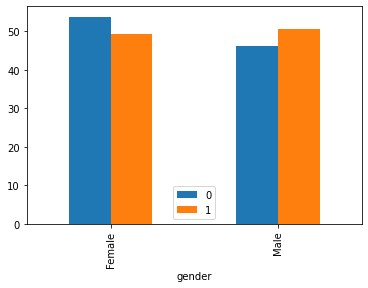

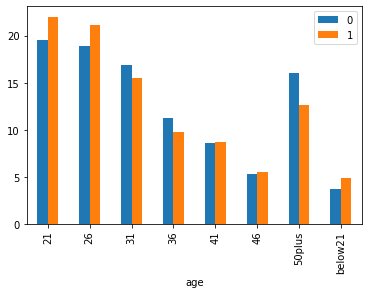

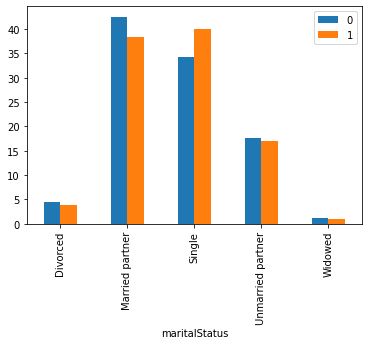

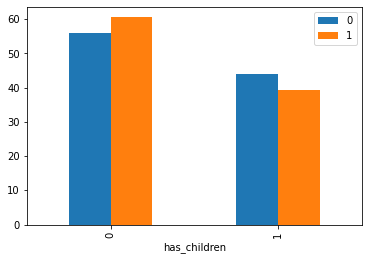

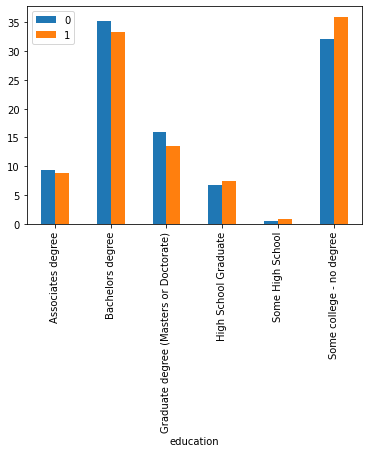

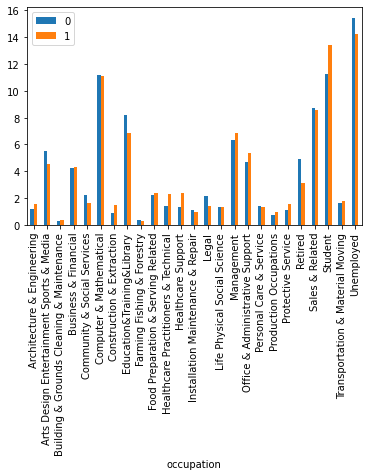

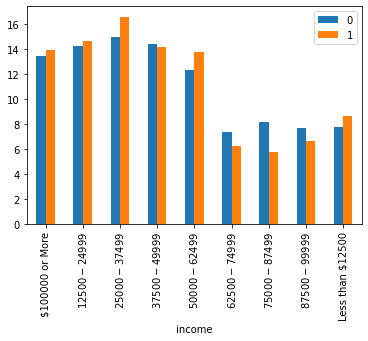

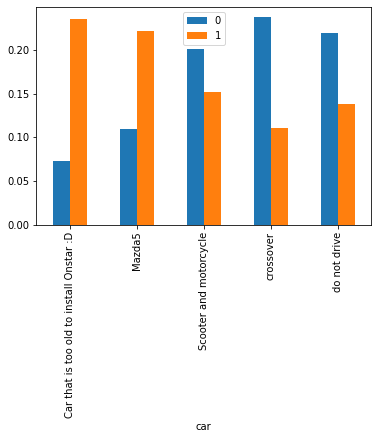

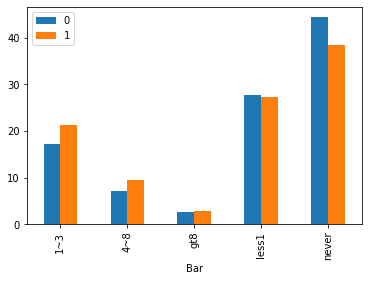

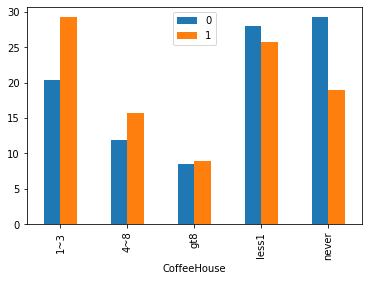

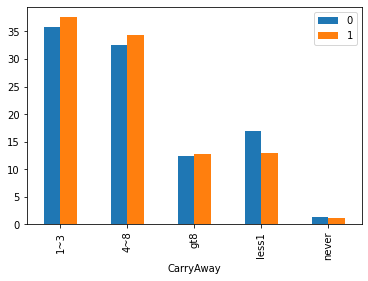

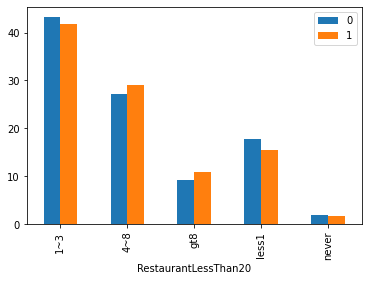

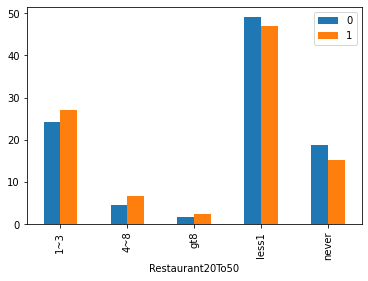

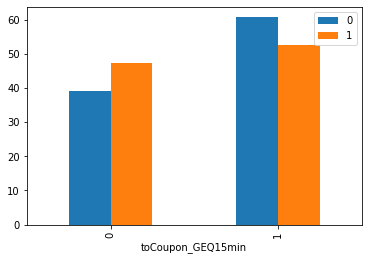

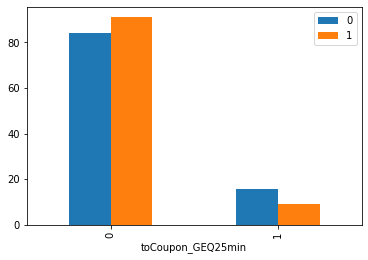

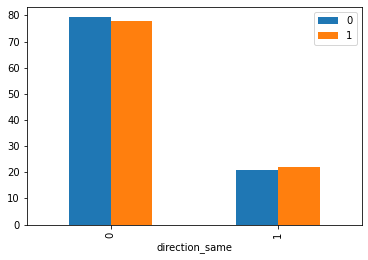

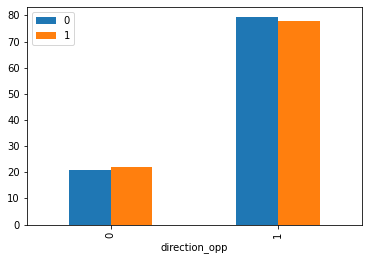

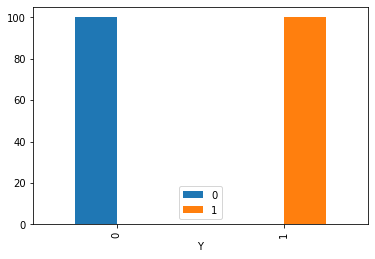

In [34]:
for i in df.columns:
    tab=pd.crosstab(df[i],df['Y'])/df['Y'].value_counts()*100
    tab.plot(kind='bar')#GROUPEDBAR
    plt.show()

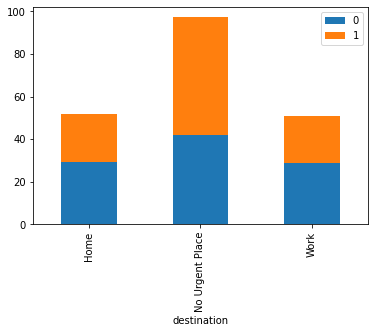

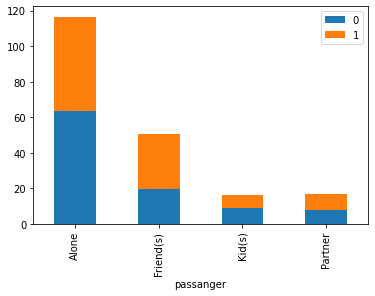

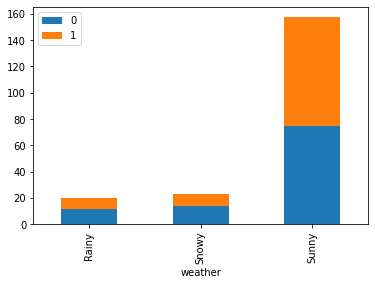

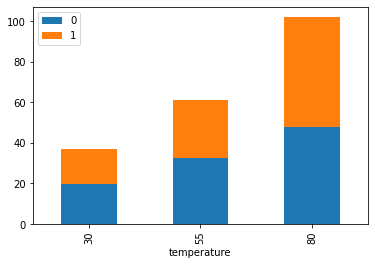

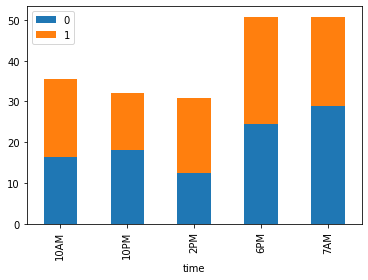

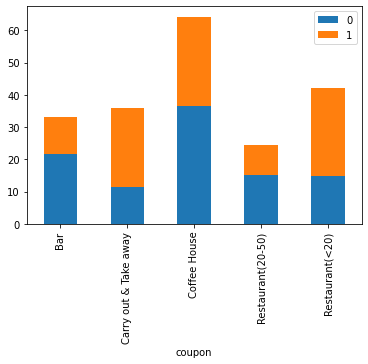

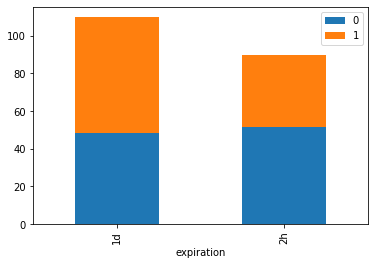

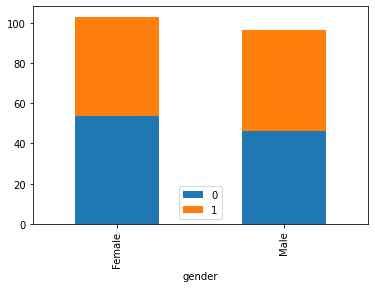

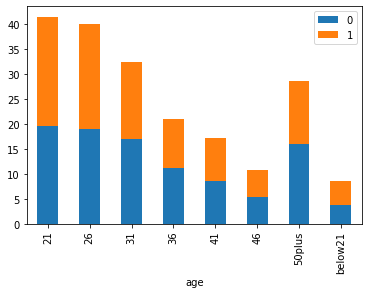

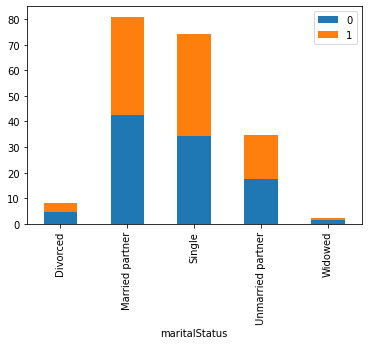

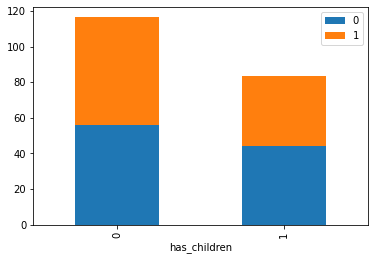

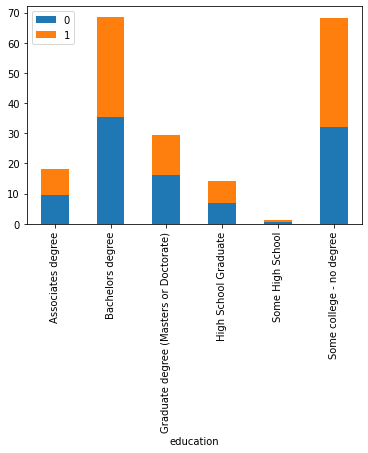

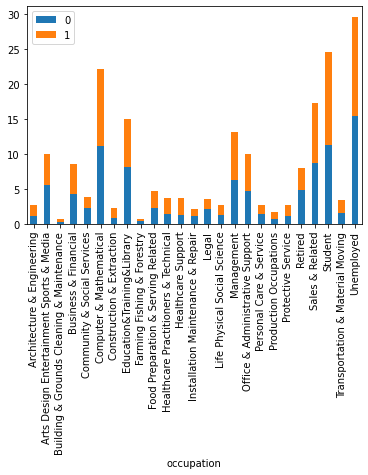

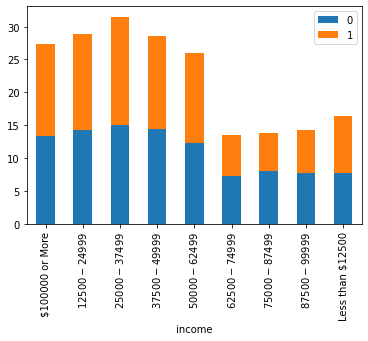

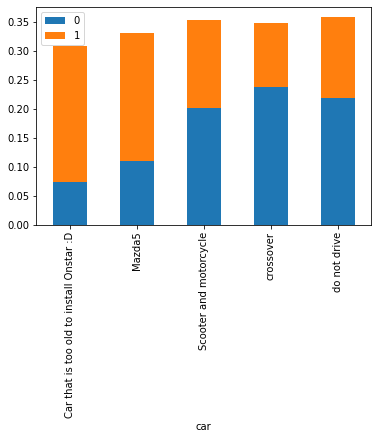

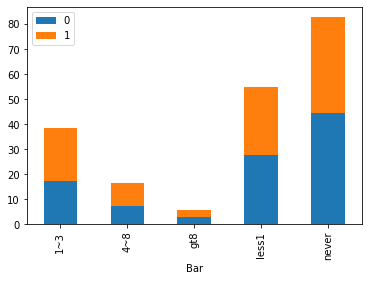

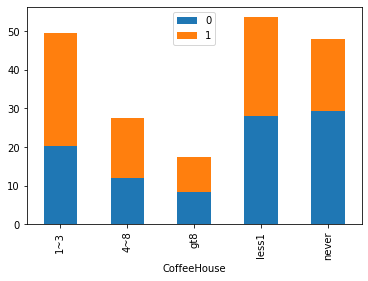

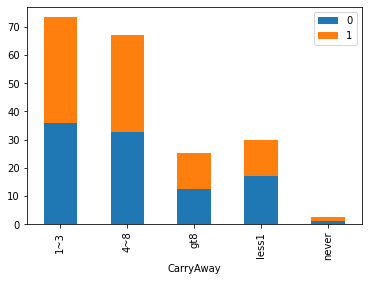

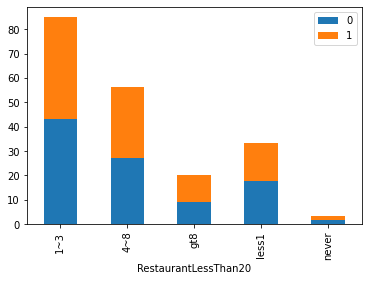

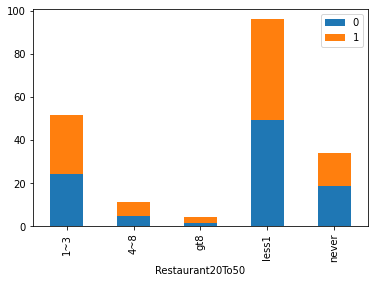

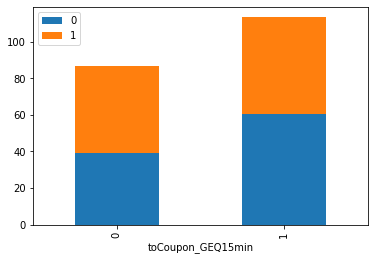

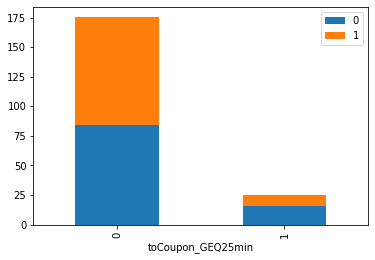

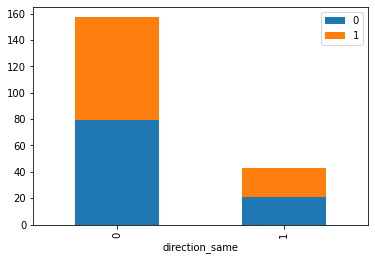

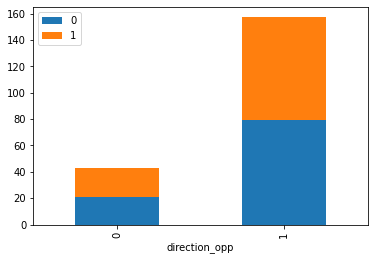

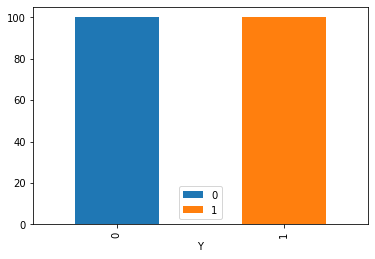

In [35]:
for i in df.columns:
    tab=pd.crosstab(df[i],df['Y'])/df['Y'].value_counts()*100
    tab.plot(kind='bar',stacked=True)#STACKEDBAR
    plt.show()

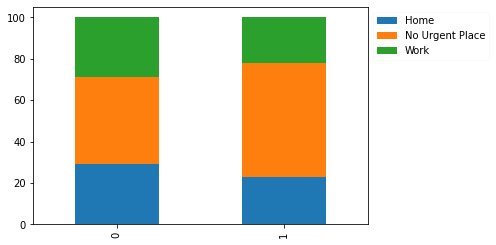

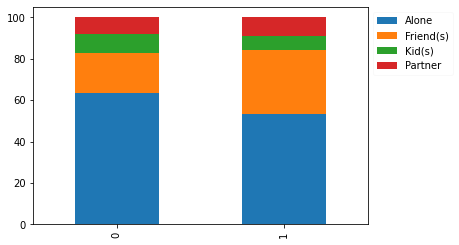

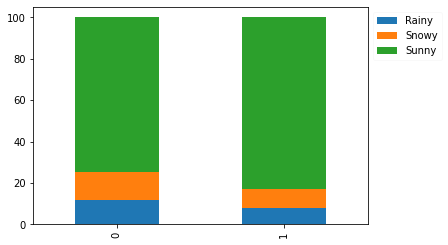

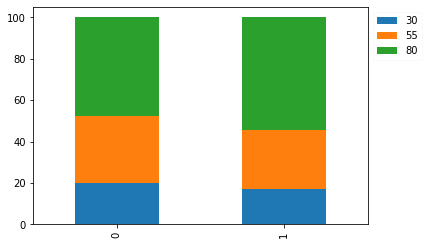

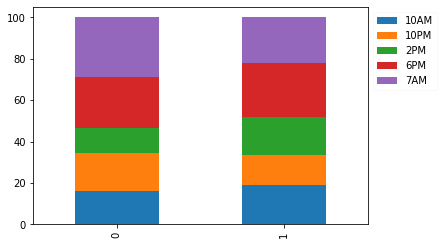

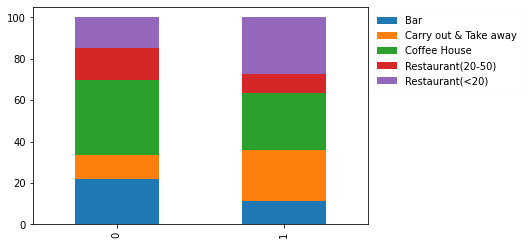

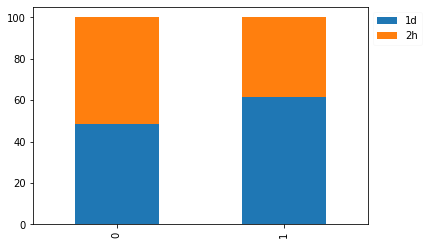

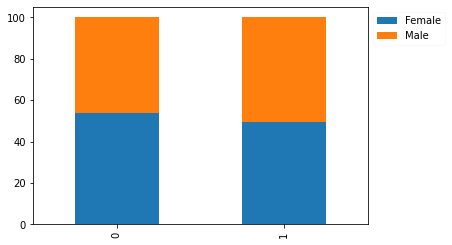

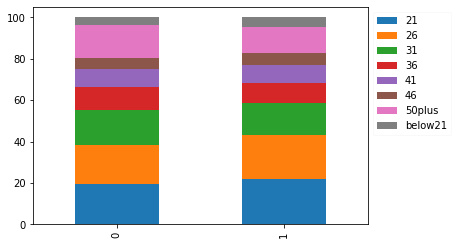

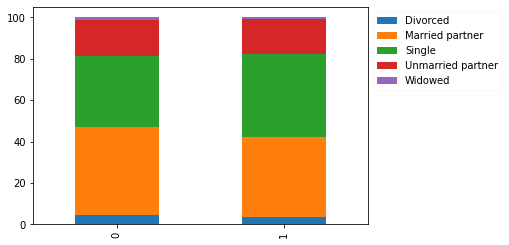

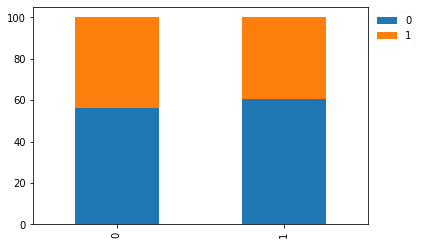

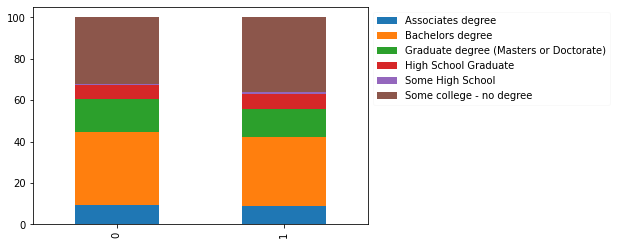

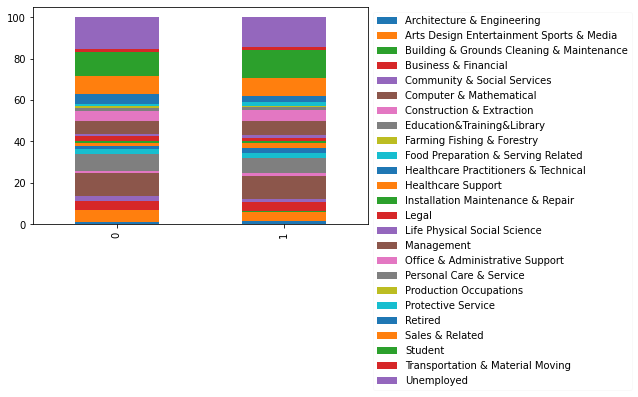

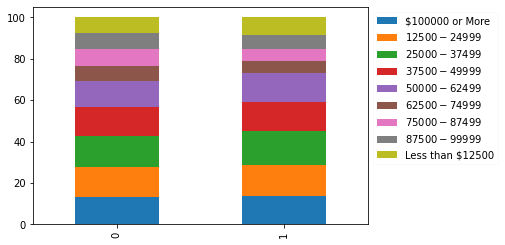

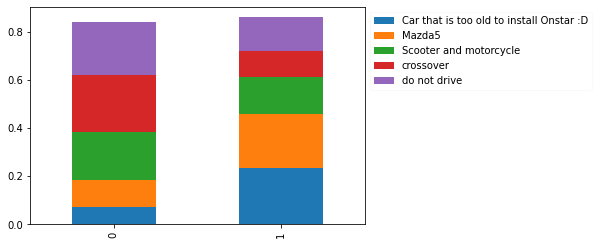

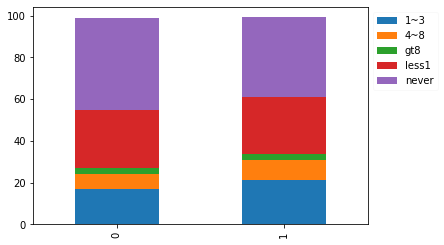

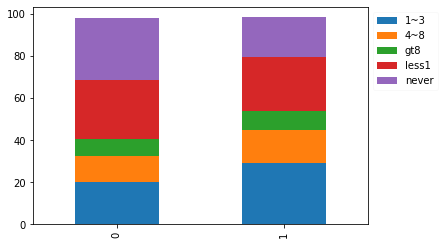

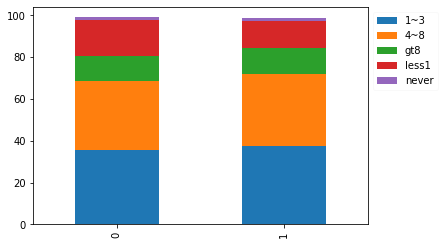

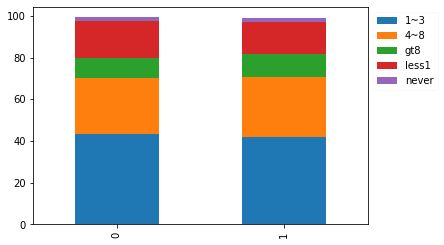

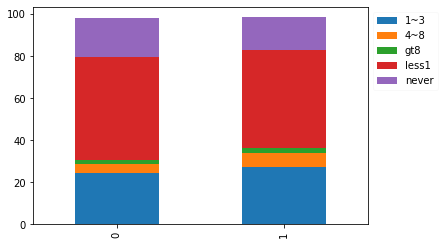

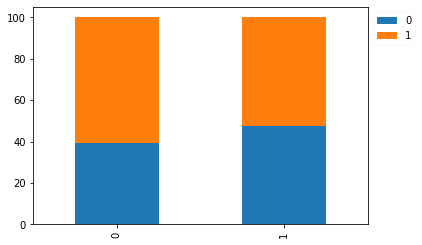

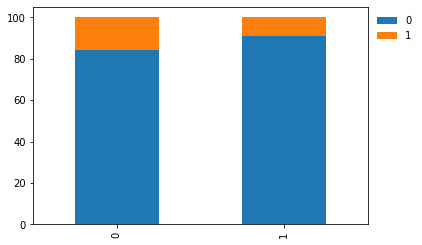

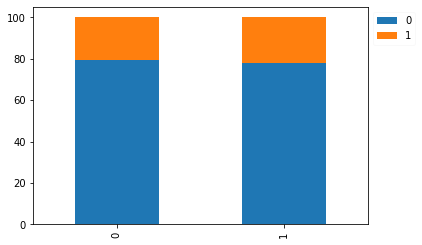

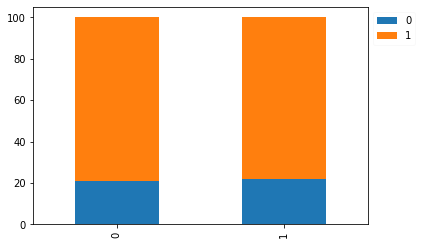

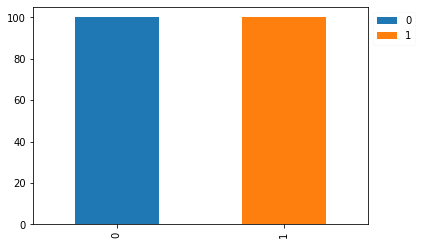

In [36]:
for i in df.columns:
    tab=pd.crosstab(df[i],df['Y'])/df['Y'].value_counts()*100
    (tab.T).plot(kind='bar',stacked=True)
    plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0,1))#COMPLETELY OUTSIDE
    plt.show()

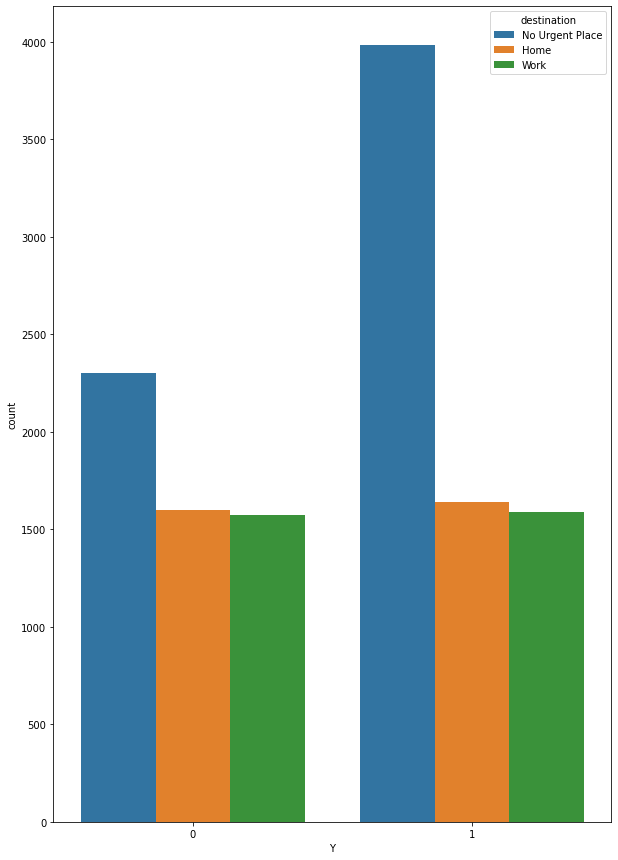

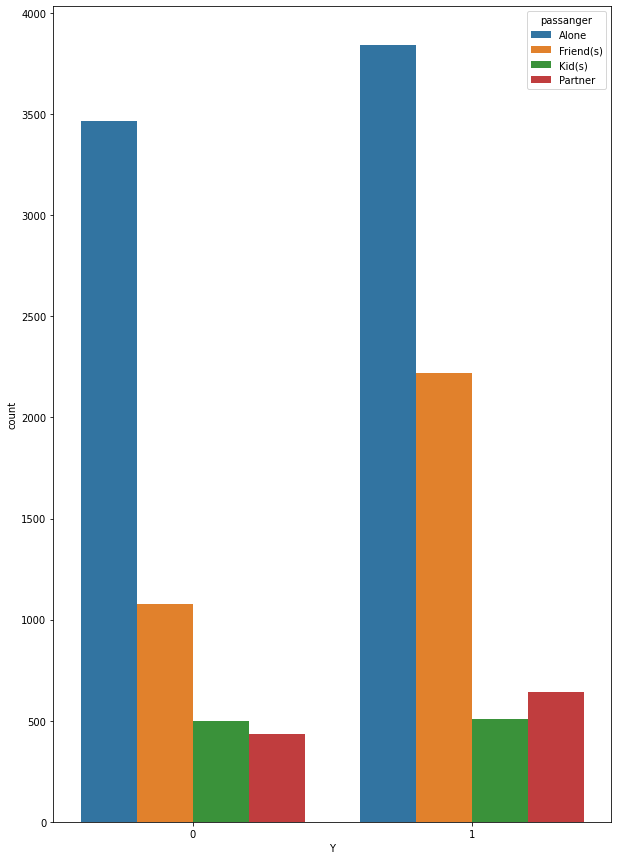

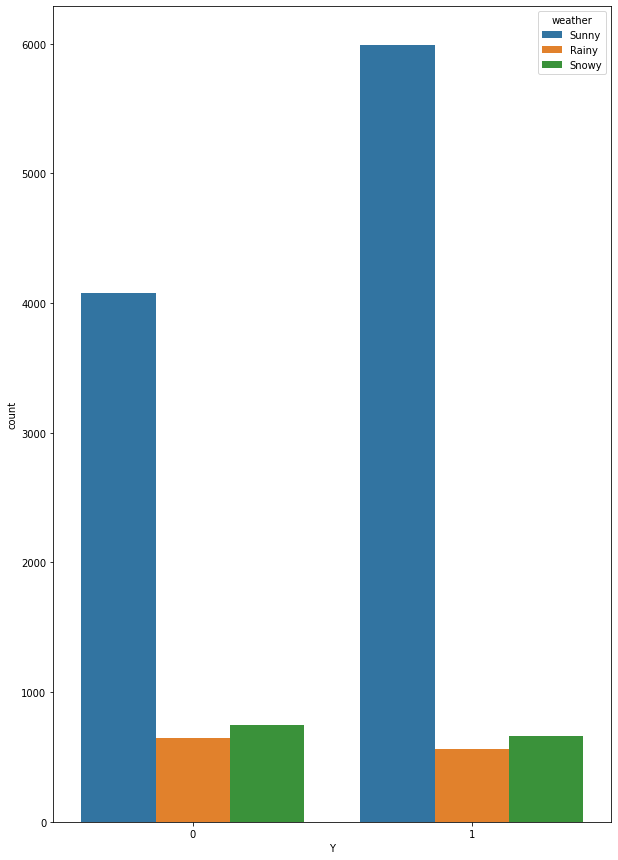

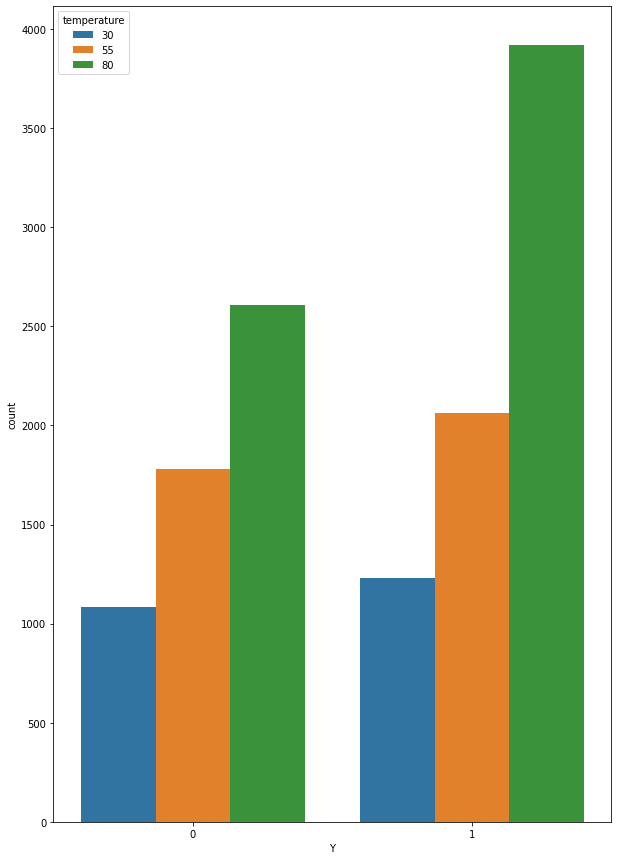

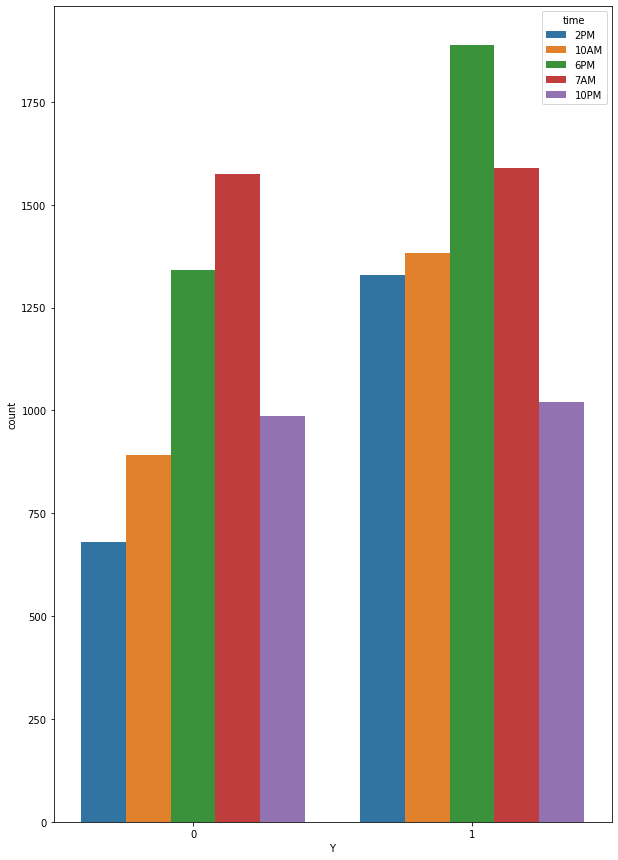

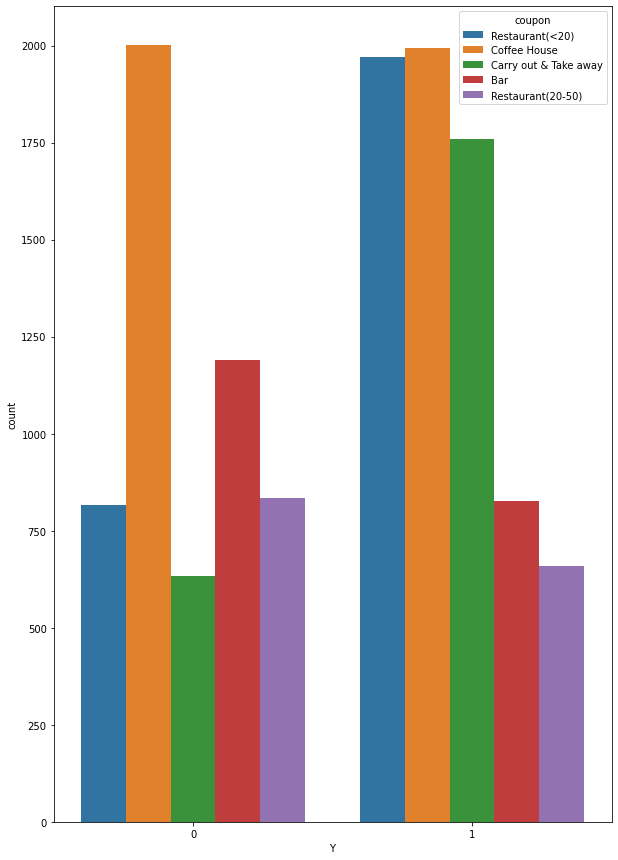

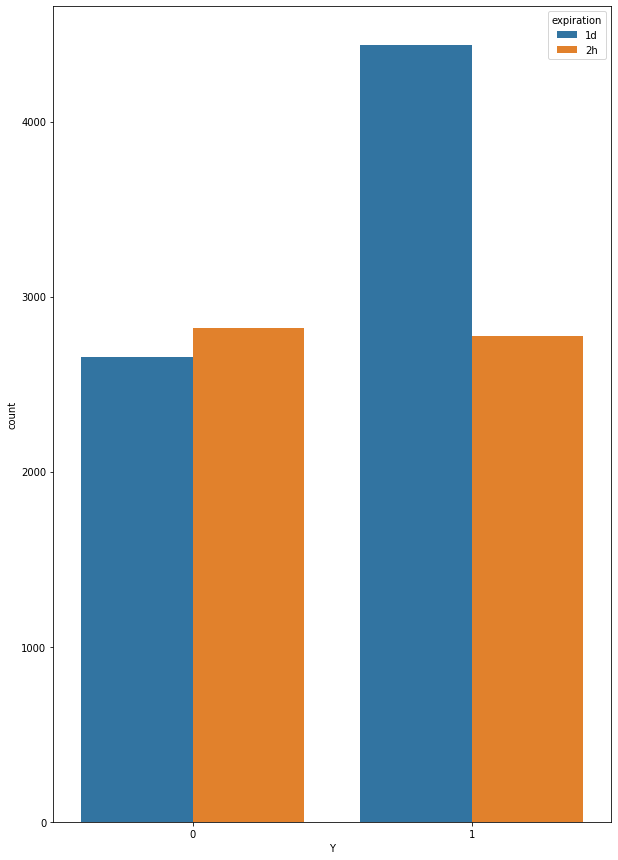

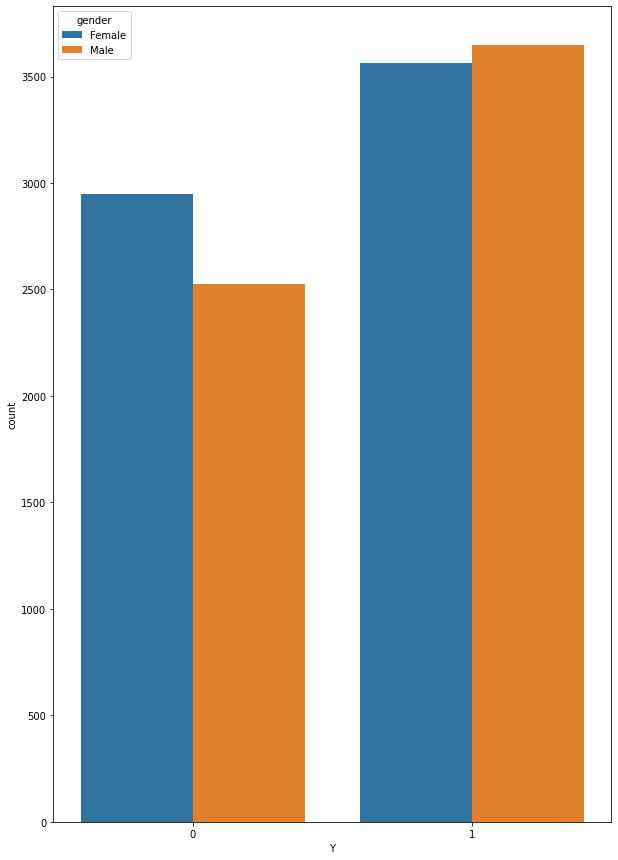

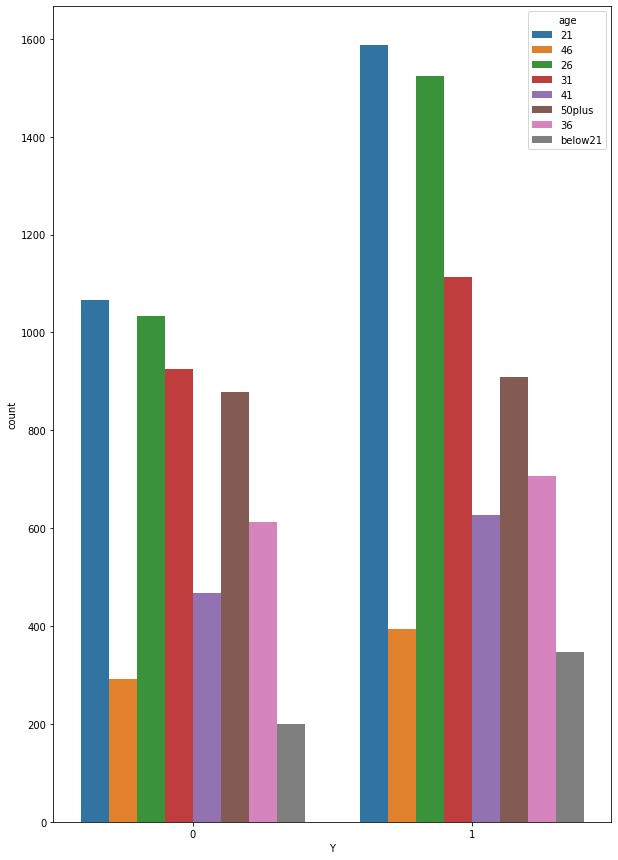

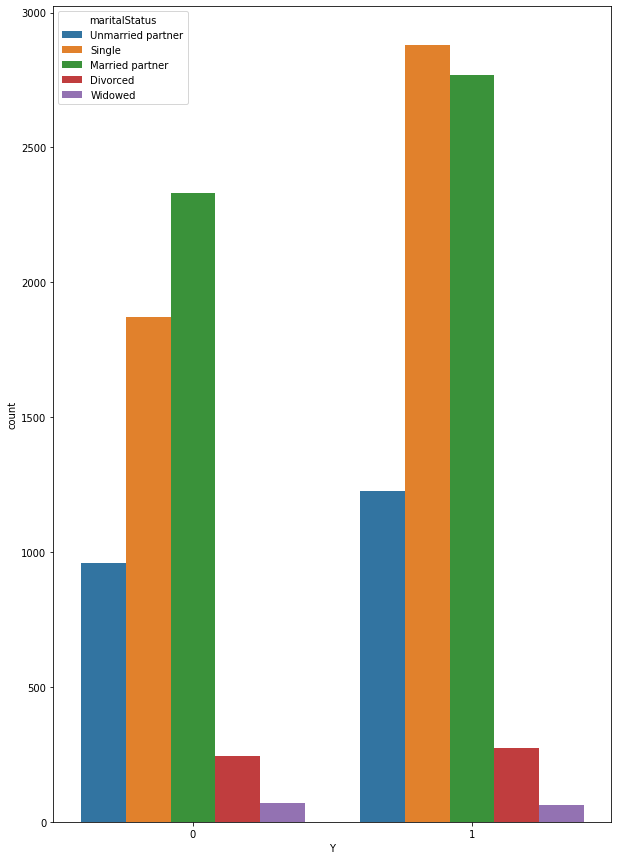

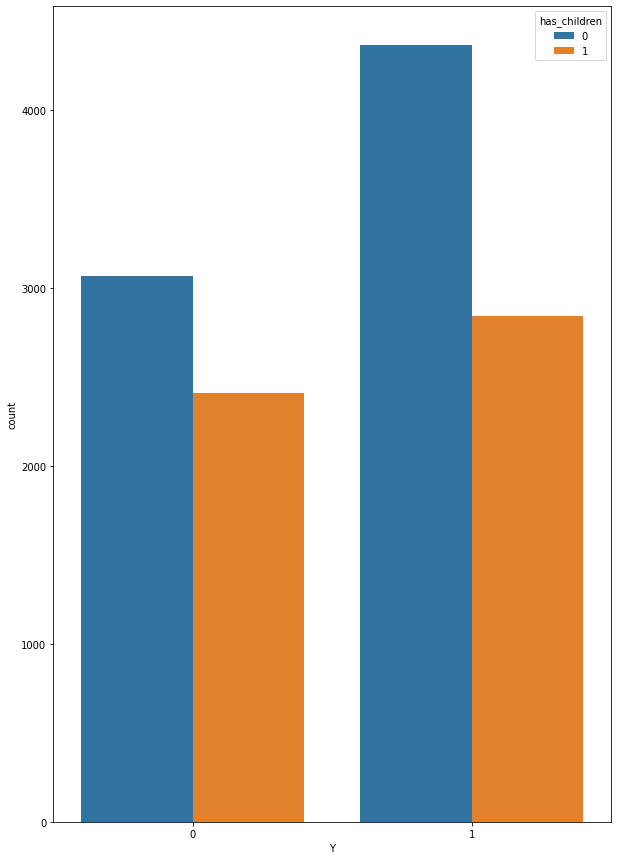

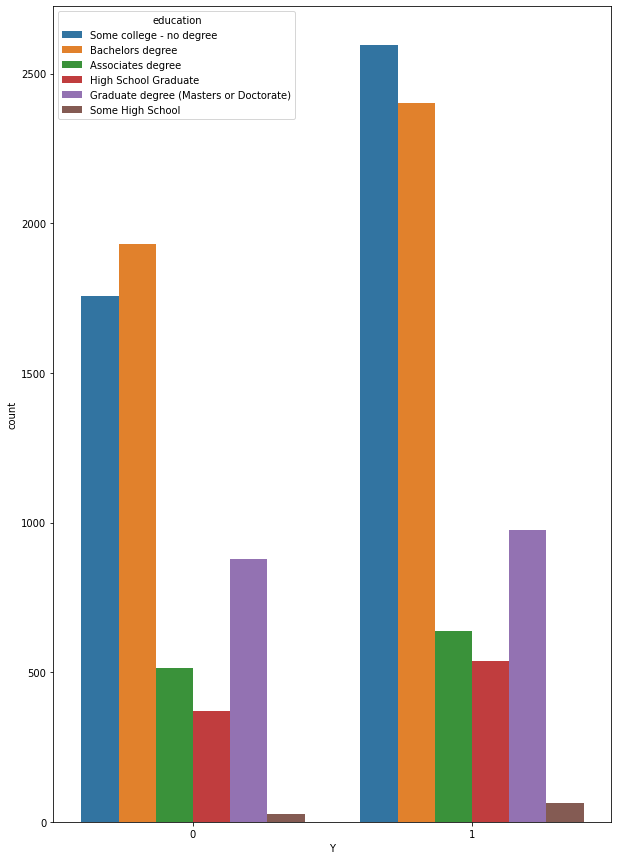

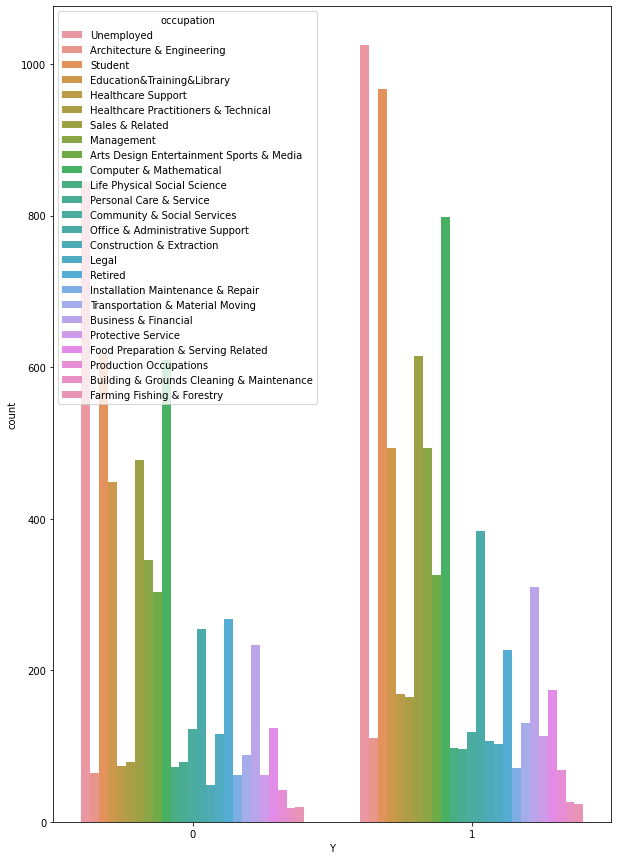

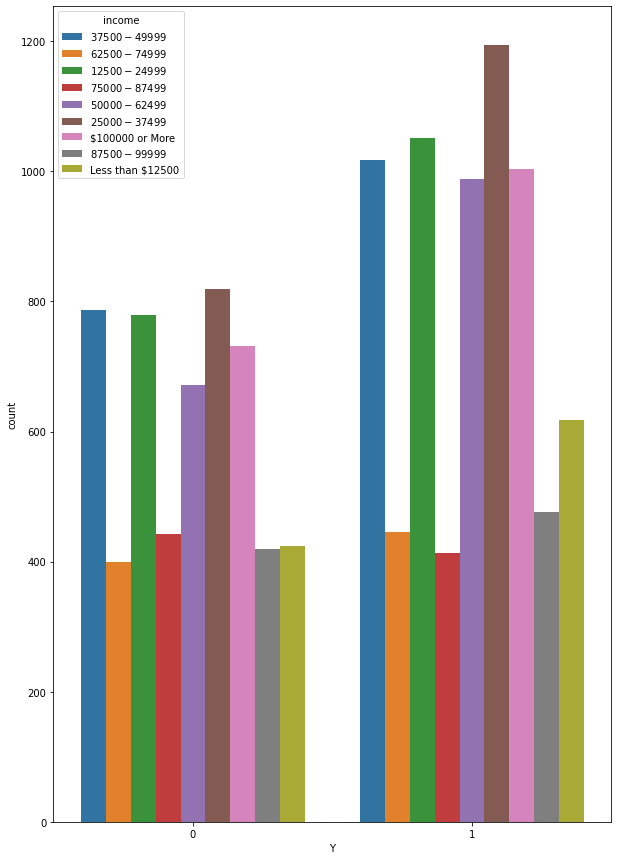

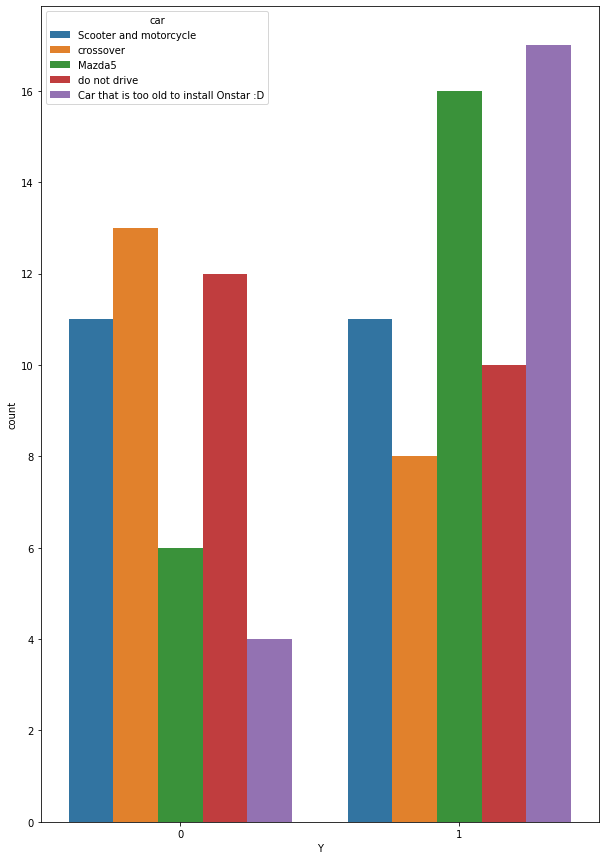

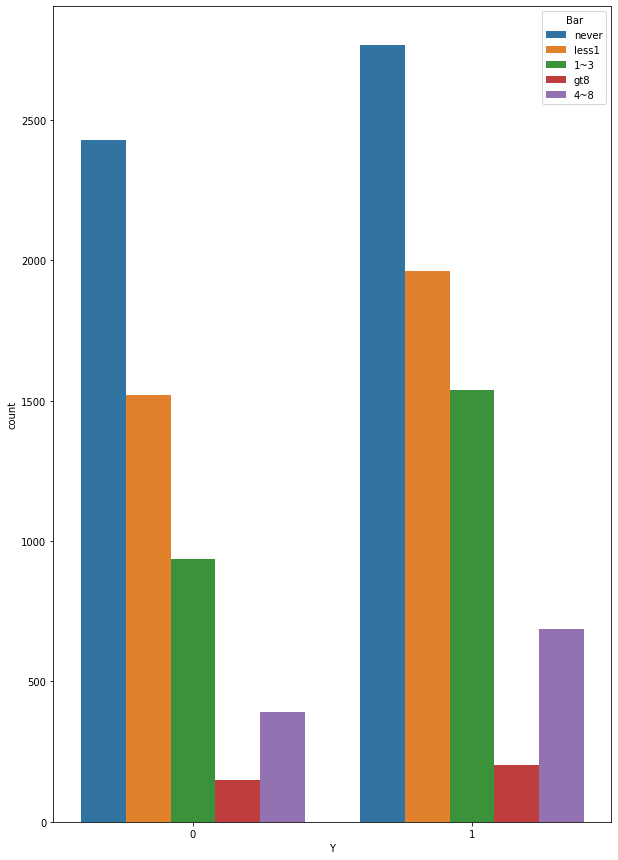

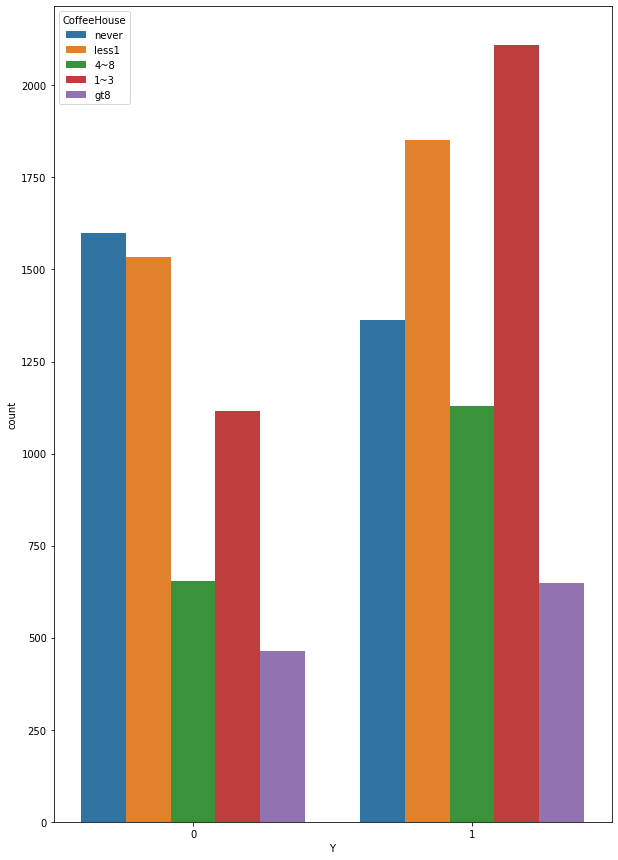

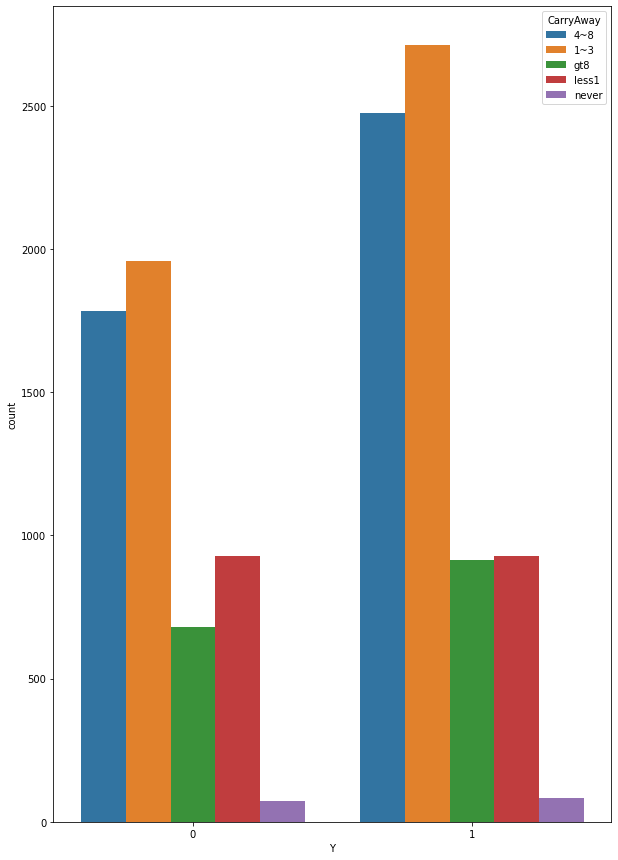

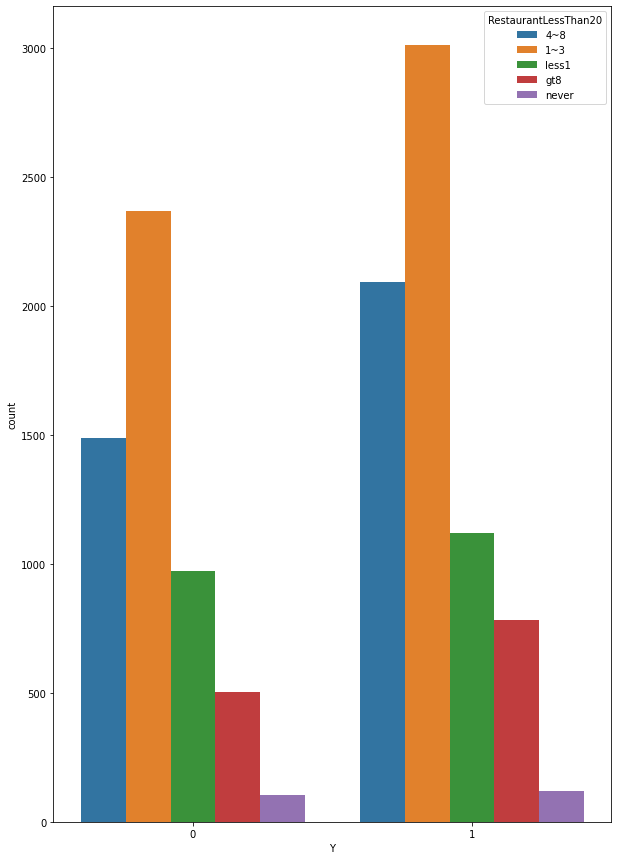

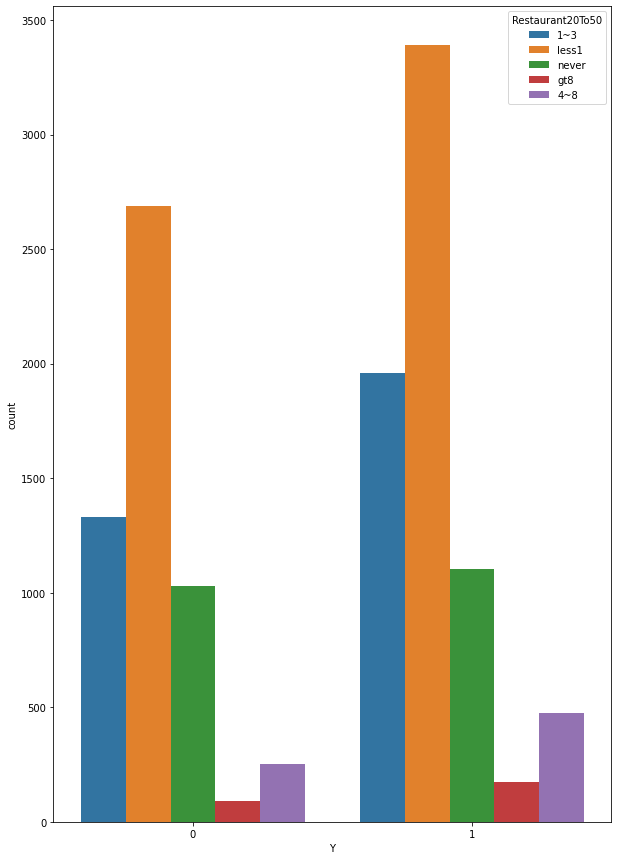

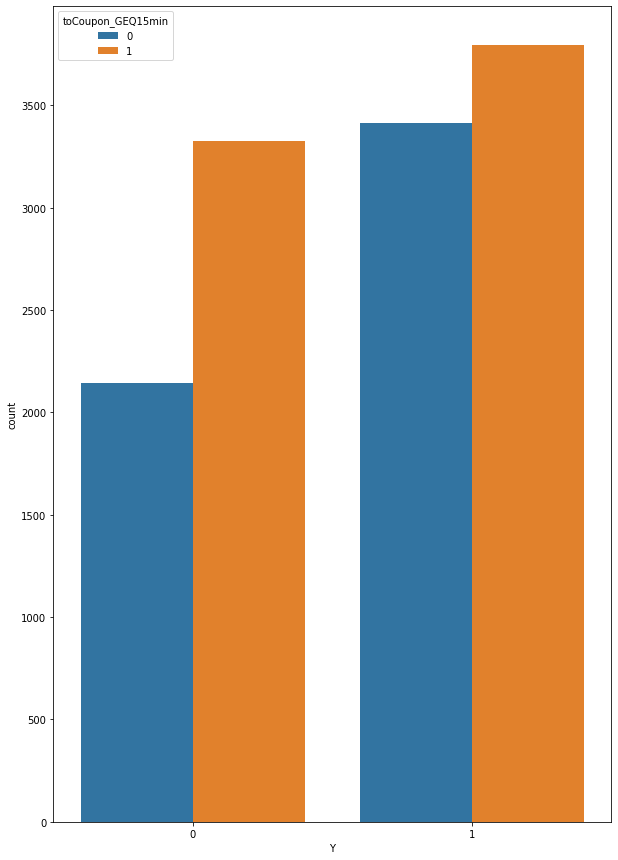

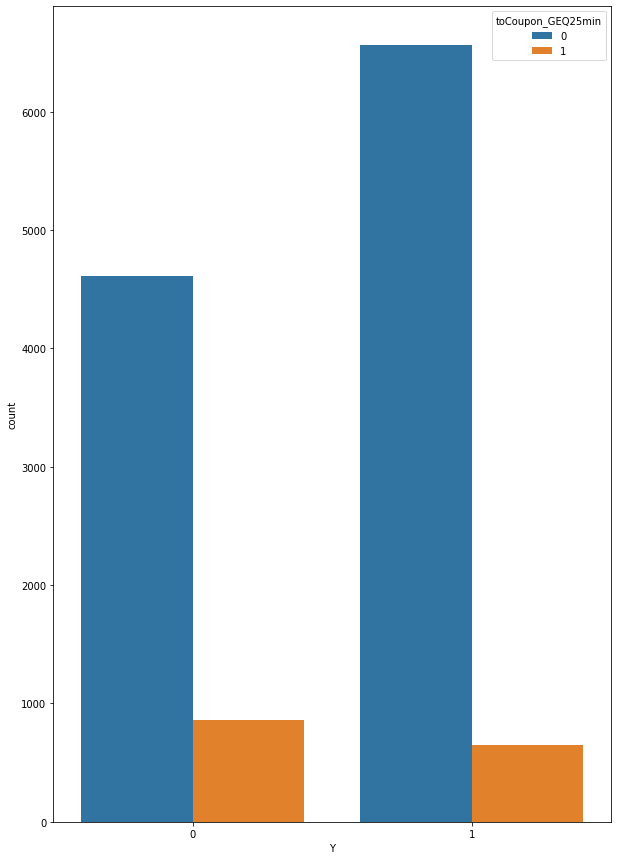

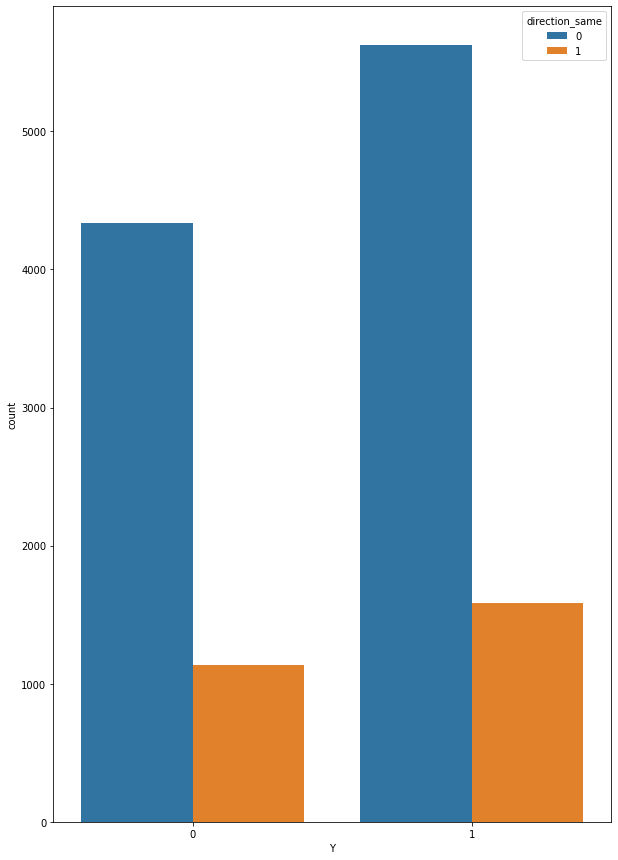

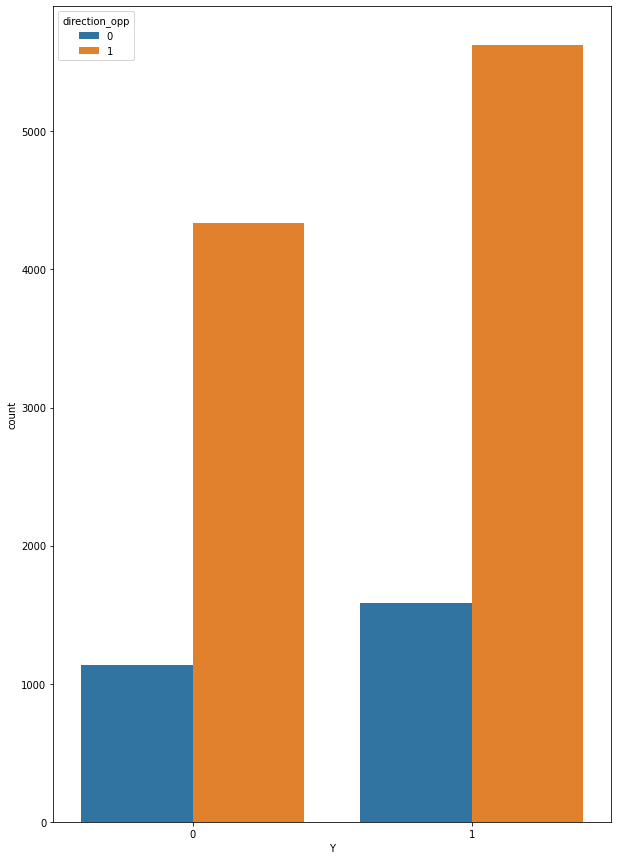

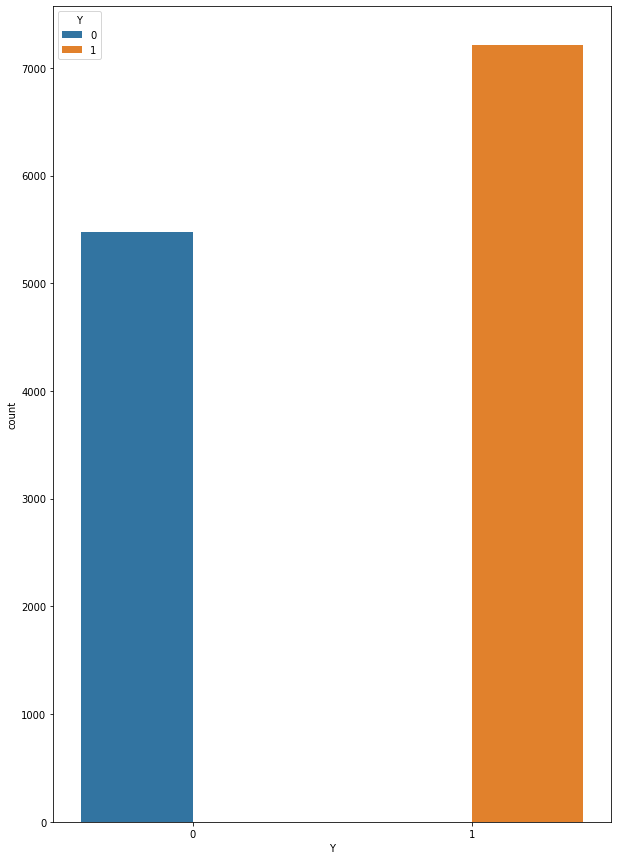

In [37]:
for i in df.columns:
    plt.figure(figsize=(10,15))
    sns.countplot(df['Y'],hue=df[i])
    plt.show()

###### MISSING VALUES:-

In [38]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [39]:
Total = df.isnull().sum().sort_values(ascending=False)          


Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   


missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
car,12576,99.148534
CoffeeHouse,217,1.710817
Restaurant20To50,189,1.490066
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Bar,107,0.843582
destination,0,0.000000
income,0,0.000000
direction_opp,0,0.000000
direction_same,0,0.000000


INFERENCE:

In [40]:
#In the Data Set Some Of the Data's are Found To Be Missing and Remaining Most of The Data Are Seems TO Be Filled

In [41]:
#CAR'S COLUMN Found To Be Have More Than 40% Data is Missing,Hence We can Drop The CAR Columns

In [42]:
#Before Dropping we Try To Get Some insights From it

DROPPING CAR COLUMN

In [43]:
df['car']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12679    NaN
12680    NaN
12681    NaN
12682    NaN
12683    NaN
Name: car, Length: 12684, dtype: object

In [44]:
df['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [45]:
df['car'].value_counts().sum()

108

In [46]:
df['car'].isnull().sum()/len(df['car'])

0.9914853358561968

In [47]:
df['car'].isnull().sum()/len(df['car'])*100

99.14853358561967

In [48]:
#more than 99% data is Missing So,We can drop it

In [49]:
df.drop('car', inplace=True, axis=1)

### SEPERATING THE COLUMNS BASED ON ITS DATATYPES AS NUMERIC/CONTINUOUS COLUMN AND CATEGORICAL COLUMN

#### NUMERICAL/CONTINUOUS COLUMN DATA

In [50]:
#for getting continuous numerical data
df_num=df.select_dtypes(include=np.number)
df_num.head(2)

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,0,0,1,1
1,1,0,0,0,1,0


In [51]:
df_num.shape

(12684, 6)

In [52]:
df_num.columns

Index(['has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [53]:
df_num.nunique()

has_children         2
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [54]:
#The NUMERICAL COLUMNS Seems to be Categorical Because These Columns  Already Contains And  Assigned with 0's and 1's 

###### VISUALIZING THE NUMERICAL COLUMNS

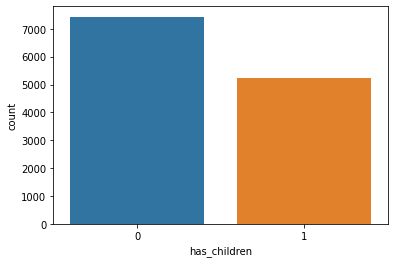

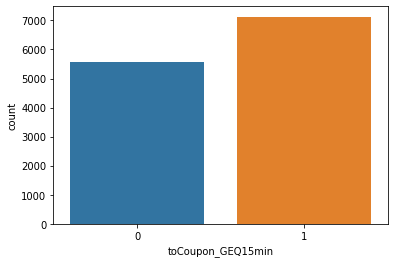

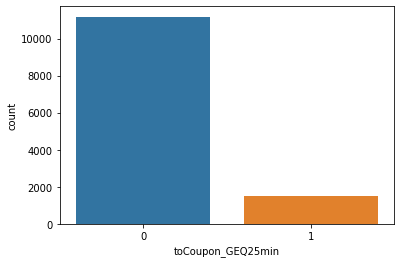

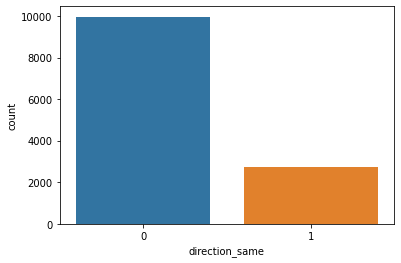

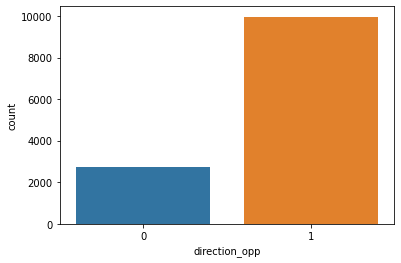

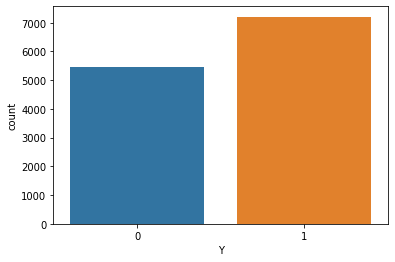

In [55]:
for i in df_num.columns:
    sns.countplot(df_num[i])
    plt.show()

###### INFERENCE:-
    INDEPENDENT FEATURE
    1.has_children(2 Categories=>0,1)-IN THIS COLUMN 0 IS MORE THAN 1 HENCE WE CAN KEEP IT FOR ANALYSIS
    2.toCoupon_GEQ15min(2 Categories=>0,1)-IN THIS COLUMN 0 IS LESS THAN 1 HENCE WE CAN KEEP IT FOR ANALYSIS   
    3.toCoupon_GEQ25min(2 Categories=>0,1)-IN THIS COLUMN 0 IS MORE THAN 1 HENCE WE CAN KEEP IT FOR ANALYSIS
    4.direction_same(2 Categories=>0,1)-IN THIS COLUMN 0 IS MORE THAN 1(IMBALANCED) HENCE WE CAN KEEP IT FOR ANALYSIS
    5.direction_opp(2 Categories=>0,1)-IN THIS COLUMN 0 IS LESS THAN 1 (IMBALANCED)HENCE WE CAN KEEP IT FOR ANALYSIS        
    
    DEPENDENT FEATURE/TARGET VARIABLE
    1.Y(2 Categories=>0,1)-IN THIS COLUMN 0 IS MORE THAN 1(IMBALANCED) HENCE WE CAN KEEP IT FOR ANALYSIS

###### INFERENCE:-SINCE ALL ARE 1's AND 0's-NO NEED OF OUTLIER TREATMENT IN NUMERICAL CONTINUOUS COLUMN

###### MISSING VALUE IDENTIFICATION AND TREATMENT OF  NUMERICAL COLUMN

In [56]:
df_num.isnull().sum()

has_children         0
toCoupon_GEQ15min    0
toCoupon_GEQ25min    0
direction_same       0
direction_opp        0
Y                    0
dtype: int64

INFERENCE:-

In [57]:
#All Columns in Numerical Seems To be Fine

#### CATEGORICAL COLUMN:-

In [58]:
#for getting continuous numerical data
df_cat=df.select_dtypes(exclude=np.number)
df_cat.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3


In [59]:
df_cat.shape

(12684, 18)

In [60]:
df_cat.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'education',
       'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

###### MISSING VALUE IDENTIFICATION AND TREATMENT OF MISSING VALUES IN CATEGORICAL COLUMN

In [61]:
df_cat.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64

In [62]:
#SOME CATEGORICAL COLUMN SEEMS TO HAVE NULL VALUE

In [63]:
df_cat.isnull().sum()/len(df_cat)*100

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
education               0.000000
occupation              0.000000
income                  0.000000
Bar                     0.843582
CoffeeHouse             1.710817
CarryAway               1.190476
RestaurantLessThan20    1.024913
Restaurant20To50        1.490066
dtype: float64

In [64]:
Total = df_cat.isnull().sum().sort_values(ascending=False)          


Percent = (df_cat.isnull().sum()*100/df_cat.isnull().count()).sort_values(ascending=False)   


missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
CoffeeHouse,217,1.710817
Restaurant20To50,189,1.490066
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Bar,107,0.843582
passanger,0,0.000000
income,0,0.000000
occupation,0,0.000000
education,0,0.000000
destination,0,0.000000


INFERENCE:-

In [65]:
#5 Categorical Columns-Bar,CoffeeHouse,CarryHouse,CarryAway,RestaurantLessThan20,Restaurant20To50 Are Found To have missing Values
#but <5% values Only Are Missing in THe Categorical Column.Hence We Can Go with Imputation like Mode,Mean Or KNN Imputation

In [66]:
#Since Less Than 5% data is Missing we can go with Mode Imputation

###### MISSING VALUE TREATMENT BY IMPUTATION-MODE IMPUTATION

In [67]:
for x in ['CoffeeHouse','CarryAway','RestaurantLessThan20','Bar','Restaurant20To50']:
          df_cat[x].fillna(value=df_cat[x].mode()[0],inplace=True)

In [68]:
df_cat.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64

In [69]:
#NOW Categorical Column is Free From Missing Values

In [70]:
df_cat.shape

(12684, 18)

###### ENCODING THE CATEGORICAL COLUMNS

In [71]:
df_cat.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
dtype: int64

In [72]:
for i in df_cat.columns:
    print(df[i].value_counts())
    print('')

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

1d    7091
2h    5593
Name: expiration, dtype: int64

Female    6511
Male      6173
Name: gender, dtype: int64

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed       

In [73]:
#SINCE THERE ARE MORE THAN 2 UNIQUE FEATURE IN EACH VARIABLE OF 17 COLUMNS HENCE WE CAN GO FOR Encoding-ONE HOT ENCODING,Label Encoding,Frequency

###### ONE-Hot Encoding

In [74]:
df_oh_enc= pd.get_dummies(df_cat,columns=df_cat.columns,drop_first=True)

In [75]:
df_oh_enc.head(2)

,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,temperature_55,temperature_80,time_10PM,...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [76]:
df_oh_enc.columns

Index(['destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Snowy', 'weather_Sunny', 'temperature_55', 'temperature_80',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'gender_Male', 'age_26', 'age_31', 'age_36', 'age_41', 'age_46',
       'age_50plus', 'age_below21', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_High School Graduate', 'education_Some High School',
       'education_Some college - no degree',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business &

###### LABEL ENCODING

In [ ]:
df_cat.head(2)

In [ ]:
# Label Encoding
df_l_enc=pd.DataFrame()
z = df_cat.columns
cols = list(z)
df_l_enc[cols] = df_cat[cols].apply(LabelEncoder().fit_transform)

In [ ]:
df_l_enc.head(2)

In [ ]:
df_l_enc.columns

###### FREQUENCY ENCODING

In [ ]:
df_f_enc=df_cat.copy() 

In [ ]:
df_f_enc.head(2)

In [ ]:
#frequency Encoding
for i in df_cat.columns:
    tab=df_f_enc[i].value_counts()
    df_f_enc[i]=df_f_enc[i].map(tab)

In [ ]:
df_f_enc.head()

In [ ]:
df_f_enc.columns

In [ ]:
for i in df_f_enc.columns:
    print(df[i].value_counts())
    print('')

In [ ]:
#ENCODING IS DONE FOR CATEGORICAL DATA

## MODEL BUILDING:-

###### MODEL BUILDING ON ONE HOT ENCODING

###### MERGING CATEGORICAL AND NUMERICAL DATA

In [77]:
df_final = pd.concat([df_oh_enc,df_num],axis=1)

In [78]:
df_final.head()

,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,temperature_55,temperature_80,time_10PM,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1
1,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,1,1
3,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0


In [79]:
df_final.tail()

,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,temperature_55,temperature_80,time_10PM,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
12683,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df_final.shape

(12684, 93)

In [81]:
df_final.columns

Index(['destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Snowy', 'weather_Sunny', 'temperature_55', 'temperature_80',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'gender_Male', 'age_26', 'age_31', 'age_36', 'age_41', 'age_46',
       'age_50plus', 'age_below21', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_High School Graduate', 'education_Some High School',
       'education_Some college - no degree',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business &

In [82]:
X = df_final.drop('Y',axis=1)
y = df_final['Y']

## Data Preparation

###### TRAIN,TEST SPLIT

In [83]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [84]:
def modtrain(model):
    ypred_train=model.predict(X_train)
    kf=KFold(n_splits=3,shuffle=True,random_state=1)
    model_train_acc = accuracy_score(y_train,ypred_train)
    print('Accuracy of the Model is:',round(model_train_acc*100,2),'%')
    print('Confusion_Matrix:\n',confusion_matrix(y_train,ypred_train))
    print('Classification_Report:\n',classification_report(y_train,ypred_train))
    score=cross_val_score(model,X_train,y_train,cv=kf,scoring='roc_auc')    
    print('bias Error:',round(np.mean(1-score)*100,2))
    print('variance Error:',round(np.std(score,ddof=1)*100,2))

In [85]:
# Fitting Logistic Regression to the Training set
lr_oh_train= LogisticRegression(random_state = 1)
lr_oh_train=lr_oh_train.fit(X_train, y_train)
modtrain(lr_oh_train)

Accuracy of the Model is: 68.93 %
Confusion_Matrix:
 [[2547 1849]
 [1304 4447]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62      4396
           1       0.71      0.77      0.74      5751

    accuracy                           0.69     10147
   macro avg       0.68      0.68      0.68     10147
weighted avg       0.69      0.69      0.69     10147

bias Error: 26.42
variance Error: 1.33


###### Feature Selection

In [86]:
#Recursive Feature Elimination
lr = LogisticRegression()
rfe = RFE(estimator=lr) # , scoring='r2')
rfe_model = rfe.fit(X,y)
rfe_model.ranking_
rank= pd.DataFrame()
rank['Feature']=X.columns
rank['Feature_Rank']=rfe_model.ranking_
fea_r=rank[rank['Feature_Rank']==1]
fea_r

,Feature,Feature_Rank
0,destination_No Urgent Place,1
2,passanger_Friend(s),1
3,passanger_Kid(s),1
4,passanger_Partner,1
6,weather_Sunny,1
7,temperature_55,1
9,time_10PM,1
11,time_6PM,1
13,coupon_Carry out & Take away,1
14,coupon_Coffee House,1


In [87]:
fea_r.count()

Feature         46
Feature_Rank    46
dtype: int64

In [88]:
fea_r.keys()

Index(['Feature', 'Feature_Rank'], dtype='object')

In [89]:
xtrain=pd.DataFrame(X_train,columns=X_train[fea_r['Feature']].columns)
print(xtrain.columns)
print(xtrain.shape)

Index(['destination_No Urgent Place', 'passanger_Friend(s)',
       'passanger_Kid(s)', 'passanger_Partner', 'weather_Sunny',
       'temperature_55', 'time_10PM', 'time_6PM',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'gender_Male', 'age_36', 'age_50plus', 'maritalStatus_Single',
       'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_Some High School',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Community & Social Services',
       'occupation_Construction & Extraction',
       'occupation_Farming Fishing & Forestry',
       'occupation_Healthcare Practitioners & Technical',
       'occupation_Healthcare Support',
       'occupation_Installation Maintenance & Repair', 'occupation_Legal',
       'occupation_Protective Service', 'occupation_Retired',
       'income_$50000 - $62499', 'income

In [90]:
xtest=pd.DataFrame(X_test,columns=X_test[fea_r['Feature']].columns)
print(xtest.columns)
print(xtest.shape)

Index(['destination_No Urgent Place', 'passanger_Friend(s)',
       'passanger_Kid(s)', 'passanger_Partner', 'weather_Sunny',
       'temperature_55', 'time_10PM', 'time_6PM',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'gender_Male', 'age_36', 'age_50plus', 'maritalStatus_Single',
       'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_Some High School',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Community & Social Services',
       'occupation_Construction & Extraction',
       'occupation_Farming Fishing & Forestry',
       'occupation_Healthcare Practitioners & Technical',
       'occupation_Healthcare Support',
       'occupation_Installation Maintenance & Repair', 'occupation_Legal',
       'occupation_Protective Service', 'occupation_Retired',
       'income_$50000 - $62499', 'income

##### chi-square  Test 

In [91]:
X_new= SelectKBest(chi2, k=int(xtrain.shape[1])).fit_transform(X, y)
X_new.shape

(12684, 46)

###### TRAIN,TEST SPLIT On Feature Selected

In [92]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 1)

In [93]:
X_train.shape,X_test.shape

((10147, 46), (2537, 46))

We applied Feature selection to K-best
Next, we are doing feature selection to the Training Dataset and Test Dataset

## Model Building

###### LOGISTIC REGRESSION MODEL

###### LogisticRegression Model For Train Data

In [94]:
# Fitting Logistic Regression to the Training set
lr_oh_train = LogisticRegression(random_state = 1)
lr_oh_train.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [95]:
modtrain(lr_oh_train)

Accuracy of the Model is: 68.18 %
Confusion_Matrix:
 [[2517 1879]
 [1350 4401]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.65      0.57      0.61      4396
           1       0.70      0.77      0.73      5751

    accuracy                           0.68     10147
   macro avg       0.68      0.67      0.67     10147
weighted avg       0.68      0.68      0.68     10147

bias Error: 26.99
variance Error: 1.35


In [96]:
def plot_confusion_matrix_train(model):
    
    # predict the target values using X_train
    ypred_train = model.predict(X_train)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_train, ypred_train)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_train
    cnf_mat = confusion_matrix(y_act,ypred_train)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_train_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_train_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_train, ypred_train))
    print("Precision:",metrics.precision_score(y_train, ypred_train))
    print("Recall:",metrics.recall_score(y_train, ypred_train))

    prob = model.predict_proba(X_train)
    prob = prob[:,1]

    fpr,tpr,thres = roc_curve(y_train,prob)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show() 

    print('Roc_auc_score of The Model is:',roc_auc_score(y_train,prob))  # area under the curve

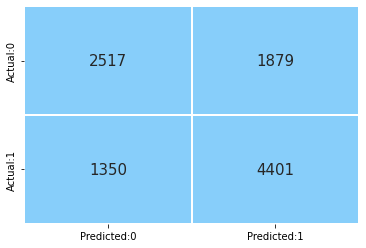

True Negative is: 2517 False Positive is: 1879 
 False Negative is: 1350 True Positive is: 4401
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  68.18 %
Percentage of misclassified observations:  31.82 %

Specificity:  0.5726
Sensitivity:  0.7653
Accuracy of The Model From Confusion Matrix: 68.18 %

Metrics:
Accuracy: 0.6817778653789297
Precision: 0.700796178343949
Recall: 0.7652582159624414


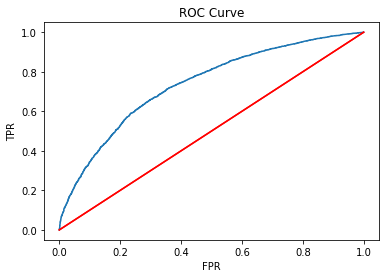

Roc_auc_score of The Model is: 0.7363589415711064


In [97]:
plot_confusion_matrix_train(lr_oh_train)

In [98]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc_train(model):
    
    
    y_pred_prob_train = model.predict_proba(X_train)[:,1]
    
    
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob_train)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_train, y_pred_prob_train),4)))

    # plot the grid
    plt.grid(True)
    print('Roc_auc_score For The Train Set of The Model is:',round(roc_auc_score(y_train,y_pred_prob_train),4))# area under the curve

Roc_auc_score For The Train Set of The Model is: 0.7364


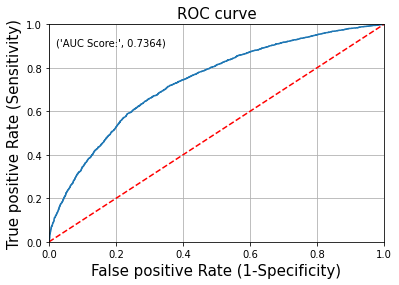

In [99]:
plot_roc_train(lr_oh_train)


ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

AUC score for the case is 0.74. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

###### LOGISTIC REGRESSION MODEL FOR TEST DATA

In [182]:
def modtest(model):
    ypred_test=model.predict(X_test)
    kf=KFold(n_splits=3,shuffle=True,random_state=1)
    model_test_acc = accuracy_score(y_test,ypred_test)
    print('Accuracy of the Model is:',round(model_test_acc*100,2),'%')
    print('Confusion_Matrix:\n',confusion_matrix(y_test,ypred_test))
    print('Classification_Report:\n',classification_report(y_test,ypred_test))
    score=cross_val_score(model,X_test,y_test,cv=kf,scoring='roc_auc')   
    print('score',score)
    print('bias Error:',round(np.mean(1-score)*100,2))
    print('variance Error:',round(np.std(score,ddof=1)*100,2))

In [183]:
# Fitting Logistic Regression to the Testing Data set
lr_oh_test = LogisticRegression(random_state = 1)
lr_oh_test.fit(X_test, y_test)

LogisticRegression(random_state=1)

In [184]:
modtest(lr_oh_test)

Accuracy of the Model is: 70.52 %
Confusion_Matrix:
 [[ 650  428]
 [ 320 1139]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63      1078
           1       0.73      0.78      0.75      1459

    accuracy                           0.71      2537
   macro avg       0.70      0.69      0.69      2537
weighted avg       0.70      0.71      0.70      2537

score [0.73140304 0.73583934 0.73865318]
bias Error: 26.47
variance Error: 0.37


In [103]:
def plot_confusion_matrix_test(model):
    
    # predict the target values using X_train
    ypred_test = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, ypred_test)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_test
    cnf_mat = confusion_matrix(y_act,ypred_test)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Test Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_test_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_test_acc*100,2),'%')

    print('\nMetrics')
    print("Accuracy:",metrics.accuracy_score(y_test, ypred_test))
    print("Precision:",metrics.precision_score(y_test, ypred_test))
    print("Recall:",metrics.recall_score(y_test, ypred_test))

    prob = model.predict_proba(X_test)
    prob = prob[:,1]

    fpr,tpr,thres = roc_curve(y_test,prob)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_test,prob))  # area under the curve

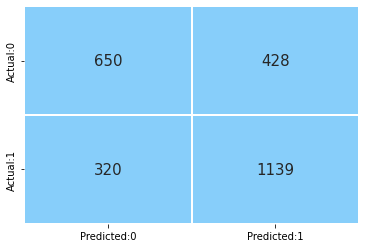

True Negative is: 650 False Positive is: 428 
 False Negative is: 320 True Positive is: 1139
Total Classified by the Model For Test Set is: 2537
Percentage of correctly classified observations:  70.52 %
Percentage of misclassified observations:  29.48 %

Specificity:  0.603
Sensitivity:  0.7807
Accuracy of The Model From Confusion Matrix: 70.52 %

Metrics
Accuracy: 0.7051635790303508
Precision: 0.7268666241225271
Recall: 0.7806716929403701


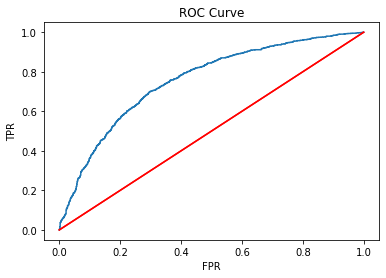

Roc_auc_score of The Model is: 0.7554927447955941


In [104]:
plot_confusion_matrix_test(lr_oh_test)

In [105]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc_test(model):
    
    
    y_pred_prob_test = model.predict_proba(X_test)[:,1]
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob_test),4)))

    # plot the grid
    plt.grid(True)
    print('Roc_auc_score For The Train Set of The Model is:',round(roc_auc_score(y_test,y_pred_prob_test),4))# area under the curve

Roc_auc_score For The Train Set of The Model is: 0.7555


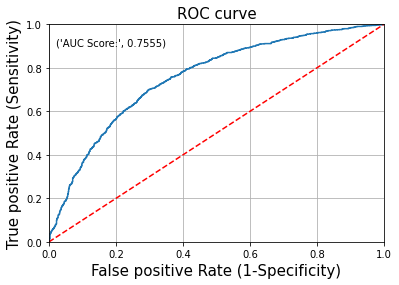

In [106]:
plot_roc_test(lr_oh_test)

##### Naive Bayes

###### Train Data

Accuracy of the Model is: 63.34 %
Confusion_Matrix:
 [[2982 1414]
 [2306 3445]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.56      0.68      0.62      4396
           1       0.71      0.60      0.65      5751

    accuracy                           0.63     10147
   macro avg       0.64      0.64      0.63     10147
weighted avg       0.65      0.63      0.63     10147

bias Error: 33.04
variance Error: 1.06


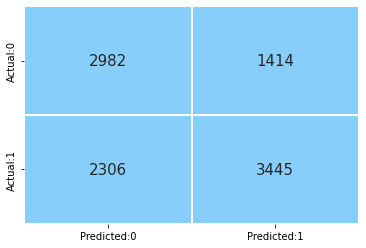

True Negative is: 2982 False Positive is: 1414 
 False Negative is: 2306 True Positive is: 3445
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  63.34 %
Percentage of misclassified observations:  36.66 %

Specificity:  0.6783
Sensitivity:  0.599
Accuracy of The Model From Confusion Matrix: 63.34 %

Metrics:
Accuracy: 0.6333891790677048
Precision: 0.7089936200864375
Recall: 0.5990262563032516


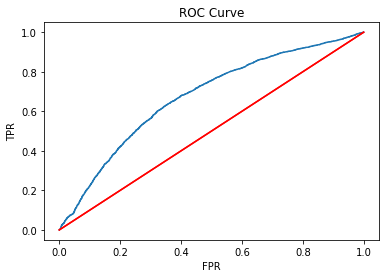

Roc_auc_score of The Model is: 0.6735506417446251
Roc_auc_score For The Train Set of The Model is: 0.6736


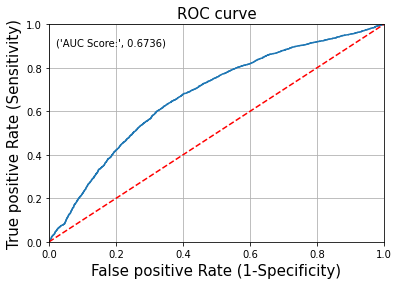

In [107]:
# instantiate the 'GaussianNB'
gnb_oh_train = GaussianNB()

# fit the model using fit() on train data
gnb_oh_train = gnb_oh_train.fit(X_train, y_train)
gnb_oh_train 
modtrain(gnb_oh_train)
plot_confusion_matrix_train(gnb_oh_train)
# plot the ROC curve
plot_roc_train(gnb_oh_train)

Interpretation: The recall for the positive class (i.e. customers who used the coupon) and the recall of the negative class (i.e. customers who will not use coupon) are stable. Thus, we can say that our model is performing good.

Note: Recall for the positive class is also known as Sensitivity and Recall for the negative class is also known as Specificity.

###### TEST DATASET

Accuracy of the Model is: 64.13 %
Confusion_Matrix:
 [[731 347]
 [563 896]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.56      0.68      0.62      1078
           1       0.72      0.61      0.66      1459

    accuracy                           0.64      2537
   macro avg       0.64      0.65      0.64      2537
weighted avg       0.65      0.64      0.64      2537

bias Error: 33.45
variance Error: 0.27


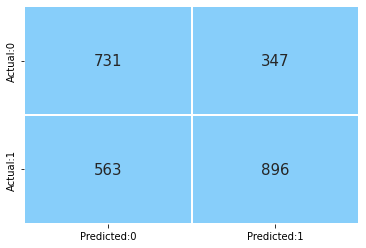

True Negative is: 731 False Positive is: 347 
 False Negative is: 563 True Positive is: 896
Total Classified by the Model For Test Set is: 2537
Percentage of correctly classified observations:  64.13 %
Percentage of misclassified observations:  35.87 %

Specificity:  0.6781
Sensitivity:  0.6141
Accuracy of The Model From Confusion Matrix: 64.13 %

Metrics
Accuracy: 0.6413086322428064
Precision: 0.7208366854384554
Recall: 0.6141192597669637


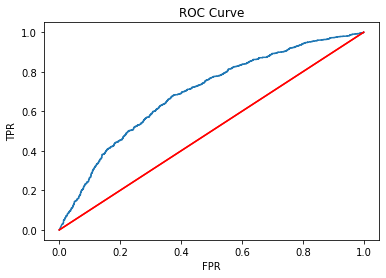

Roc_auc_score of The Model is: 0.6930331980757909
Roc_auc_score For The Train Set of The Model is: 0.693


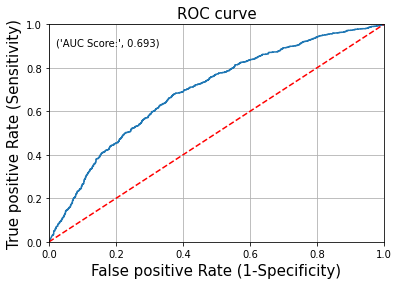

In [108]:
# instantiate the 'GaussianNB'
gnb_oh_test = GaussianNB()

# fit the model using fit() on TEST data
gnb_oh_test = gnb_oh_test.fit(X_test, y_test)
gnb_oh_test
modtest(gnb_oh_test)
plot_confusion_matrix_test(gnb_oh_test)
# plot the ROC curve
plot_roc_test(gnb_oh_test)

Interpretation: The recall for the positive class (i.e. customers who used the coupon) and the recall of the negative class (i.e. customers who will not use coupon) are stable. Thus, we can say that our model is performing good.

Note: Recall for the positive class is also known as Sensitivity and Recall for the negative class is also known as Specificity.

###### NON-PARAMETRIC MODELS

##### DECISION TREE

###### TRAIN DATA

In [109]:
# fit the model using fit() on train data
decision_tree_oh_train = DecisionTreeClassifier(random_state=1)
decision_tree_oh_train = decision_tree_oh_train.fit(X_train, y_train)
decision_tree_oh_train

DecisionTreeClassifier(random_state=1)

In [110]:
modtrain(decision_tree_oh_train)

Accuracy of the Model is: 98.4 %
Confusion_Matrix:
 [[4383   13]
 [ 149 5602]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4396
           1       1.00      0.97      0.99      5751

    accuracy                           0.98     10147
   macro avg       0.98      0.99      0.98     10147
weighted avg       0.98      0.98      0.98     10147

bias Error: 34.72
variance Error: 0.48


In [111]:
def plot_confusion_matrix_train_np(model):
    
    # predict the target values using X_train
    ypred_train = model.predict(X_train)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_train, ypred_train)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_train
    cnf_mat = confusion_matrix(y_act,ypred_train)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    # round the result upto 4 decimal points
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_train_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_train_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_train, ypred_train))
    print("Precision:",metrics.precision_score(y_train, ypred_train))
    print("Recall:",metrics.recall_score(y_train, ypred_train))

    fpr,tpr,thres = roc_curve(y_train,ypred_train)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_train,ypred_train))  # area under the curve

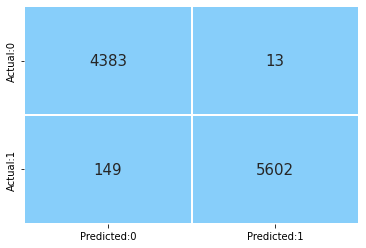

True Negative is: 4383 False Positive is: 13 
 False Negative is: 149 True Positive is: 5602
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  98.4 %
Percentage of misclassified observations:  1.6 %

Specificity:  0.997
Sensitivity:  0.9741
Accuracy of The Model From Confusion Matrix: 98.4 %

Metrics:
Accuracy: 0.9840346900561743
Precision: 0.9976847729296527
Recall: 0.9740914623543732


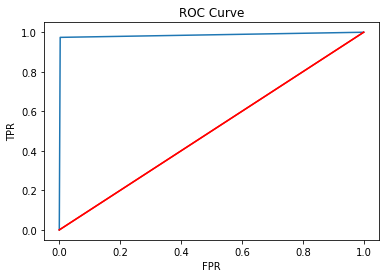

Roc_auc_score of The Model is: 0.9855671142527097


In [112]:
plot_confusion_matrix_train_np(decision_tree_oh_train)

In [113]:
def plot_roc_train_np(model):
    ypred_train = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, ypred_train)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)

    # plot the ROC curve
    plt.plot(fpr, tpr)
    
    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_train, ypred_train),4)))
                               
    # plot the grid
    plt.grid(True)
    

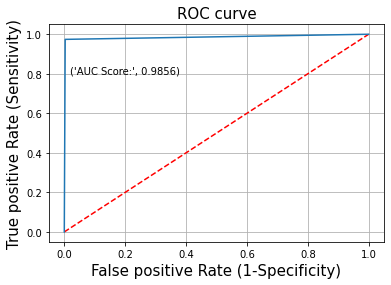

In [114]:
plot_roc_train_np(decision_tree_oh_train)

# Decision Tree for Test data

In [115]:
decision_tree_oh_test = DecisionTreeClassifier(random_state=1)
decision_tree_oh_test = decision_tree_oh_test.fit(X_test, y_test)
decision_tree_oh_test

DecisionTreeClassifier(random_state=1)

In [116]:
modtest(decision_tree_oh_test)

Accuracy of the Model is: 99.37 %
Confusion_Matrix:
 [[1078    0]
 [  16 1443]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1078
           1       1.00      0.99      0.99      1459

    accuracy                           0.99      2537
   macro avg       0.99      0.99      0.99      2537
weighted avg       0.99      0.99      0.99      2537

bias Error: 36.19
variance Error: 1.75


In [117]:
def plot_confusion_matrix_test_np(model):
    
    # predict the target values using X_test
    ypred_test = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test,ypred_test)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_test
    cnf_mat = confusion_matrix(y_act,ypred_test)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    # round the result upto 4 decimal points
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_test_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_test_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_test, ypred_test))
    print("Precision:",metrics.precision_score(y_test, ypred_test))
    print("Recall:",metrics.recall_score(y_test, ypred_test))

    fpr,tpr,thres = roc_curve(y_test,ypred_test)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_test,ypred_test))  # area under the curve

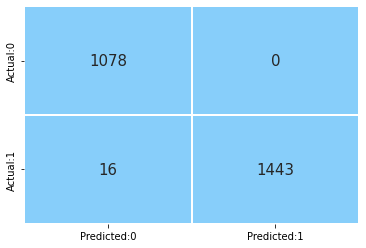

True Negative is: 1078 False Positive is: 0 
 False Negative is: 16 True Positive is: 1443
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  99.37 %
Percentage of misclassified observations:  0.63 %

Specificity:  1.0
Sensitivity:  0.989
Accuracy of The Model From Confusion Matrix: 99.37 %

Metrics:
Accuracy: 0.9936933385888845
Precision: 1.0
Recall: 0.9890335846470185


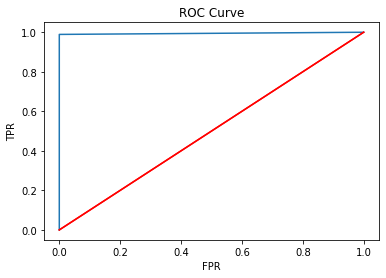

Roc_auc_score of The Model is: 0.9945167923235092


In [118]:
plot_confusion_matrix_test_np(decision_tree_oh_test)

In [119]:
def plot_roc_test_np(model):
    ypred_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, ypred_test)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # plot the ROC curve
    plt.plot(fpr, tpr)
    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)


    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, ypred_test),4)))
                               
    # plot the grid
    plt.grid(True)
    

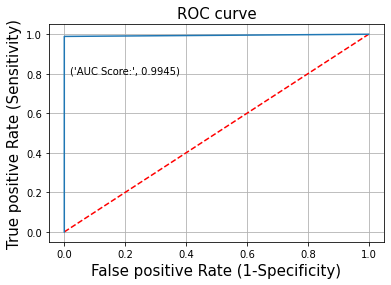

In [120]:
plot_roc_test_np(decision_tree_oh_test)

###### RANDOM FOREST

###### TRAIN DATASET

Accuracy of the Model is: 98.4 %
Confusion_Matrix:
 [[4303   93]
 [  69 5682]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4396
           1       0.98      0.99      0.99      5751

    accuracy                           0.98     10147
   macro avg       0.98      0.98      0.98     10147
weighted avg       0.98      0.98      0.98     10147

bias Error: 23.36
variance Error: 0.94


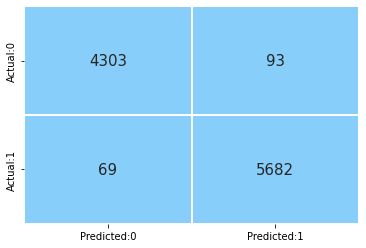

True Negative is: 4303 False Positive is: 93 
 False Negative is: 69 True Positive is: 5682
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  98.4 %
Percentage of misclassified observations:  1.6 %

Specificity:  0.9788
Sensitivity:  0.988
Accuracy of The Model From Confusion Matrix: 98.4 %

Metrics:
Accuracy: 0.9840346900561743
Precision: 0.9838961038961039
Recall: 0.9880020865936359


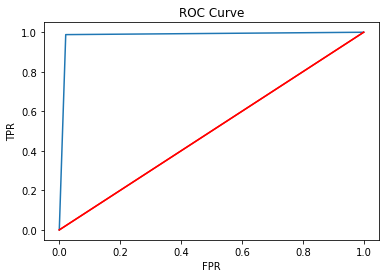

Roc_auc_score of The Model is: 0.9834232452986378


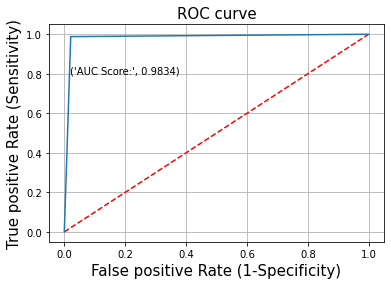

In [121]:
# fit the model using fit() on train data
rf_oh_train = RandomForestClassifier(random_state=1)
rf_oh_train = rf_oh_train.fit(X_train, y_train)
rf_oh_train
modtrain(rf_oh_train)
plot_confusion_matrix_train_np(rf_oh_train)
plot_roc_train_np(rf_oh_train)

###### TEST DATASET

Accuracy of the Model is: 99.37 %
Confusion_Matrix:
 [[1068   10]
 [   6 1453]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1078
           1       0.99      1.00      0.99      1459

    accuracy                           0.99      2537
   macro avg       0.99      0.99      0.99      2537
weighted avg       0.99      0.99      0.99      2537

bias Error: 25.81
variance Error: 0.38


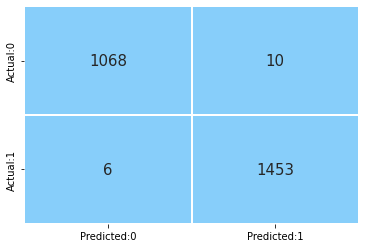

True Negative is: 1068 False Positive is: 10 
 False Negative is: 6 True Positive is: 1453
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  99.37 %
Percentage of misclassified observations:  0.63 %

Specificity:  0.9907
Sensitivity:  0.9959
Accuracy of The Model From Confusion Matrix: 99.37 %

Metrics:
Accuracy: 0.9936933385888845
Precision: 0.9931647300068353
Recall: 0.995887594242632


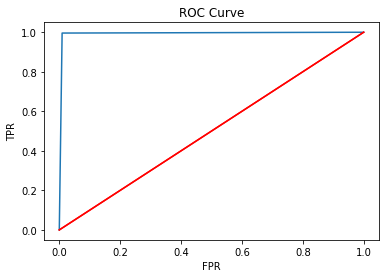

Roc_auc_score of The Model is: 0.9933055781973826


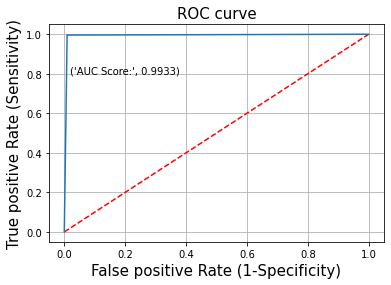

In [122]:
# fit the model using fit() on train data
rf_oh_test = RandomForestClassifier(random_state=1)
rf_oh_test = rf_oh_test.fit(X_test, y_test)
rf_oh_test
modtest(rf_oh_test)
plot_confusion_matrix_test_np(rf_oh_test)
plot_roc_test_np(rf_oh_test)

###### KNN

###### TRAIN DATA

Accuracy of the Model is: 79.87 %
Confusion_Matrix:
 [[3242 1154]
 [ 889 4862]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      4396
           1       0.81      0.85      0.83      5751

    accuracy                           0.80     10147
   macro avg       0.80      0.79      0.79     10147
weighted avg       0.80      0.80      0.80     10147

bias Error: 27.9
variance Error: 0.75


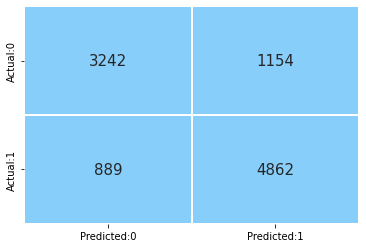

True Negative is: 3242 False Positive is: 1154 
 False Negative is: 889 True Positive is: 4862
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  79.87 %
Percentage of misclassified observations:  20.13 %

Specificity:  0.7375
Sensitivity:  0.8454
Accuracy of The Model From Confusion Matrix: 79.87 %

Metrics:
Accuracy: 0.7986597023750862
Precision: 0.8081781914893617
Recall: 0.8454181881411929


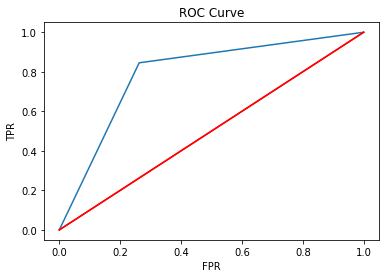

Roc_auc_score of The Model is: 0.7914534070824255


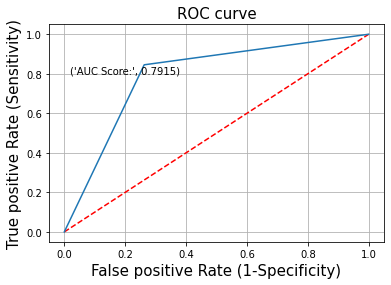

In [123]:
knn_oh_train = KNeighborsClassifier()
knn_oh_train = knn_oh_train.fit(X_train, y_train)
knn_oh_train
modtrain(knn_oh_train)
plot_confusion_matrix_train_np(knn_oh_train)
plot_roc_train_np(knn_oh_train)

###### TEST DATA

Accuracy of the Model is: 78.79 %
Confusion_Matrix:
 [[ 760  318]
 [ 220 1239]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74      1078
           1       0.80      0.85      0.82      1459

    accuracy                           0.79      2537
   macro avg       0.79      0.78      0.78      2537
weighted avg       0.79      0.79      0.79      2537

bias Error: 30.07
variance Error: 1.78


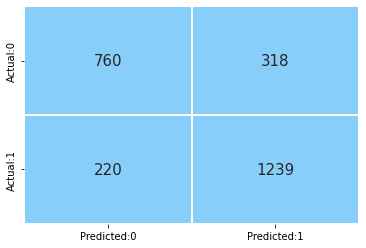

True Negative is: 760 False Positive is: 318 
 False Negative is: 220 True Positive is: 1239
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  78.79 %
Percentage of misclassified observations:  21.21 %

Specificity:  0.705
Sensitivity:  0.8492
Accuracy of The Model From Confusion Matrix: 78.79 %

Metrics:
Accuracy: 0.7879385100512416
Precision: 0.7957610789980732
Recall: 0.8492117888965045


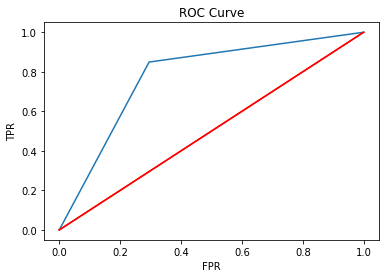

Roc_auc_score of The Model is: 0.7771105326671762


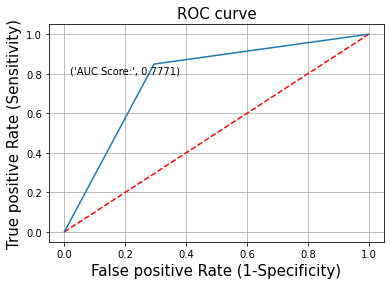

In [124]:
knn_oh_test = KNeighborsClassifier()
knn_oh_test = knn_oh_test.fit(X_test, y_test)
knn_oh_test
modtest(knn_oh_test)
plot_confusion_matrix_test_np(knn_oh_test)
plot_roc_test_np(knn_oh_test)

##### ENSEMLE TECHNIQUES

###### ADABOOSTING

###### TRAIN DATA

Accuracy of the Model is: 67.89 %
Confusion_Matrix:
 [[2490 1906]
 [1352 4399]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.65      0.57      0.60      4396
           1       0.70      0.76      0.73      5751

    accuracy                           0.68     10147
   macro avg       0.67      0.67      0.67     10147
weighted avg       0.68      0.68      0.68     10147

bias Error: 27.19
variance Error: 1.34


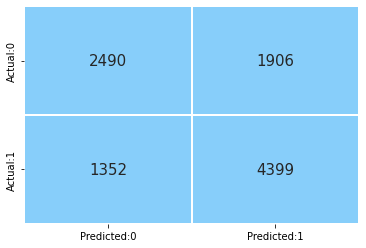

True Negative is: 2490 False Positive is: 1906 
 False Negative is: 1352 True Positive is: 4399
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  67.89 %
Percentage of misclassified observations:  32.11 %

Specificity:  0.5664
Sensitivity:  0.7649
Accuracy of The Model From Confusion Matrix: 67.89 %

Metrics:
Accuracy: 0.6789198777963931
Precision: 0.6977002379064234
Recall: 0.7649104503564598


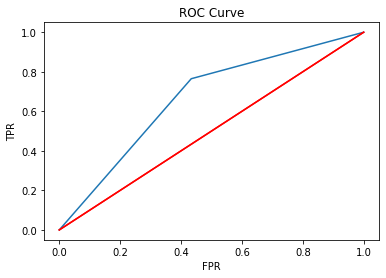

Roc_auc_score of The Model is: 0.6656672360972471


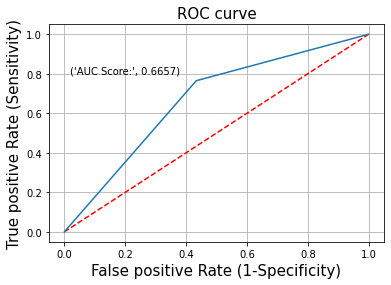

In [125]:
ada_oh_train = AdaBoostClassifier()
ada_oh_train=ada_oh_train.fit(X_train,y_train)
ada_oh_train
modtrain(ada_oh_train)
plot_confusion_matrix_train_np(ada_oh_train)
plot_roc_train_np(ada_oh_train)

###### TEST DATA

Accuracy of the Model is: 70.0 %
Confusion_Matrix:
 [[ 627  451]
 [ 310 1149]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.67      0.58      0.62      1078
           1       0.72      0.79      0.75      1459

    accuracy                           0.70      2537
   macro avg       0.69      0.68      0.69      2537
weighted avg       0.70      0.70      0.70      2537

bias Error: 26.76
variance Error: 0.46


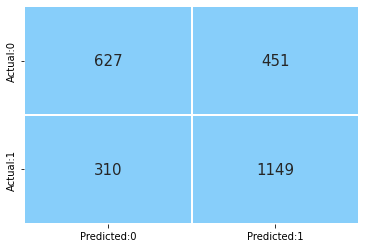

True Negative is: 627 False Positive is: 451 
 False Negative is: 310 True Positive is: 1149
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  70.0 %
Percentage of misclassified observations:  30.0 %

Specificity:  0.5816
Sensitivity:  0.7875
Accuracy of The Model From Confusion Matrix: 70.0 %

Metrics:
Accuracy: 0.7000394166338195
Precision: 0.718125
Recall: 0.7875257025359835


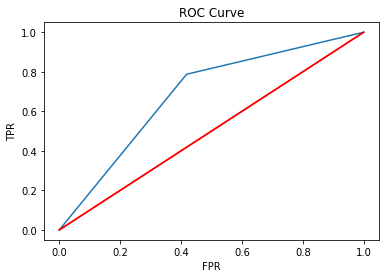

Roc_auc_score of The Model is: 0.684579177798604


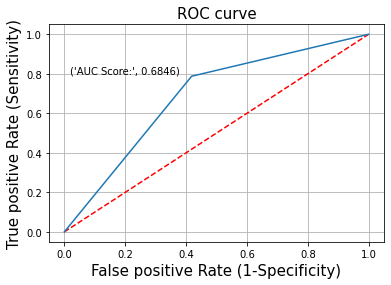

In [126]:
ada_oh_test = AdaBoostClassifier()
ada_oh_test=ada_oh_test.fit(X_test, y_test)
ada_oh_test
modtest(ada_oh_test)
plot_confusion_matrix_test_np(ada_oh_test)
plot_roc_test_np(ada_oh_test)

###### GRADIENT BOOSTING

###### Train Data

Accuracy of the Model is: 71.97 %
Confusion_Matrix:
 [[2681 1715]
 [1129 4622]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      4396
           1       0.73      0.80      0.76      5751

    accuracy                           0.72     10147
   macro avg       0.72      0.71      0.71     10147
weighted avg       0.72      0.72      0.72     10147

bias Error: 23.66
variance Error: 1.4


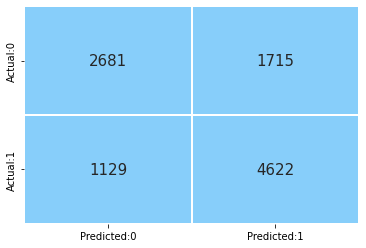

True Negative is: 2681 False Positive is: 1715 
 False Negative is: 1129 True Positive is: 4622
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  71.97 %
Percentage of misclassified observations:  28.03 %

Specificity:  0.6099
Sensitivity:  0.8037
Accuracy of The Model From Confusion Matrix: 71.97 %

Metrics:
Accuracy: 0.7197201143195033
Precision: 0.729367208458261
Recall: 0.8036863154234046


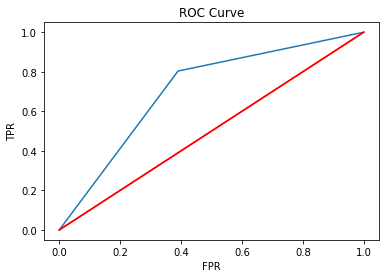

Roc_auc_score of The Model is: 0.7067794634441864


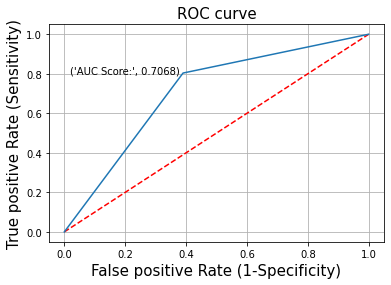

In [127]:
gb_oh_train=GradientBoostingClassifier()
gb_oh_train=gb_oh_train.fit(X_train,y_train)
gb_oh_train
modtrain(gb_oh_train)
plot_confusion_matrix_train_np(gb_oh_train)
plot_roc_train_np(gb_oh_train)

###### Test Data

Accuracy of the Model is: 75.33 %
Confusion_Matrix:
 [[ 697  381]
 [ 245 1214]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      1078
           1       0.76      0.83      0.80      1459

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537

bias Error: 24.87
variance Error: 0.25


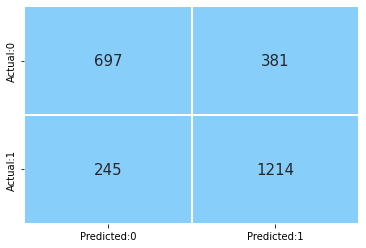

True Negative is: 697 False Positive is: 381 
 False Negative is: 245 True Positive is: 1214
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  75.33 %
Percentage of misclassified observations:  24.67 %

Specificity:  0.6466
Sensitivity:  0.8321
Accuracy of The Model From Confusion Matrix: 75.33 %

Metrics:
Accuracy: 0.7532518722901064
Precision: 0.761128526645768
Recall: 0.8320767649074708


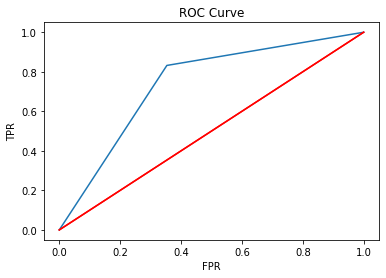

Roc_auc_score of The Model is: 0.7393222414518801


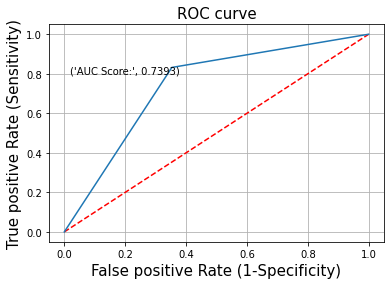

In [128]:
gb_oh_test=GradientBoostingClassifier()
gb_oh_test=gb_oh_test.fit(X_test,y_test)
gb_oh_test
modtest(gb_oh_test)
plot_confusion_matrix_test_np(gb_oh_test)
plot_roc_test_np(gb_oh_test)

###### XGBOOSTER

###### TRAIN DATA

Accuracy of the Model is: 85.2 %
Confusion_Matrix:
 [[3468  928]
 [ 574 5177]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      4396
           1       0.85      0.90      0.87      5751

    accuracy                           0.85     10147
   macro avg       0.85      0.84      0.85     10147
weighted avg       0.85      0.85      0.85     10147

bias Error: 20.67
variance Error: 1.02


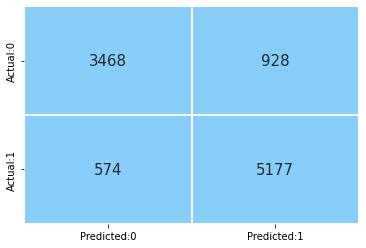

True Negative is: 3468 False Positive is: 928 
 False Negative is: 574 True Positive is: 5177
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  85.2 %
Percentage of misclassified observations:  14.8 %

Specificity:  0.7889
Sensitivity:  0.9002
Accuracy of The Model From Confusion Matrix: 85.2 %

Metrics:
Accuracy: 0.8519759534837883
Precision: 0.847993447993448
Recall: 0.9001912710832899


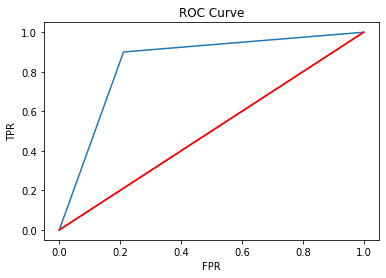

Roc_auc_score of The Model is: 0.8445451350866858


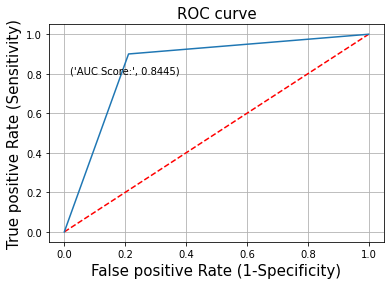

In [129]:
xgb_oh_train = XGBClassifier(random_state=1,silent=True,verbosity=0,n_jobs=-1)
xgb_oh_train=xgb_oh_train.fit(X_train, y_train)
xgb_oh_train
modtrain(xgb_oh_train)
plot_confusion_matrix_train_np(xgb_oh_train)
plot_roc_train_np(xgb_oh_train)

###### TEST DATA

Accuracy of the Model is: 95.59 %
Confusion_Matrix:
 [[1007   71]
 [  41 1418]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1078
           1       0.95      0.97      0.96      1459

    accuracy                           0.96      2537
   macro avg       0.96      0.95      0.95      2537
weighted avg       0.96      0.96      0.96      2537

bias Error: 25.56
variance Error: 1.03


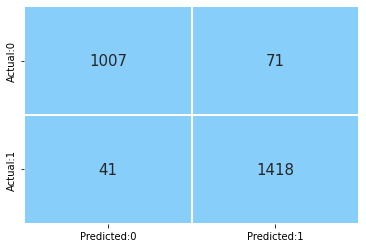

True Negative is: 1007 False Positive is: 71 
 False Negative is: 41 True Positive is: 1418
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  95.59 %
Percentage of misclassified observations:  4.41 %

Specificity:  0.9341
Sensitivity:  0.9719
Accuracy of The Model From Confusion Matrix: 95.59 %

Metrics:
Accuracy: 0.9558533701221915
Precision: 0.9523169912693082
Recall: 0.971898560657985


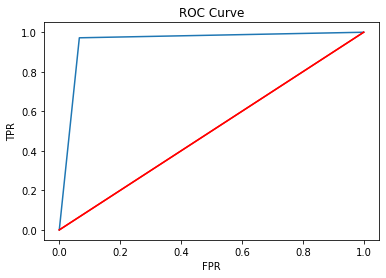

Roc_auc_score of The Model is: 0.9530179259690666


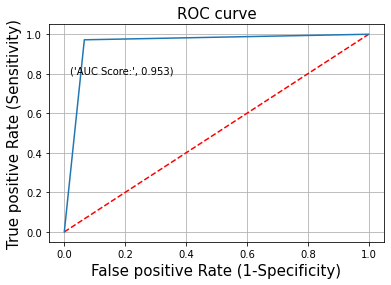

In [130]:
xgb_oh_test= XGBClassifier(random_state=1,silent=True,verbosity=0,n_jobs=-1)
xgb_oh_test=xgb_oh_test.fit(X_test,y_test)
xgb_oh_test
modtest(xgb_oh_test)
plot_confusion_matrix_test_np(xgb_oh_test)
plot_roc_test_np(xgb_oh_test)

##### HYPER PARAMETER TUNING:

###### NAIVE BAYES

###### Train

In [131]:
hyp_paramaters = {'var_smoothing':np.logspace(0,-9,num=100)}
gnb= GaussianNB()
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(gnb,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

{'var_smoothing': 0.2848035868435802}

Accuracy of the Model is: 65.26 %
Confusion_Matrix:
 [[2462 1934]
 [1591 4160]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58      4396
           1       0.68      0.72      0.70      5751

    accuracy                           0.65     10147
   macro avg       0.65      0.64      0.64     10147
weighted avg       0.65      0.65      0.65     10147

bias Error: 30.61
variance Error: 0.9


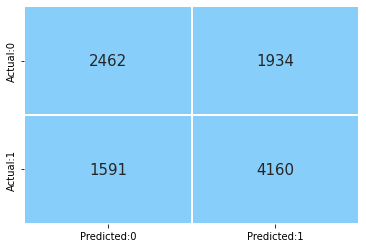

True Negative is: 2462 False Positive is: 1934 
 False Negative is: 1591 True Positive is: 4160
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  65.26 %
Percentage of misclassified observations:  34.74 %

Specificity:  0.5601
Sensitivity:  0.7234
Accuracy of The Model From Confusion Matrix: 65.26 %

Metrics:
Accuracy: 0.6526066817778654
Precision: 0.6826386609780112
Recall: 0.7233524604416623


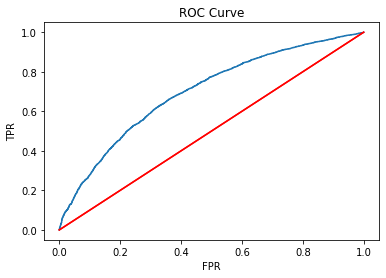

Roc_auc_score of The Model is: 0.6976424482255648
Roc_auc_score For The Train Set of The Model is: 0.6976


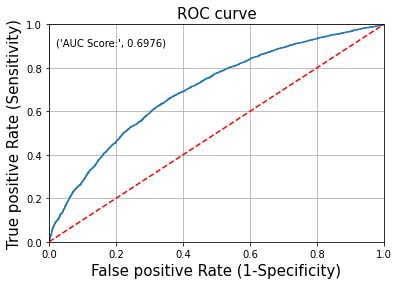

In [132]:
gnb_oh_model2_train_tunned = GaussianNB(var_smoothing=gs.best_params_['var_smoothing'])
gnb_oh_model2_train_tunned=gnb_oh_model2_train_tunned.fit(X_train,y_train)
modtrain(gnb_oh_model2_train_tunned)
plot_confusion_matrix_train(gnb_oh_model2_train_tunned)
plot_roc_train(gnb_oh_model2_train_tunned)

###### Test

In [133]:
hyp_paramaters = {'var_smoothing':np.logspace(0,-9,num=100)}
gnb= GaussianNB()
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(gnb,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
gs.best_params_

{'var_smoothing': 0.43287612810830584}

Accuracy of the Model is: 64.45 %
Confusion_Matrix:
 [[ 592  486]
 [ 416 1043]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57      1078
           1       0.68      0.71      0.70      1459

    accuracy                           0.64      2537
   macro avg       0.63      0.63      0.63      2537
weighted avg       0.64      0.64      0.64      2537

bias Error: 30.03
variance Error: 0.62


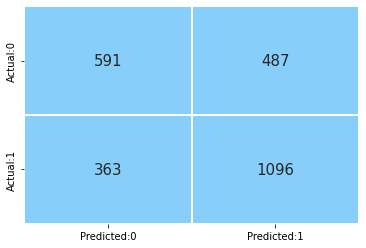

True Negative is: 591 False Positive is: 487 
 False Negative is: 363 True Positive is: 1096
Total Classified by the Model For Test Set is: 2537
Percentage of correctly classified observations:  66.5 %
Percentage of misclassified observations:  33.5 %

Specificity:  0.5482
Sensitivity:  0.7512
Accuracy of The Model From Confusion Matrix: 66.5 %

Metrics
Accuracy: 0.6649586125344895
Precision: 0.6923562855337966
Recall: 0.7511994516792323


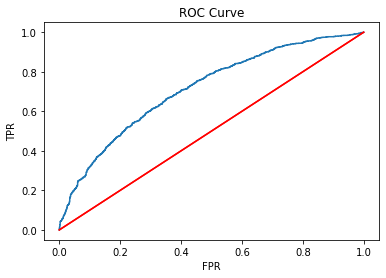

Roc_auc_score of The Model is: 0.712774080907832
Roc_auc_score For The Train Set of The Model is: 0.7128


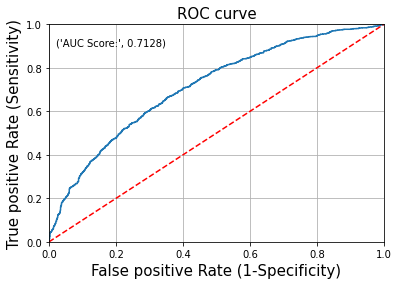

In [134]:
gnb_oh_model2_test_tunned = GaussianNB(var_smoothing=gs.best_params_['var_smoothing'])
gnb_oh_model2_test_tunned=gnb_oh_model2_test_tunned.fit(X_test,y_test)
modtest(gnb_oh_model2_train_tunned)
plot_confusion_matrix_test(gnb_oh_model2_test_tunned)
plot_roc_test(gnb_oh_model2_test_tunned)

###### DECISION TREE

###### DECISION TREE TRAIN DATA

In [174]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10),'min_samples_leaf':np.arange(1,10)}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs=GridSearchCV(estimator=DecisionTreeClassifier(),n_jobs=-1,scoring='roc_auc',param_grid=hyp_paramaters,cv=kf)
gs.fit(X_train,y_train)
gs.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 9}

Accuracy of the Model is: 52.76 %
Confusion_Matrix:
 [[2353 2043]
 [2750 3001]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.46      0.54      0.50      4396
           1       0.59      0.52      0.56      5751

    accuracy                           0.53     10147
   macro avg       0.53      0.53      0.53     10147
weighted avg       0.54      0.53      0.53     10147

bias Error: 26.7
variance Error: 0.77


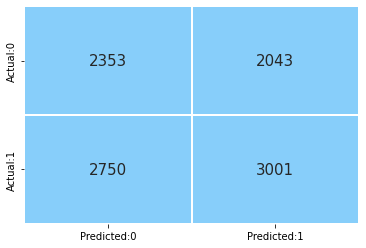

True Negative is: 2353 False Positive is: 2043 
 False Negative is: 2750 True Positive is: 3001
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  52.76 %
Percentage of misclassified observations:  47.24 %

Specificity:  0.5353
Sensitivity:  0.5218
Accuracy of The Model From Confusion Matrix: 52.76 %

Metrics:
Accuracy: 0.5276436385138464
Precision: 0.594964314036479
Recall: 0.5218222917753434


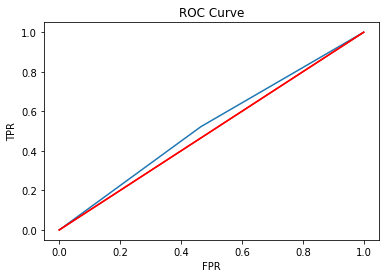

Roc_auc_score of The Model is: 0.528540809217972


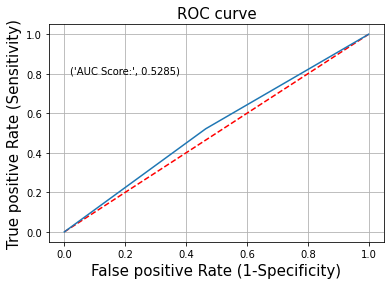

In [175]:
dt2_oh_train=DecisionTreeClassifier(criterion='entropy',max_depth=gs.best_params_['max_depth'],
                                    min_samples_split=gs.best_params_['min_samples_split'],
                                    min_samples_leaf=gs.best_params_['min_samples_leaf'])
dt2_oh_train=dt2_oh_train.fit(xtrain,y_train)
modtrain(dt2_oh_train)
plot_confusion_matrix_train_np(dt2_oh_train)
plot_roc_train_np(dt2_oh_train)

###### DECISION TREE TEST DATA

In [137]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10),
                  }]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs=GridSearchCV(estimator=DecisionTreeClassifier(),n_jobs=-1,scoring='roc_auc',param_grid=hyp_paramaters,cv=kf)
gs.fit(X_test,y_test)
gs.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3}

Accuracy of the Model is: 55.42 %
Confusion_Matrix:
 [[ 385  693]
 [ 438 1021]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.47      0.36      0.41      1078
           1       0.60      0.70      0.64      1459

    accuracy                           0.55      2537
   macro avg       0.53      0.53      0.52      2537
weighted avg       0.54      0.55      0.54      2537

bias Error: 28.39
variance Error: 1.08


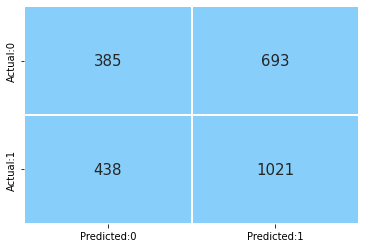

True Negative is: 385 False Positive is: 693 
 False Negative is: 438 True Positive is: 1021
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  55.42 %
Percentage of misclassified observations:  44.58 %

Specificity:  0.3571
Sensitivity:  0.6998
Accuracy of The Model From Confusion Matrix: 55.42 %

Metrics:
Accuracy: 0.5541978715017738
Precision: 0.5956826137689615
Recall: 0.6997943797121315


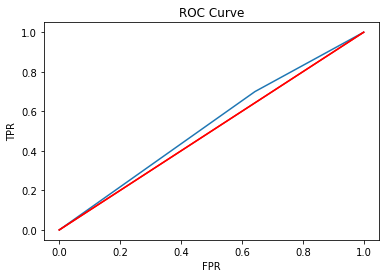

Roc_auc_score of The Model is: 0.5284686184274943


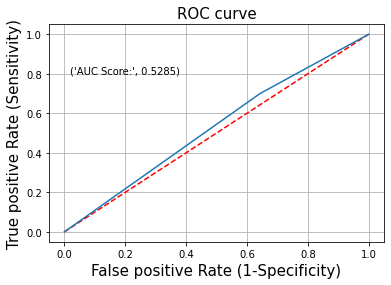

In [138]:
dt2_oh_test=DecisionTreeClassifier(criterion=gs.best_params_['criterion'],max_depth=gs.best_params_['max_depth'],
                                    min_samples_split=gs.best_params_['min_samples_split'])
dt2_oh_test=dt2_oh_test.fit(xtest,y_test)
modtest(dt2_oh_test)
plot_confusion_matrix_test_np(dt2_oh_test)
plot_roc_test_np(dt2_oh_test)

###### RANDOM FOREST

###### RANDOM FOREST TRAIN DATA TUNNING

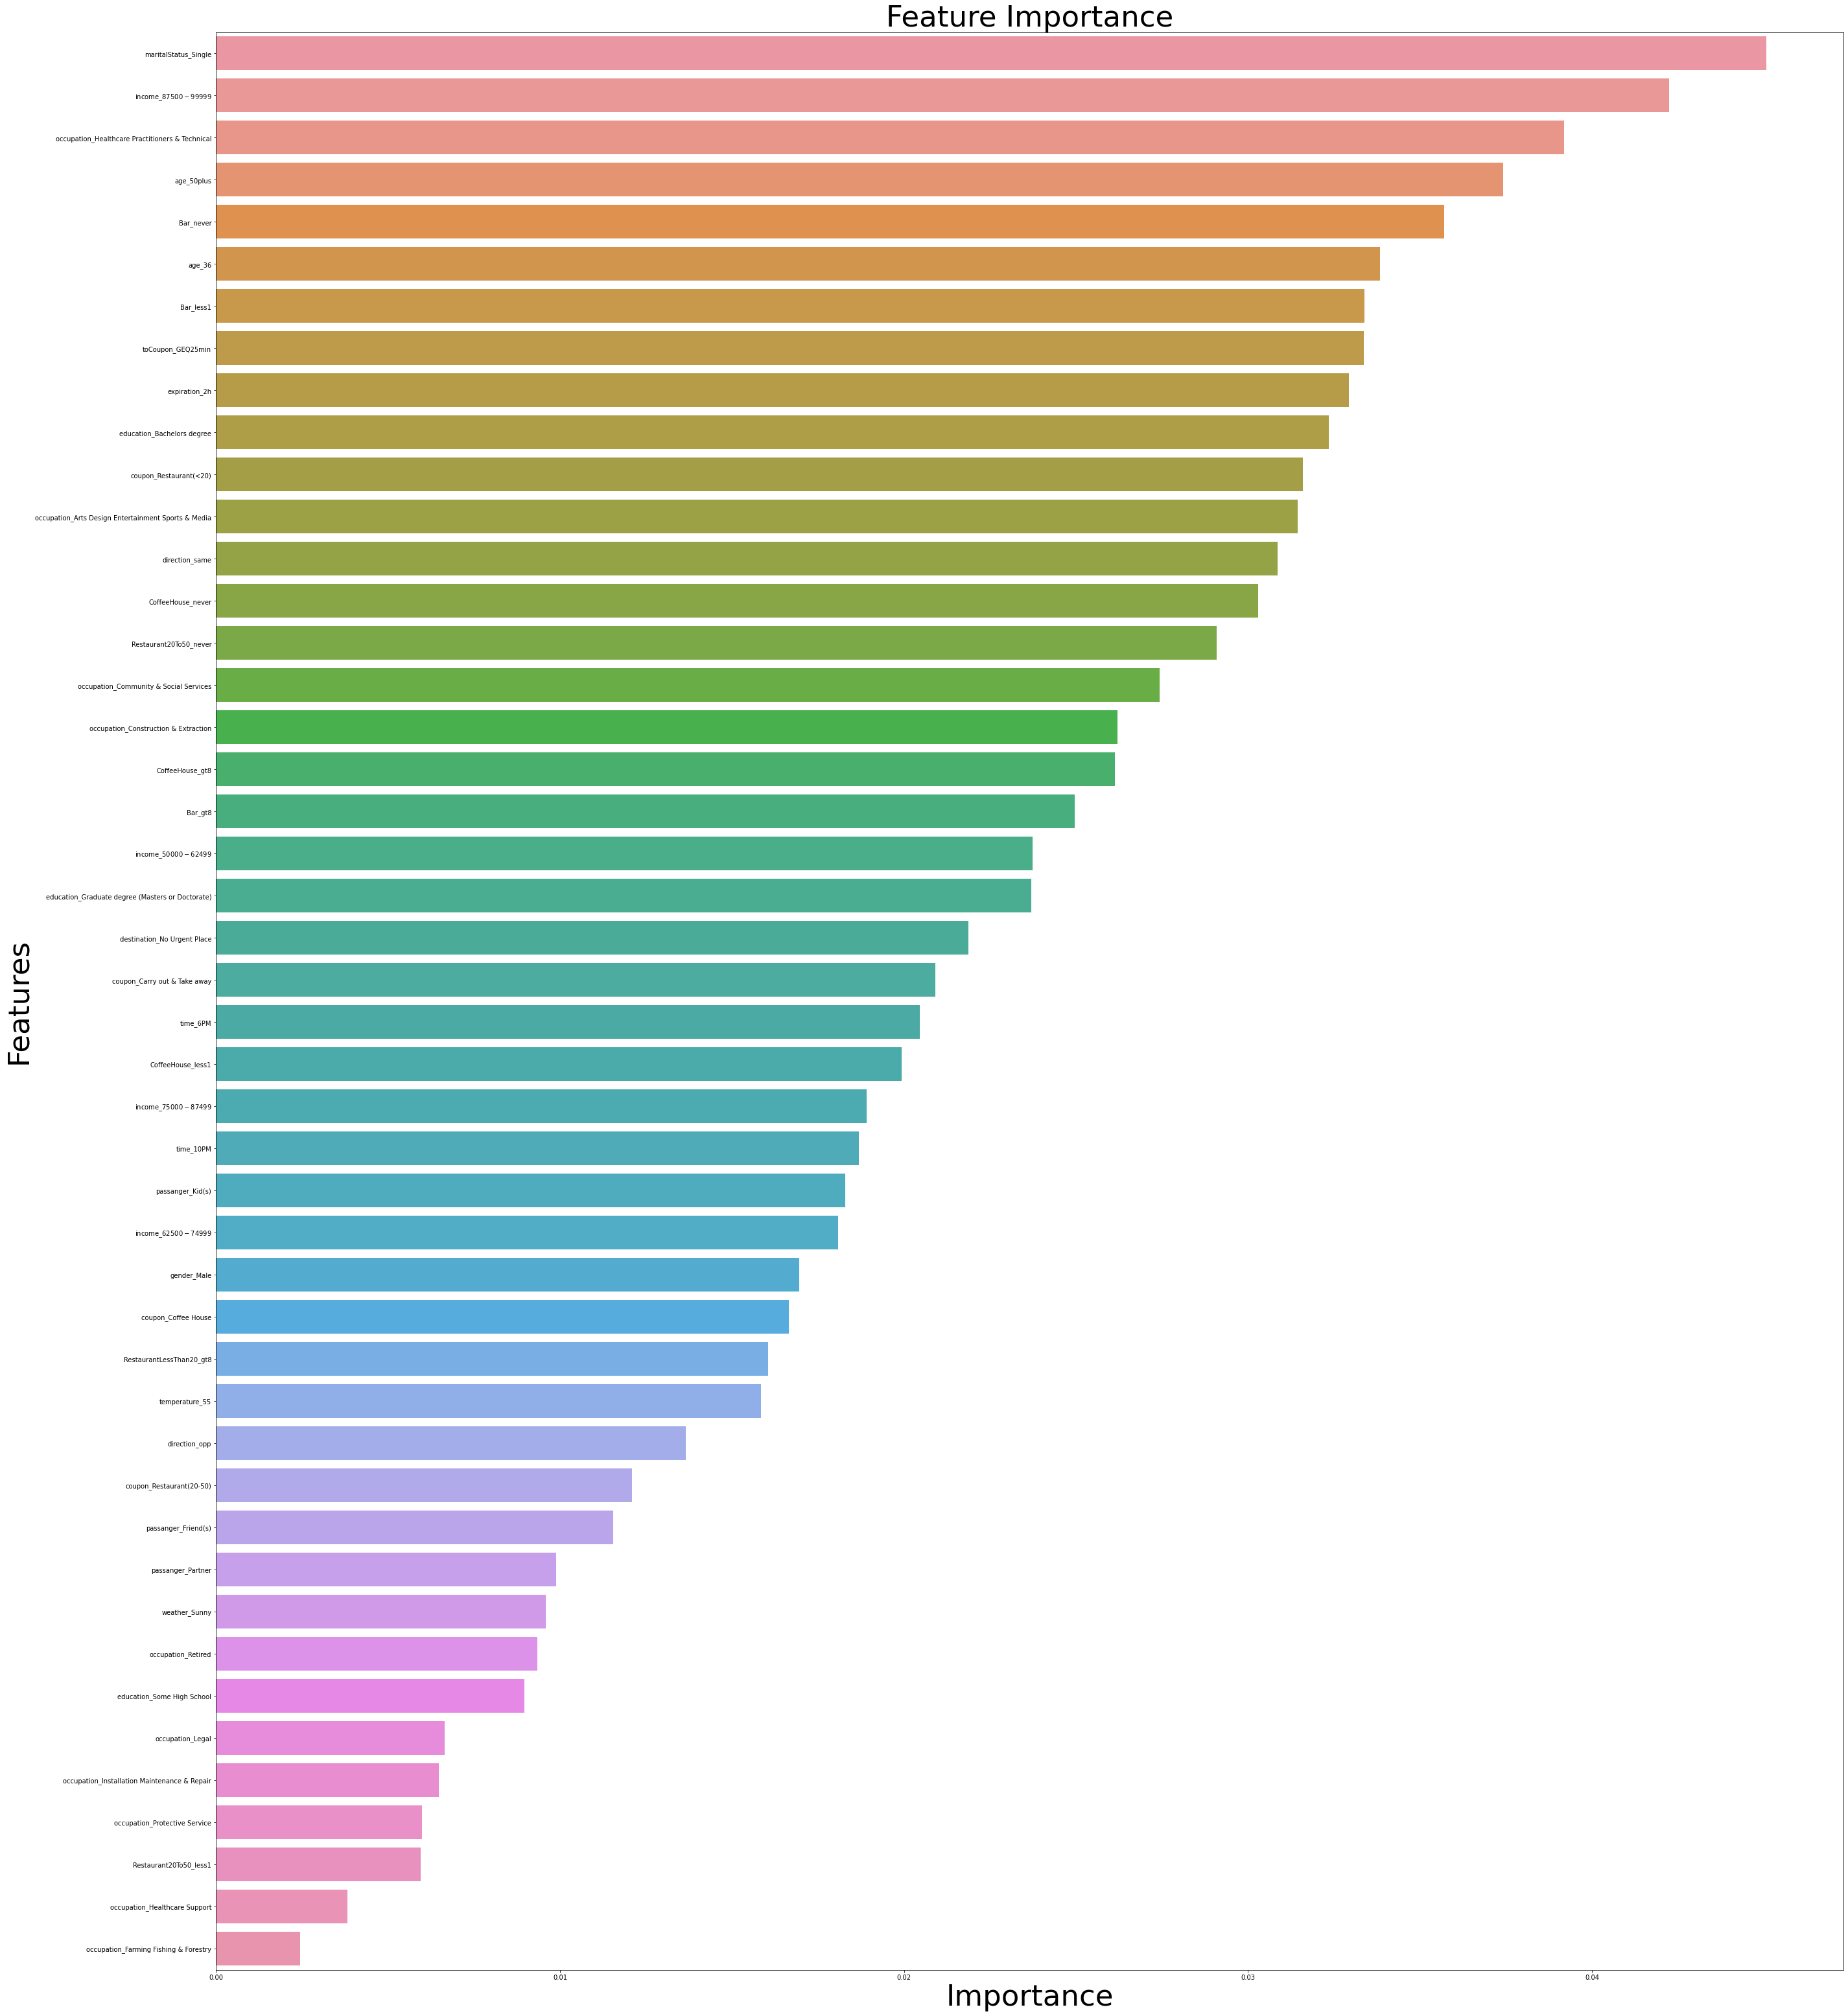

In [139]:
rf_oh_train = RandomForestClassifier(random_state = 1)
rfr_oh_train = rf_oh_train.fit(X_train, y_train)
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': rfr_oh_train.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(45,55))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 45)
plt.xlabel('Importance', fontsize = 45)
plt.ylabel('Features', fontsize = 45)

# display the plot
plt.show()

In [140]:
pd.DataFrame(rfr_oh_train.feature_importances_, columns = ['Imp'],index = xtrain.columns).sort_values(by = 'Imp',ascending= False)

,Imp
maritalStatus_Single,0.045065
income_$87500 - $99999,0.042239
occupation_Healthcare Practitioners & Technical,0.039185
age_50plus,0.037420
Bar_never,0.035707
age_36,0.033835
Bar_less1,0.033387
toCoupon_GEQ25min,0.033364
expiration_2h,0.032934
education_Bachelors degree,0.032349


In [141]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]

kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs = GridSearchCV(estimator = rfr_oh_train, 
                       param_grid = hyp_paramaters, 
                       cv = kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 8,
 'n_estimators': 200}

In [142]:
rfr_oh_train = RandomForestClassifier(criterion = gs.best_params_['criterion'], 
                                                   max_depth = gs.best_params_['max_depth'], 
                                                   min_samples_split = gs.best_params_['min_samples_split'], 
                                                   n_estimators = gs.best_params_['n_estimators'],
                                                   random_state = 1)
rfr_oh_train=rfr_oh_train.fit(xtrain,y_train)
# get the top 10 important columns from the dataframe 'important_features' by using iloc
important_columns = list(important_features['Features'].iloc[:10])

# use fit() to fit the model on the train set
random_forest_ohtrain_tuned_model = rfr_oh_train.fit(xtrain[important_columns], y_train)

# predict for train set
y_pred_ohtrain_tunned = random_forest_ohtrain_tuned_model.predict(xtrain[important_columns])


In [143]:
y_pred_ohtrain_tunned = random_forest_ohtrain_tuned_model.predict(xtrain[important_columns])
def modtrain_rf(model):
    ypred_train=y_pred_ohtrain_tunned
    kf=KFold(n_splits=3,shuffle=True,random_state=1)
    model_train_acc = accuracy_score(y_train,ypred_train)
    print('Accuracy of the Model is:',round(model_train_acc*100,2),'%')
    print('Confusion_Matrix:\n',confusion_matrix(y_train,ypred_train))
    print('Classification_Report:\n',classification_report(y_train,ypred_train))
    score=cross_val_score(model,X_train,y_train,cv=kf,scoring='roc_auc')    
    print('bias Error:',round(np.mean(1-score)*100,2))
    print('variance Error:',round(np.std(score,ddof=1)*100,2))

In [144]:
modtrain_rf(random_forest_ohtrain_tuned_model)

Accuracy of the Model is: 62.47 %
Confusion_Matrix:
 [[1257 3139]
 [ 669 5082]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.65      0.29      0.40      4396
           1       0.62      0.88      0.73      5751

    accuracy                           0.62     10147
   macro avg       0.64      0.58      0.56     10147
weighted avg       0.63      0.62      0.58     10147

bias Error: 21.95
variance Error: 1.18


In [145]:
y_pred_ohtrain_tunned = random_forest_ohtrain_tuned_model.predict(xtrain[important_columns])
def plot_confusion_matrix_train_np_rf(model):
    ypred_train=y_pred_ohtrain_tunned
    cm = confusion_matrix(y_train, ypred_train)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_train
    cnf_mat = confusion_matrix(y_act,ypred_train)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    # round the result upto 4 decimal points
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_train_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_train_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_train, ypred_train))
    print("Precision:",metrics.precision_score(y_train, ypred_train))
    print("Recall:",metrics.recall_score(y_train, ypred_train))

    fpr,tpr,thres = roc_curve(y_train,ypred_train)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_train,ypred_train))  # area under the curve

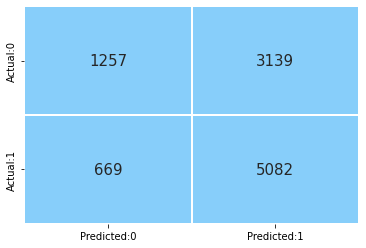

True Negative is: 1257 False Positive is: 3139 
 False Negative is: 669 True Positive is: 5082
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  62.47 %
Percentage of misclassified observations:  37.53 %

Specificity:  0.2859
Sensitivity:  0.8837
Accuracy of The Model From Confusion Matrix: 62.47 %

Metrics:
Accuracy: 0.624716665024145
Precision: 0.6181729716579492
Recall: 0.8836724047991653


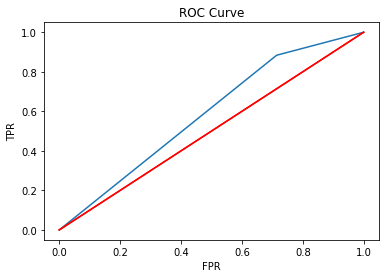

Roc_auc_score of The Model is: 0.5848070850201468


In [146]:
plot_confusion_matrix_train_np_rf(random_forest_ohtrain_tuned_model)

In [147]:
y_pred_ohtrain_tunned = random_forest_ohtrain_tuned_model.predict(xtrain[important_columns])
def plot_roc_train_np_rf(model):
    ypred_train=y_pred_ohtrain_tunned
    fpr, tpr, thresholds = roc_curve(y_train, ypred_train)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # plot the ROC curve
    plt.plot(fpr, tpr)
    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_train, ypred_train),4)))
                               
    # plot the grid
    plt.grid(True)

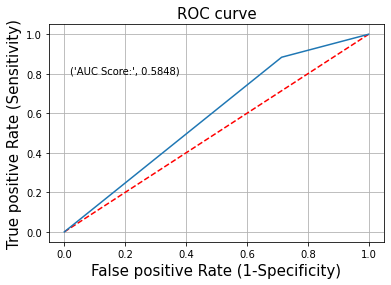

In [148]:
plot_roc_train_np_rf(random_forest_ohtrain_tuned_model)

###### RANDOM FOREST TEST DATA TUNNING

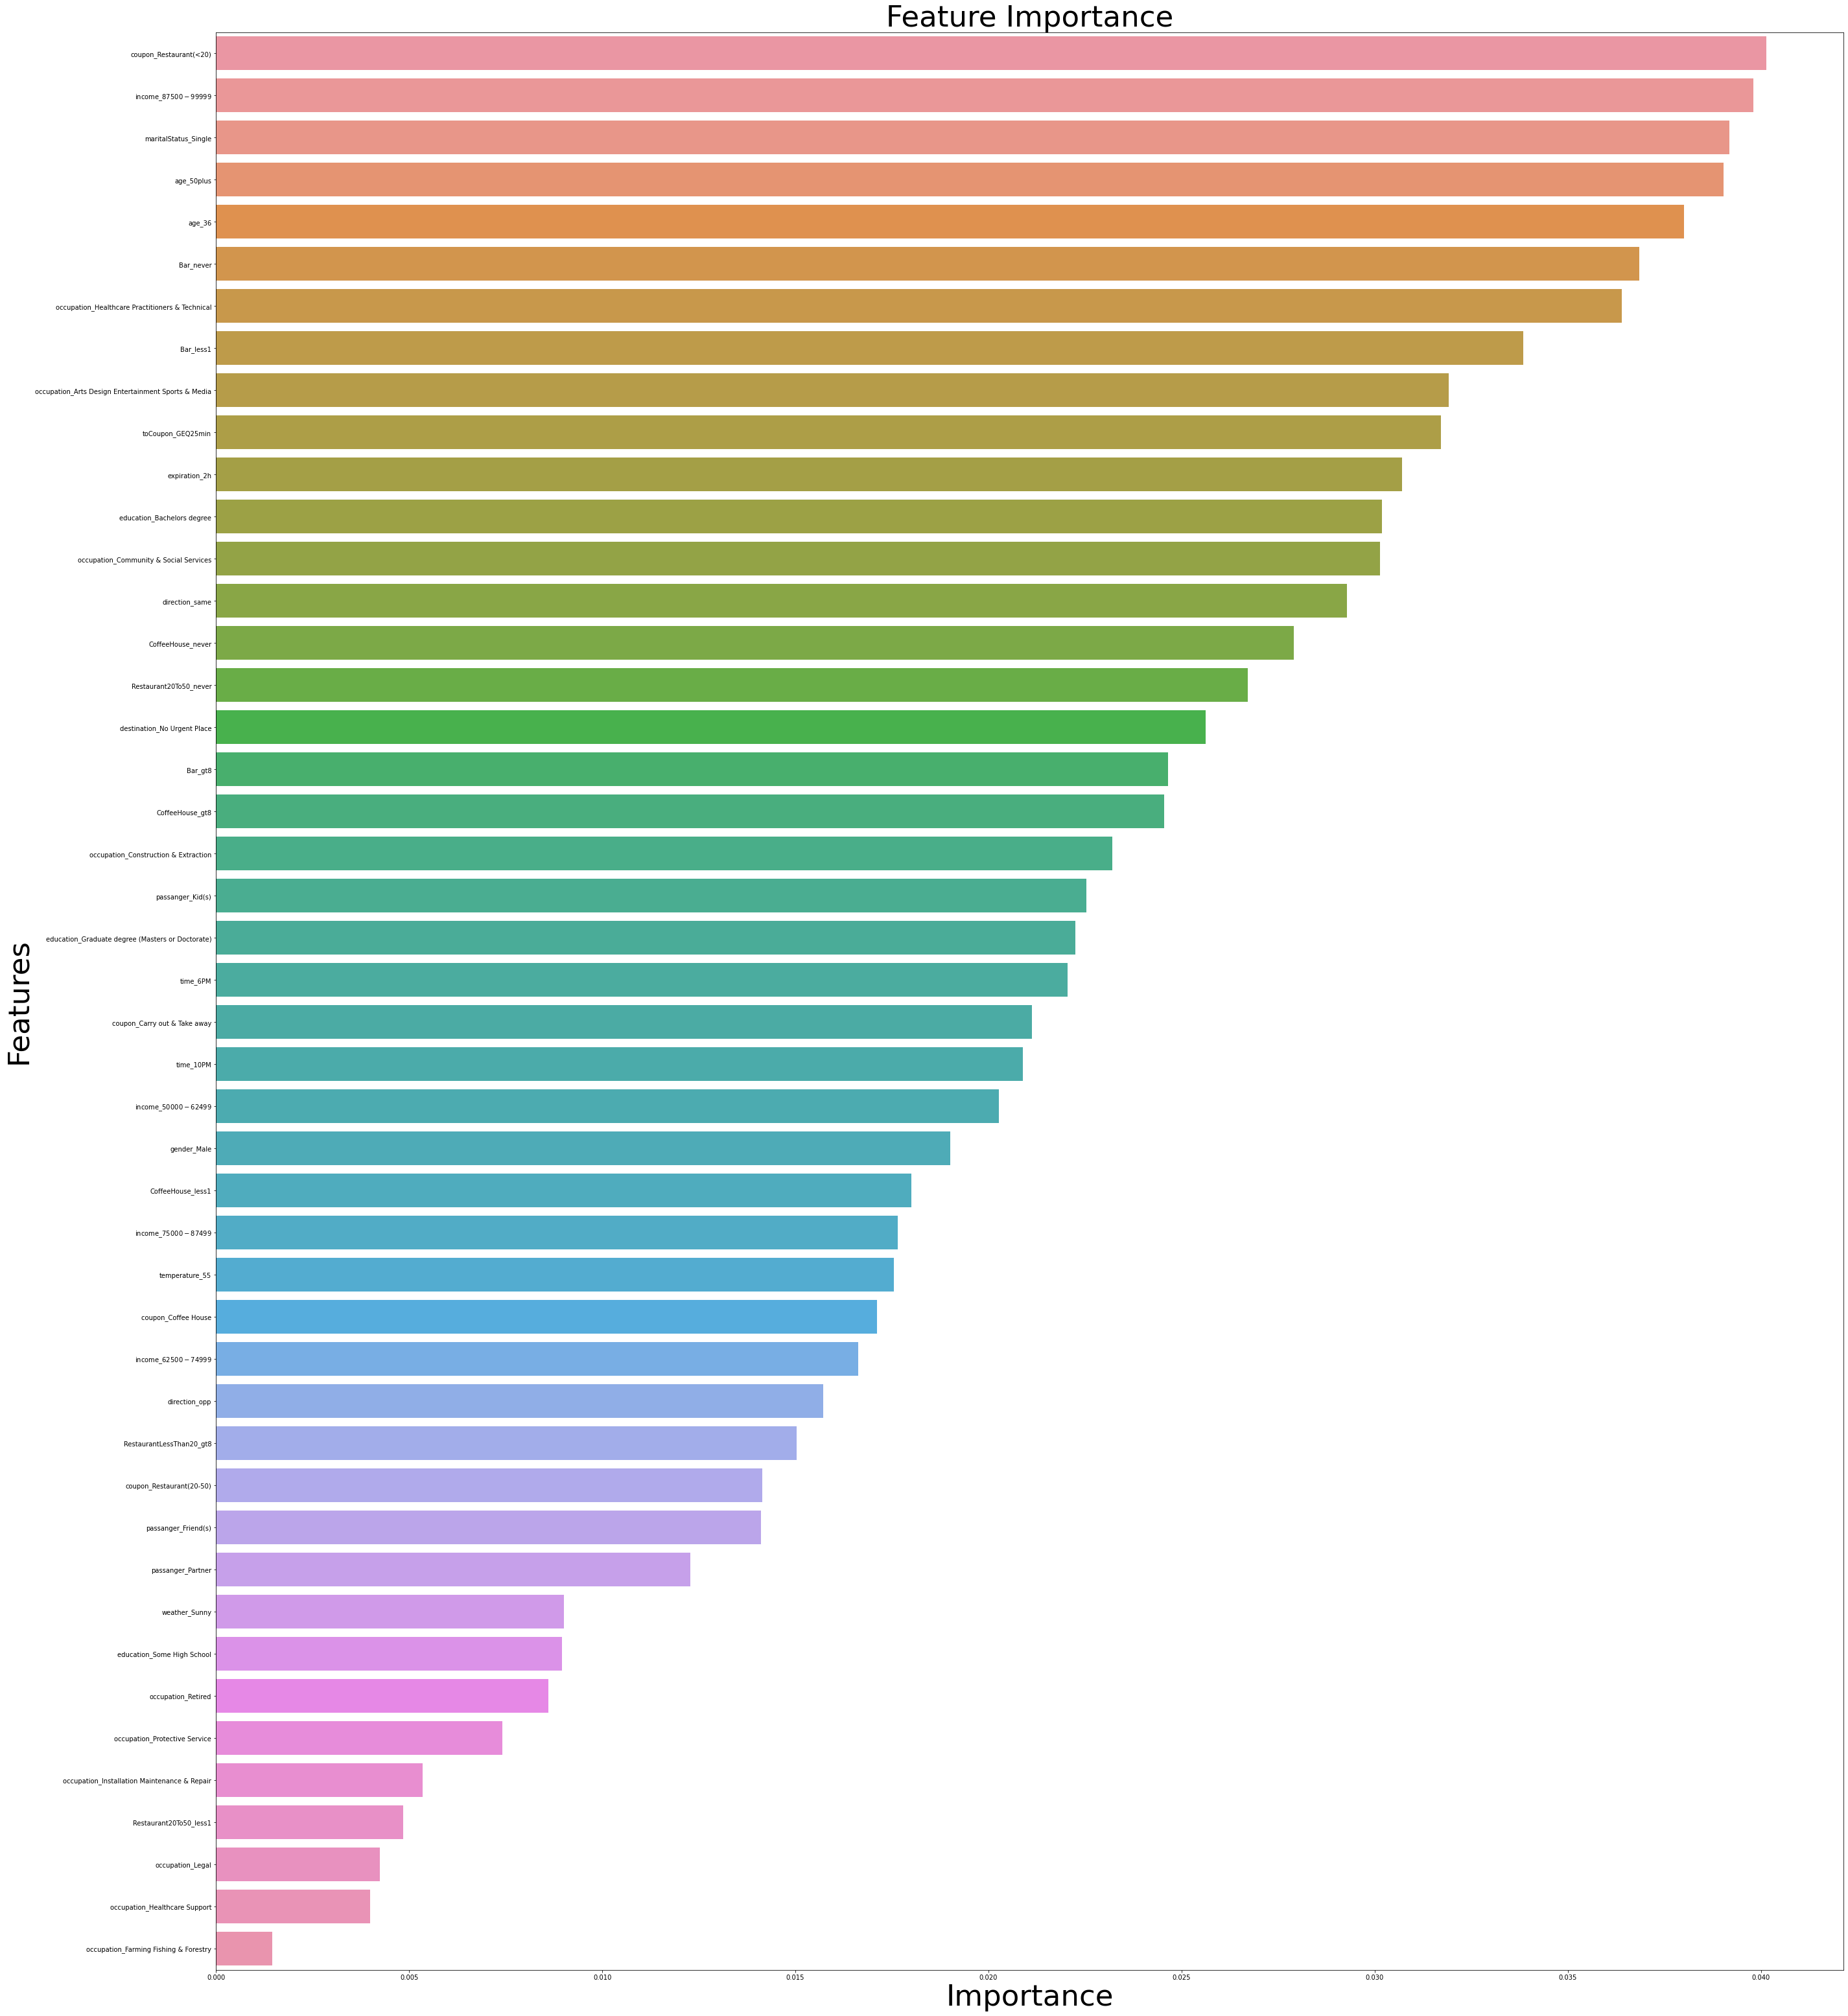

In [149]:
rf_oh_test = RandomForestClassifier(random_state = 1)
rfr_oh_test = rf_oh_test.fit(X_test, y_test)
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': xtest.columns, 
                                   'Importance': rfr_oh_test.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(45,55))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 45)
plt.xlabel('Importance', fontsize = 45)
plt.ylabel('Features', fontsize = 45)

# display the plot
plt.show()

In [150]:
pd.DataFrame(rfr_oh_test.feature_importances_, columns = ['Imp'],index = xtest.columns).sort_values(by = 'Imp',ascending= False)

,Imp
coupon_Restaurant(<20),0.040135
income_$87500 - $99999,0.039797
maritalStatus_Single,0.039176
age_50plus,0.039024
age_36,0.038007
Bar_never,0.036852
occupation_Healthcare Practitioners & Technical,0.036399
Bar_less1,0.033853
occupation_Arts Design Entertainment Sports & Media,0.031911
toCoupon_GEQ25min,0.031719


In [151]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs = GridSearchCV(estimator = rfr_oh_test, 
                       param_grid = hyp_paramaters, 
                       cv = kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 8,
 'n_estimators': 200}

In [152]:
rfr_oh_test = RandomForestClassifier(criterion = gs.best_params_['criterion'], 
                                                   max_depth = gs.best_params_['max_depth'], 
                                                   min_samples_split = gs.best_params_['min_samples_split'], 
                                                   n_estimators = gs.best_params_['n_estimators'],
                                                   random_state = 1)
rfr_oh_test=rfr_oh_test.fit(xtest,y_test)
# get the top 10 important columns from the dataframe 'important_features' by using iloc
important_columns = list(important_features['Features'].iloc[:10])

# instantiate the 'RandomForestClassifier' 

# use fit() to fit the model on the train set
random_forest_ohtest_tuned_model = rfr_oh_test.fit(xtest[important_columns], y_test)

# predict for test set
y_pred_ohtest_tunned = random_forest_ohtest_tuned_model.predict(xtest[important_columns])

In [153]:
y_pred_ohtest_tunned = random_forest_ohtest_tuned_model.predict(xtest[important_columns])
def modtest_rf(model):
    ypred_test=y_pred_ohtest_tunned
    kf=KFold(n_splits=3,shuffle=True,random_state=1)
    model_test_acc = accuracy_score(y_test,ypred_test)
    print('Accuracy of the Model is:',round(model_test_acc*100,2),'%')
    print('Confusion_Matrix:\n',confusion_matrix(y_test,ypred_test))
    print('Classification_Report:\n',classification_report(y_test,ypred_test))
    score=cross_val_score(model,X_test,y_test,cv=kf,scoring='roc_auc')    
    print('bias Error:',round(np.mean(1-score)*100,2))
    print('variance Error:',round(np.std(score,ddof=1)*100,2))

In [154]:
modtest_rf(random_forest_ohtest_tuned_model)

Accuracy of the Model is: 63.22 %
Confusion_Matrix:
 [[ 385  693]
 [ 240 1219]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.62      0.36      0.45      1078
           1       0.64      0.84      0.72      1459

    accuracy                           0.63      2537
   macro avg       0.63      0.60      0.59      2537
weighted avg       0.63      0.63      0.61      2537

bias Error: 23.99
variance Error: 0.23


In [155]:
y_pred_ohtest_tunned = random_forest_ohtest_tuned_model.predict(xtest[important_columns])
def plot_confusion_matrix_test_np_rf(model):
    ypred_test=y_pred_ohtest_tunned
    cm = confusion_matrix(y_test, ypred_test)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_test
    cnf_mat = confusion_matrix(y_act,ypred_test)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_test_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_test_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_test, ypred_test))
    print("Precision:",metrics.precision_score(y_test, ypred_test))
    print("Recall:",metrics.recall_score(y_test, ypred_test))

    fpr,tpr,thres = roc_curve(y_test,ypred_test)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_test,ypred_test))  # area under the curve

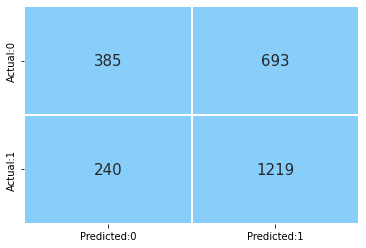

True Negative is: 385 False Positive is: 693 
 False Negative is: 240 True Positive is: 1219
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  63.22 %
Percentage of misclassified observations:  36.78 %

Specificity:  0.3571
Sensitivity:  0.8355
Accuracy of The Model From Confusion Matrix: 63.22 %

Metrics:
Accuracy: 0.632242806464328
Precision: 0.6375523012552301
Recall: 0.8355037697052776


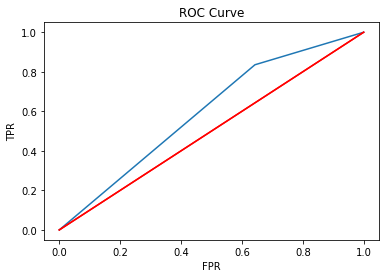

Roc_auc_score of The Model is: 0.5963233134240673


In [156]:
plot_confusion_matrix_test_np_rf(random_forest_ohtest_tuned_model)

In [157]:
y_pred_ohtest_tunned = random_forest_ohtest_tuned_model.predict(xtest[important_columns])
def plot_roc_test_np_rf(model):
    ypred_test = y_pred_ohtest_tunned
    fpr, tpr, thresholds = roc_curve(y_test, ypred_test)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # plot the ROC curve
    plt.plot(fpr, tpr)
    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)


    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, ypred_test),4)))
                               
    # plot the grid
    plt.grid(True)
    

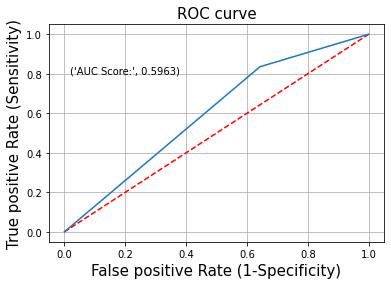

In [158]:
plot_roc_test_np_rf(random_forest_ohtest_tuned_model)

###### KNN TUNNING

###### KNN TRAIN

In [159]:
hyp_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev'],
                  'weights':['uniform','distance']}
knn=KNeighborsClassifier(n_jobs=-1)
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(knn,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

{'metric': 'hamming', 'n_neighbors': 23, 'weights': 'uniform'}

Accuracy of the Model is: 73.81 %
Confusion_Matrix:
 [[2680 1716]
 [ 942 4809]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67      4396
           1       0.74      0.84      0.78      5751

    accuracy                           0.74     10147
   macro avg       0.74      0.72      0.73     10147
weighted avg       0.74      0.74      0.73     10147

bias Error: 24.75
variance Error: 0.89


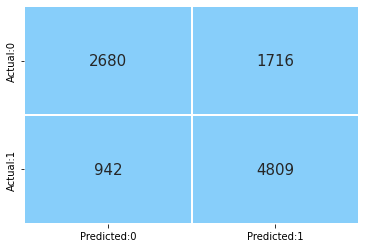

True Negative is: 2680 False Positive is: 1716 
 False Negative is: 942 True Positive is: 4809
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  73.81 %
Percentage of misclassified observations:  26.19 %

Specificity:  0.6096
Sensitivity:  0.8362
Accuracy of The Model From Confusion Matrix: 73.81 %

Metrics:
Accuracy: 0.738050655366118
Precision: 0.7370114942528736
Recall: 0.8362023995826813


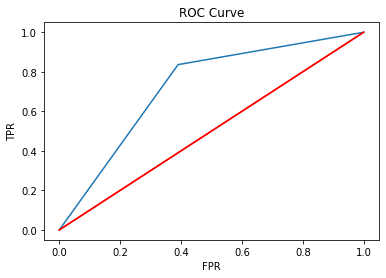

Roc_auc_score of The Model is: 0.7229237657604034


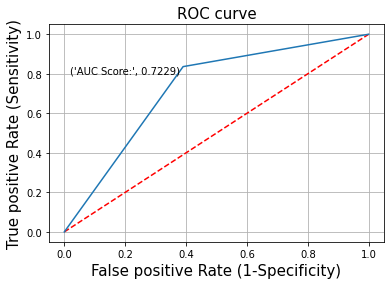

In [160]:
knn_oh_model2_train_tunned = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], 
                               metric=gs.best_params_['metric'],
                              weights=gs.best_params_['weights'])
knn_oh_model2_train_tunned=knn_oh_model2_train_tunned.fit(X_train,y_train)
modtrain(knn_oh_model2_train_tunned)
plot_confusion_matrix_train_np(knn_oh_model2_train_tunned)
plot_roc_train_np(knn_oh_model2_train_tunned)

###### KNN TEST

In [161]:
hyp_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev'],
                  'weights':['uniform','distance']}
knn=KNeighborsClassifier(n_jobs=-1)
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(knn,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}

Accuracy of the Model is: 99.37 %
Confusion_Matrix:
 [[1078    0]
 [  16 1443]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1078
           1       1.00      0.99      0.99      1459

    accuracy                           0.99      2537
   macro avg       0.99      0.99      0.99      2537
weighted avg       0.99      0.99      0.99      2537

bias Error: 26.9
variance Error: 1.35


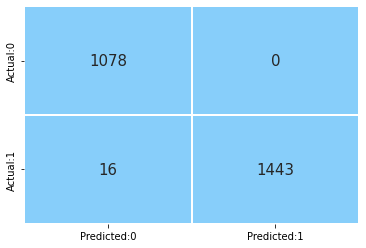

True Negative is: 1078 False Positive is: 0 
 False Negative is: 16 True Positive is: 1443
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  99.37 %
Percentage of misclassified observations:  0.63 %

Specificity:  1.0
Sensitivity:  0.989
Accuracy of The Model From Confusion Matrix: 99.37 %

Metrics:
Accuracy: 0.9936933385888845
Precision: 1.0
Recall: 0.9890335846470185


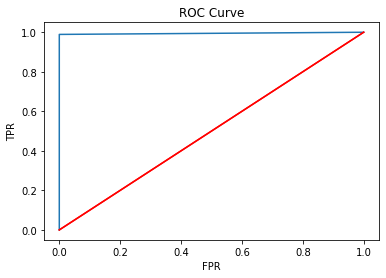

Roc_auc_score of The Model is: 0.9945167923235092


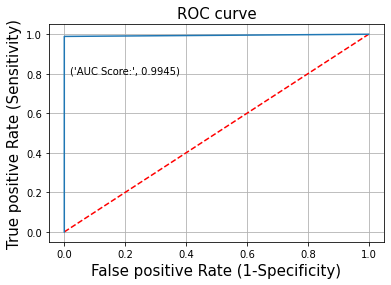

In [162]:
knn_oh_model2_test_tunned = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], 
                               metric=gs.best_params_['metric'],
                              weights=gs.best_params_['weights'])
knn_oh_model2_test_tunned=knn_oh_model2_test_tunned.fit(X_test,y_test)
modtest(knn_oh_model2_test_tunned)
plot_confusion_matrix_test_np(knn_oh_model2_test_tunned)
plot_roc_test_np(knn_oh_model2_test_tunned)

###### ADA BOOSTER TUNNING

###### ADA BOOSTER TRAIN TUNNING 

In [163]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
ab=AdaBoostClassifier(random_state=1)
gs=GridSearchCV(ab,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for AdaBoost Classifier: ', gs.best_params_, '\n')

Best parameters for AdaBoost Classifier:  {'learning_rate': 0.15, 'n_estimators': 350} 



Accuracy of the Model is: 67.92 %
Confusion_Matrix:
 [[2483 1913]
 [1342 4409]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60      4396
           1       0.70      0.77      0.73      5751

    accuracy                           0.68     10147
   macro avg       0.67      0.67      0.67     10147
weighted avg       0.68      0.68      0.68     10147

bias Error: 27.17
variance Error: 1.35


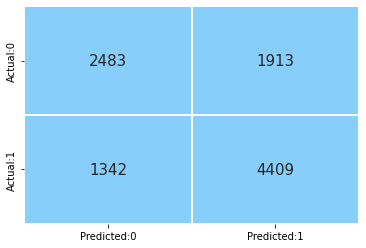

True Negative is: 2483 False Positive is: 1913 
 False Negative is: 1342 True Positive is: 4409
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  67.92 %
Percentage of misclassified observations:  32.08 %

Specificity:  0.5648
Sensitivity:  0.7666
Accuracy of The Model From Confusion Matrix: 67.92 %

Metrics:
Accuracy: 0.6792155316842416
Precision: 0.6974058842138564
Recall: 0.7666492783863675


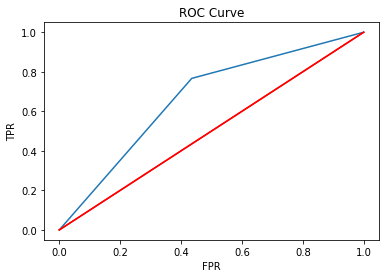

Roc_auc_score of The Model is: 0.665740471768252


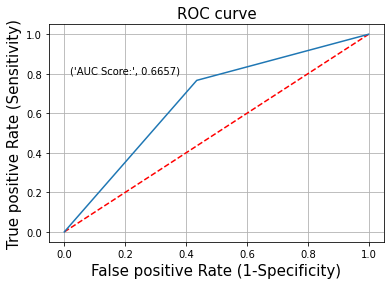

In [164]:
ada_oh_model2_train_tunned = AdaBoostClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'], 
                               random_state = 10)
ada_oh_model2_train_tunned=ada_oh_model2_train_tunned.fit(X_train,y_train)
modtrain(ada_oh_model2_train_tunned)
plot_confusion_matrix_train_np(ada_oh_model2_train_tunned)
plot_roc_train_np(ada_oh_model2_train_tunned)

###### ADA BOOSTER TEST TUNNING

In [165]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
ab=AdaBoostClassifier(random_state=1)
gs=GridSearchCV(ab,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for AdaBoost Classifier: ', gs.best_params_, '\n')

Best parameters for AdaBoost Classifier:  {'learning_rate': 0.1, 'n_estimators': 300} 



Accuracy of the Model is: 69.69 %
Confusion_Matrix:
 [[ 620  458]
 [ 311 1148]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.67      0.58      0.62      1078
           1       0.71      0.79      0.75      1459

    accuracy                           0.70      2537
   macro avg       0.69      0.68      0.68      2537
weighted avg       0.69      0.70      0.69      2537

bias Error: 26.63
variance Error: 0.59


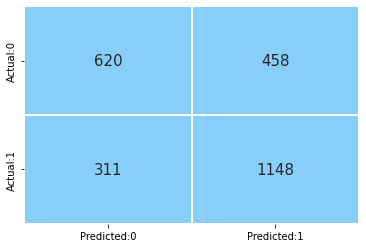

True Negative is: 620 False Positive is: 458 
 False Negative is: 311 True Positive is: 1148
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  69.69 %
Percentage of misclassified observations:  30.31 %

Specificity:  0.5751
Sensitivity:  0.7868
Accuracy of The Model From Confusion Matrix: 69.69 %

Metrics:
Accuracy: 0.6968860859282617
Precision: 0.7148194271481942
Recall: 0.7868403015764222


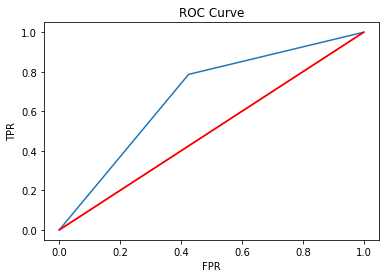

Roc_auc_score of The Model is: 0.6809897240720701


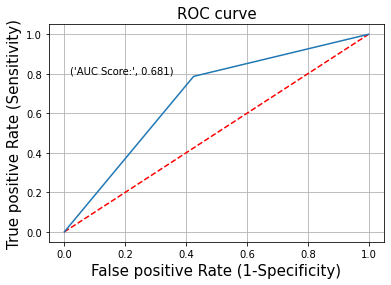

In [166]:
ada_oh_model2_test_tunned = AdaBoostClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'], 
                               random_state = 10)
ada_oh_model2_test_tunned=ada_oh_model2_test_tunned.fit(X_test,y_test)
modtest(ada_oh_model2_test_tunned)
plot_confusion_matrix_test_np(ada_oh_model2_test_tunned)
plot_roc_test_np(ada_oh_model2_test_tunned)

###### GRADIENT BOOSTING TUNNING

###### GRADIENT BOOSTING TRAIN TUNNING

In [172]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gb=GradientBoostingClassifier(random_state=1)
gs=GridSearchCV(gb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for Gradient Classifier: ', gs.best_params_, '\n')

Best parameters for Gradient Classifier:  {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 250} 



Accuracy of the Model is: 84.81 %
Confusion_Matrix:
 [[3446  950]
 [ 591 5160]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      4396
           1       0.84      0.90      0.87      5751

    accuracy                           0.85     10147
   macro avg       0.85      0.84      0.84     10147
weighted avg       0.85      0.85      0.85     10147

bias Error: 20.39
variance Error: 0.92


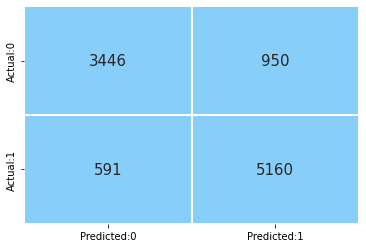

True Negative is: 3446 False Positive is: 950 
 False Negative is: 591 True Positive is: 5160
Total Classified by the Model For Train Set is: 10147
Percentage of correctly classified observations:  84.81 %
Percentage of misclassified observations:  15.19 %

Specificity:  0.7839
Sensitivity:  0.8972
Accuracy of The Model From Confusion Matrix: 84.81 %

Metrics:
Accuracy: 0.8481324529417562
Precision: 0.8445171849427169
Recall: 0.8972352634324465


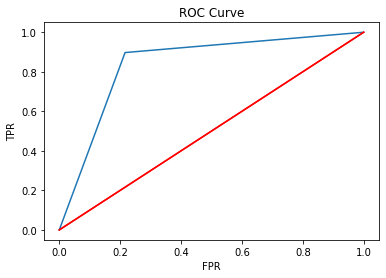

Roc_auc_score of The Model is: 0.8405648564659958


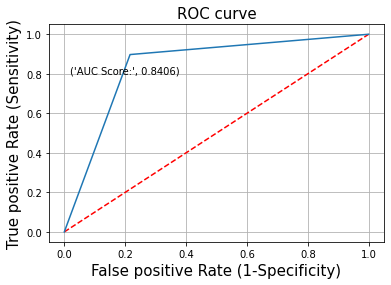

In [173]:
gb_oh_model2_train_tunned = GradientBoostingClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],max_depth=gs.best_params_['max_depth'],
                               random_state = 10)
gb_oh_model2_train_tunned=gb_oh_model2_train_tunned.fit(X_train,y_train)
modtrain(gb_oh_model2_train_tunned)
plot_confusion_matrix_train_np(gb_oh_model2_train_tunned)
plot_roc_train_np(gb_oh_model2_train_tunned)

###### GRADIENT BOOSTING TEST TUNNING

In [170]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gb=GradientBoostingClassifier(random_state=1)
gs=GridSearchCV(gb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for Gradient Classifier: ', gs.best_params_, '\n')

Best parameters for Gradient Classifier:  {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 120} 



Accuracy of the Model is: 77.97 %
Confusion_Matrix:
 [[ 743  335]
 [ 224 1235]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      1078
           1       0.79      0.85      0.82      1459

    accuracy                           0.78      2537
   macro avg       0.78      0.77      0.77      2537
weighted avg       0.78      0.78      0.78      2537

bias Error: 24.05
variance Error: 0.81


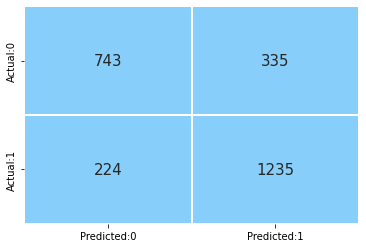

True Negative is: 743 False Positive is: 335 
 False Negative is: 224 True Positive is: 1235
Total Classified by the Model For Train Set is: 2537
Percentage of correctly classified observations:  77.97 %
Percentage of misclassified observations:  22.03 %

Specificity:  0.6892
Sensitivity:  0.8465
Accuracy of The Model From Confusion Matrix: 77.97 %

Metrics:
Accuracy: 0.7796610169491526
Precision: 0.7866242038216561
Recall: 0.8464701850582591


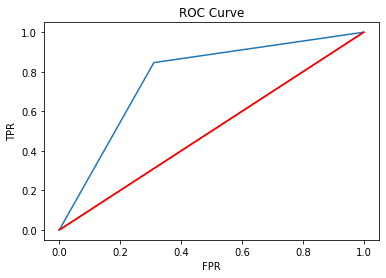

Roc_auc_score of The Model is: 0.767854758577367


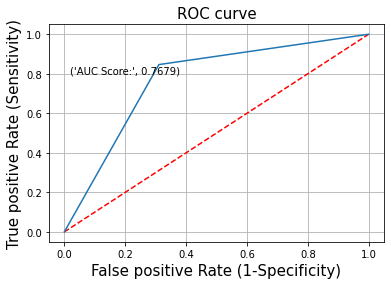

In [171]:
gb_oh_model2_test_tunned = GradientBoostingClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],max_depth=gs.best_params_['max_depth'], 
                               random_state = 10)
gb_oh_model2_test_tunned=gb_oh_model2_test_tunned.fit(X_test,y_test)
modtest(gb_oh_model2_test_tunned)
plot_confusion_matrix_test_np(gb_oh_model2_test_tunned)
plot_roc_test_np(gb_oh_model2_test_tunned)

###### XGRADIENT BOOSTING TUNNING

###### XGRADIENT BOOSTING TRAIN TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
xgb=XGBClassifier(random_state=1,n_jobs=-1,silent=True,verbosity=0)
gs=GridSearchCV(xgb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for XGBClassifier: ', gs.best_params_, '\n')

In [ ]:
xgb_oh_model2_train_tunned = XGBClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],
                                        gamma=gs.best_params_['gamma'],
                                        max_depth=gs.best_params_['max_depth'],
                                        random_state = 10)
xgb_oh_model2_train_tunned=xgb_oh_model2_train_tunned.fit(X_train,y_train)
modtrain(xgb_oh_model2_train_tunned)
plot_confusion_matrix_train_np(xgb_oh_model2_train_tunned)
plot_roc_train_np(xgb_oh_model2_train_tunned)

###### XGRADIENT BOOSTING TEST TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
xgb=XGBClassifier(random_state=1,n_jobs=-1,silent=True,verbosity=0)
gs=GridSearchCV(xgb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for XGBClassifier: ', gs.best_params_, '\n')

In [ ]:
xgb_oh_model2_test_tunned = XGBClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],
                                       gamma=gs.best_params_['gamma'],
                                        max_depth=gs.best_params_['max_depth'], 
                               random_state = 10)
xgb_oh_model2_test_tunned=xgb_oh_model2_test_tunned.fit(X_test,y_test)
modtest(xgb_oh_model2_test_tunned)
plot_confusion_matrix_test_np(xgb_oh_model2_test_tunned)
plot_roc_test_np(xgb_oh_model2_test_tunned)

## LABEL ENCODING

###### MODEL BUILDING ON LABEL ENCODING

In [ ]:
#MODEL BUILDING ON LABEL ENCODING
#MERGING CATEGORICAL AND NUMERICAL DATA

df_final_l = pd.concat([df_l_enc,df_num],axis=1)
df_final_l

In [ ]:
df_final_l.head()

In [ ]:
df_final_l.tail()

In [ ]:
df_final_l.shape

In [ ]:
df_final_l.columns

In [ ]:
#Our Data is Now Ready For Model Building
#Split the variables
X = df_final_l.drop('Y',axis=1)
y = df_final_l['Y']

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


###### LOGISTIC REGRESSION MODEL

In [ ]:
# Fitting Logistic Regression to the Training set
lr_l_train= LogisticRegression(random_state = 1)
lr_l_train=lr_l_train.fit(X_train, y_train)
modtrain(lr_l_train)

In [ ]:
#Recursive Feature Elimination
lr = LogisticRegression()
rfe = RFE(estimator=lr) # , scoring='r2')
rfe_model = rfe.fit(X,y)
rfe_model.ranking_
rank= pd.DataFrame()
rank['Feature']=X.columns
rank['Feature_Rank']=rfe_model.ranking_
fea_r=rank[rank['Feature_Rank']==1]
fea_r

In [ ]:
fea_r.count()

In [ ]:
fea_r.keys()

In [ ]:
xtrain=pd.DataFrame(X_train,columns=X_train[fea_r['Feature']].columns)
print(xtrain.columns)
print(xtrain.shape)

In [ ]:
xtest=pd.DataFrame(X_test,columns=X_test[fea_r['Feature']].columns)
print(xtest.columns)
print(xtest.shape)

In [ ]:
X_new= SelectKBest(chi2, k=11).fit_transform(X, y)
X_new.shape

###### TRAIN,TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 1)
X_train.shape,X_test.shape

###### LogisticRegression Model For Train Data

In [ ]:
# Fitting Logistic Regression to the Training set
lr_l_train = LogisticRegression(random_state = 1)
lr_l_train=lr_l_train.fit(X_train, y_train)
lr_l_train
modtrain(lr_l_train)
plot_confusion_matrix_train(lr_l_train)
plot_roc_train(lr_l_train)

###### TEST DATA

In [ ]:
# Fitting Logistic Regression to the Testing Data set
lr_l_test = LogisticRegression(random_state = 1)
lr_l_test=lr_l_test.fit(X_test, y_test)
lr_l_test
modtest(lr_l_test)
plot_confusion_matrix_test(lr_l_test)
plot_roc_test(lr_l_test)

###### Naive Bayes

###### Train Data

In [ ]:
# instantiate the 'GaussianNB'
gnb_l_train = GaussianNB()
# fit the model using fit() on train data
gnb_l_train = gnb_l_train.fit(X_train, y_train)
gnb_l_train 
modtrain(gnb_l_train)
plot_confusion_matrix_train(gnb_l_train)
plot_roc_train(gnb_l_train)

###### TEST DATASET

In [ ]:
# instantiate the 'GaussianNB'
gnb_l_test = GaussianNB()
# fit the model using fit() on TEST data
gnb_l_test = gnb_l_test.fit(X_test, y_test)
gnb_l_test
modtest(gnb_l_test)
plot_confusion_matrix_test(gnb_l_test)
plot_roc_test(gnb_l_test)

Interpretation: The recall for the positive class (i.e. customers who used the coupon) and the recall of the negative class (i.e. customers who will not use coupon) are stable. Thus, we can say that our model is performing good.

Note: Recall for the positive class is also known as Sensitivity and Recall for the negative class is also known as Specificity.

###### DECISION TREE

###### Train Data

In [ ]:
# fit the model using fit() on train data
decision_tree_l_train = DecisionTreeClassifier(random_state=1)
decision_tree_l_train = decision_tree_l_train.fit(X_train, y_train)
decision_tree_l_train
modtrain(decision_tree_l_train)
plot_confusion_matrix_train_np(decision_tree_l_train)
plot_roc_train_np(decision_tree_l_train)

###### TEST DATA

In [ ]:
decision_tree_l_test = DecisionTreeClassifier(random_state=1)
decision_tree_l_test = decision_tree_l_test.fit(X_test, y_test)
decision_tree_l_test
modtest(decision_tree_l_test)
plot_confusion_matrix_test_np(decision_tree_l_test)
plot_roc_test_np(decision_tree_l_test)

###### RANDOM FOREST

###### TRAIN DATASET

In [ ]:
# fit the model using fit() on train data
rf_l_train = RandomForestClassifier(random_state=1)
rf_l_train = rf_l_train.fit(X_train, y_train)
rf_l_train
modtrain(rf_l_train)
plot_confusion_matrix_train_np(rf_l_train)
plot_roc_train_np(rf_l_train)

###### TEST DATASET

In [ ]:
# fit the model using fit() on train data
rf_l_test = RandomForestClassifier(random_state=1)
rf_l_test = rf_l_test.fit(X_test, y_test)
rf_l_test
modtest(rf_l_test)
plot_confusion_matrix_test_np(rf_l_test)
plot_roc_test_np(rf_l_test)

###### KNN

###### TRAIN DATA

In [ ]:
knn_l_train = KNeighborsClassifier()
knn_l_train = knn_l_train.fit(X_train, y_train)
knn_l_train
modtrain(knn_l_train)
plot_confusion_matrix_train_np(knn_l_train)
plot_roc_train_np(knn_l_train)

###### TEST DATA

In [ ]:
knn_l_test = KNeighborsClassifier()
knn_l_test = knn_l_test.fit(X_test, y_test)
knn_l_test
modtest(knn_l_test)
plot_confusion_matrix_test_np(knn_l_test)
plot_roc_test_np(knn_l_test)

###### ENSEMLE TECHNIQUES

###### ADABOOSTING

###### TRAIN DATA

In [ ]:
ada_l_train = AdaBoostClassifier()
ada_l_train=ada_l_train.fit(X_train, y_train)
ada_l_train
modtrain(ada_l_train)
plot_confusion_matrix_train_np(ada_l_train)
plot_roc_train_np(ada_l_train)

###### TEST DATA

In [ ]:
ada_l_test = AdaBoostClassifier()
ada_l_test=ada_l_test.fit(X_test, y_test)
ada_l_test
modtest(ada_l_test)
plot_confusion_matrix_test_np(ada_l_test)
plot_roc_test_np(ada_l_test)

###### GRADIENT BOOSTING

###### Train Data

In [ ]:
gb_l_train=GradientBoostingClassifier()
gb_l_train=gb_l_train.fit(X_train,y_train)
gb_l_train
modtrain(gb_l_train)
plot_confusion_matrix_train_np(gb_l_train)
plot_roc_train_np(gb_l_train)

###### Test Data

In [ ]:
gb_l_test=GradientBoostingClassifier()
gb_l_test=gb_l_test.fit(X_test,y_test)
gb_l_test
modtest(gb_l_test)
plot_confusion_matrix_test_np(gb_l_test)
plot_roc_test_np(gb_l_test)

###### XGBOOSTER

###### TRAIN DATA

In [ ]:
xgb_l_train = XGBClassifier(random_state=1,silent=True,verbosity=0,n_jobs=-1)
xgb_l_train=xgb_l_train.fit(X_train, y_train)
xgb_l_train
modtrain(xgb_l_train)
plot_confusion_matrix_train_np(xgb_l_train)
plot_roc_train_np(xgb_l_train)

###### TEST DATA

In [ ]:
xgb_l_test= XGBClassifier(random_state=1,silent=True,verbosity=0,n_jobs=-1)
xgb_l_test=xgb_l_test.fit(X_test,y_test)
xgb_l_test
modtest(xgb_l_test)
plot_confusion_matrix_test_np(xgb_l_test)
plot_roc_test_np(xgb_l_test)

###### HYPER PARAMETER TUNING:-

###### NAIVE BAYES

###### TRAIN DATA

In [ ]:
hyp_paramaters = {'var_smoothing':np.logspace(0,-9,num=100)}
gnb= GaussianNB()
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(gnb,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

In [ ]:
gnb_l_model2_train_tunned = GaussianNB(var_smoothing=gs.best_params_['var_smoothing'])
gnb_l_model2_train_tunned=gnb_l_model2_train_tunned.fit(X_train,y_train)
modtrain(gnb_l_model2_train_tunned)
plot_confusion_matrix_train(gnb_l_model2_train_tunned)
plot_roc_train(gnb_l_model2_train_tunned)

###### TEST DATA

In [ ]:
hyp_paramaters = {'var_smoothing':np.logspace(0,-9,num=100)}
gnb= GaussianNB()
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(gnb,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
gs.best_params_

In [ ]:
gnb_l_model2_test_tunned = GaussianNB(var_smoothing=gs.best_params_['var_smoothing'])
gnb_l_model2_test_tunned=gnb_l_model2_test_tunned.fit(X_test,y_test)
modtest(gnb_l_model2_test_tunned)
plot_confusion_matrix_test(gnb_l_model2_test_tunned)
plot_roc_test(gnb_l_model2_test_tunned)

###### DECISION TREE

###### DECISION TREE TRAIN DATA

In [ ]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs=GridSearchCV(estimator=DecisionTreeClassifier(),n_jobs=-1,scoring='roc_auc',param_grid=hyp_paramaters,cv=kf)
gs.fit(X_train,y_train)
gs.best_params_

In [ ]:
dt2_l_train=DecisionTreeClassifier(criterion=gs.best_params_['criterion'],max_depth=gs.best_params_['max_depth'],
                                    min_samples_split=gs.best_params_['min_samples_split'])
dt2_l_train=dt2_l_train.fit(xtrain,y_train)
modtrain(dt2_l_train)
plot_confusion_matrix_train_np(dt2_l_train)
plot_roc_train_np(dt2_l_train)

###### DECISION TREE TEST DATA

In [ ]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs=GridSearchCV(estimator=DecisionTreeClassifier(),n_jobs=-1,scoring='roc_auc',param_grid=hyp_paramaters,cv=kf)
gs.fit(X_test,y_test)
gs.best_params_

In [ ]:
dt2_l_test=DecisionTreeClassifier(criterion=gs.best_params_['criterion'],max_depth=gs.best_params_['max_depth'],
                                    min_samples_split=['min_samples_split'])
dt2_l_test=dt2_l_test.fit(xtest,y_test)
modtest(dt2_l_test)
plot_confusion_matrix_test_np(dt2_l_test)
plot_roc_test_np(dt2_l_test)

###### RANDOM FOREST

###### RANDOM FOREST TRAIN DATA TUNNING

In [ ]:
rf_l_train = RandomForestClassifier(random_state = 1)
rfr_l_train = rf_l_train.fit(X_train, y_train)
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': rfr_l_train.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15,15))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [ ]:
pd.DataFrame(rfr_l_train.feature_importances_, columns = ['Imp'],index = xtrain.columns).sort_values(by = 'Imp',ascending= False)

In [ ]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]

kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs = GridSearchCV(estimator = rfr_l_train, 
                       param_grid = hyp_paramaters, 
                       cv = kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

In [ ]:
rfr_l_train = RandomForestClassifier(criterion = gs.best_params_['criterion'], 
                                                   max_depth = gs.best_params_['max_depth'], 
                                                   min_samples_split = gs.best_params_['min_samples_split'], 
                                                   n_estimators = gs.best_params_['n_estimators'],
                                                   random_state = 1)
rfr_l_train=rfr_l_train.fit(xtrain,y_train)
# get the top 10 important columns from the dataframe 'important_features' by using iloc
important_columns = list(important_features['Features'].iloc[:10])

# use fit() to fit the model on the train set
random_forest_ltrain_tuned_model = rfr_l_train.fit(xtrain[important_columns], y_train)

# predict for train set
y_pred_ltrain_tunned = random_forest_ltrain_tuned_model.predict(xtrain[important_columns])

In [ ]:
y_pred_ltrain_tunned = random_forest_ltrain_tuned_model.predict(xtrain[important_columns])
def modtrain_rf(model):
    ypred_train=y_pred_ltrain_tunned
    kf=KFold(n_splits=3,shuffle=True,random_state=1)
    model_train_acc = accuracy_score(y_train,ypred_train)
    print('Accuracy of the Model is:',round(model_train_acc*100,2),'%')
    print('Confusion_Matrix:\n',confusion_matrix(y_train,ypred_train))
    print('Classification_Report:\n',classification_report(y_train,ypred_train))
    score=cross_val_score(model,X_train,y_train,cv=kf,scoring='roc_auc')    
    print('bias Error:',round(np.mean(1-score)*100,2))
    print('variance Error:',round(np.std(score,ddof=1)*100,2))

In [ ]:
modtrain_rf(random_forest_ltrain_tuned_model)

In [ ]:
y_pred_ltrain_tunned = random_forest_ltrain_tuned_model.predict(xtrain[important_columns])
def plot_confusion_matrix_train_np_rf(model):
    ypred_train=y_pred_ltrain_tunned
    cm = confusion_matrix(y_train, ypred_train)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_train
    cnf_mat = confusion_matrix(y_act,ypred_train)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_train_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_train_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_train, ypred_train))
    print("Precision:",metrics.precision_score(y_train, ypred_train))
    print("Recall:",metrics.recall_score(y_train, ypred_train))

    fpr,tpr,thres = roc_curve(y_train,ypred_train)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_train,ypred_train))  # area under the curve

In [ ]:
plot_confusion_matrix_train_np_rf(random_forest_ltrain_tuned_model)

In [ ]:
y_pred_ltrain_tunned = random_forest_ltrain_tuned_model.predict(xtrain[important_columns])
def plot_roc_train_np_rf(model):
    ypred_train=y_pred_ltrain_tunned
    fpr, tpr, thresholds = roc_curve(y_train, ypred_train)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # plot the ROC curve
    plt.plot(fpr, tpr)
    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)


    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_train, ypred_train),4)))
                               
    # plot the grid
    plt.grid(True)

In [ ]:
plot_roc_train_np_rf(random_forest_ltrain_tuned_model)

###### RANDOM FOREST TEST DATA TUNNING

In [ ]:
rf_l_test = RandomForestClassifier(random_state = 1)
rfr_l_test = rf_l_test.fit(X_test, y_test)
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': xtest.columns, 
                                   'Importance': rfr_l_test.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15,15))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [ ]:
pd.DataFrame(rfr_l_test.feature_importances_, columns = ['Imp'],index = xtest.columns).sort_values(by = 'Imp',ascending= False)

In [ ]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]

kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs = GridSearchCV(estimator = rfr_l_test, 
                       param_grid = hyp_paramaters, 
                       cv = kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
gs.best_params_

In [ ]:
rfr_l_test = RandomForestClassifier(criterion = gs.best_params_['criterion'], 
                                                   max_depth = gs.best_params_['max_depth'], 
                                                   min_samples_split = gs.best_params_['min_samples_split'], 
                                                   n_estimators = gs.best_params_['n_estimators'],
                                                   random_state = 1)
rfr_l_test=rfr_l_test.fit(xtest,y_test)

# get the top 10 important columns from the dataframe 'important_features' by using iloc
important_columns = list(important_features['Features'].iloc[:10])

# instantiate the 'RandomForestClassifier' 

# use fit() to fit the model on the train set
random_forest_ltest_tuned_model = rfr_l_test.fit(xtest[important_columns], y_test)

# predict for test set
y_pred_ltest_tunned = random_forest_ltest_tuned_model.predict(xtest[important_columns])

In [ ]:
y_pred_ltest_tunned = random_forest_ltest_tuned_model.predict(xtest[important_columns])
def modtest_rf(model):
    ypred_test=y_pred_ltest_tunned
    kf=KFold(n_splits=3,shuffle=True,random_state=1)
    model_test_acc = accuracy_score(y_test,ypred_test)
    print('Accuracy of the Model is:',round(model_test_acc*100,2),'%')
    print('Confusion_Matrix:\n',confusion_matrix(y_test,ypred_test))
    print('Classification_Report:\n',classification_report(y_test,ypred_test))
    score=cross_val_score(model,X_test,y_test,cv=kf,scoring='roc_auc')    
    print('bias Error:',round(np.mean(1-score)*100,2))
    print('variance Error:',round(np.std(score,ddof=1)*100,2))

In [ ]:
modtest_rf(random_forest_ltest_tuned_model)

In [ ]:
y_pred_ltest_tunned = random_forest_ltest_tuned_model.predict(xtest[important_columns])
def plot_confusion_matrix_test_np_rf(model):
    ypred_test=y_pred_ltest_tunned
    cm = confusion_matrix(y_test, ypred_test)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_test
    cnf_mat = confusion_matrix(y_act,ypred_test)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    # round the result upto 4 decimal points
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_test_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_test_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_test, ypred_test))
    print("Precision:",metrics.precision_score(y_test, ypred_test))
    print("Recall:",metrics.recall_score(y_test, ypred_test))

    fpr,tpr,thres = roc_curve(y_test,ypred_test)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_test,ypred_test))  # area under the curve

In [ ]:
plot_confusion_matrix_test_np_rf(random_forest_ltest_tuned_model)

In [ ]:
y_pred_ltest_tunned = random_forest_ltest_tuned_model.predict(xtest[important_columns])
def plot_roc_test_np_rf(model):
    ypred_test = y_pred_ltest_tunned
    fpr, tpr, thresholds = roc_curve(y_test, ypred_test)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # plot the ROC curve
    plt.plot(fpr, tpr)
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)


    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, ypred_test),4)))
                               
    # plot the grid
    plt.grid(True)

In [ ]:
plot_roc_test_np_rf(random_forest_ltest_tuned_model)

###### KNN TUNNING

###### KNN TRAIN

In [ ]:
hyp_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev'],
                  'weights':['uniform','distance']}
knn=KNeighborsClassifier(n_jobs=-1)
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(knn,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

In [ ]:
knn_l_model2_train_tunned = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], 
                               metric=gs.best_params_['metric'],
                              weights=gs.best_params_['weights'])
knn_l_model2_train_tunned=knn_l_model2_train_tunned.fit(X_train,y_train)
modtrain(knn_l_model2_train_tunned)
plot_confusion_matrix_train_np(knn_l_model2_train_tunned)
plot_roc_train_np(knn_l_model2_train_tunned)

###### KNN TEST

In [ ]:
hyp_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev'],
                  'weights':['uniform','distance']}
knn=KNeighborsClassifier(n_jobs=-1)
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(knn,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
gs.best_params_

In [ ]:
knn_l_model2_test_tunned = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], 
                               metric=gs.best_params_['metric'],
                              weights=gs.best_params_['weights'])
knn_l_model2_test_tunned=knn_l_model2_test_tunned.fit(X_test,y_test)
modtest(knn_l_model2_test_tunned)
plot_confusion_matrix_test_np(knn_l_model2_test_tunned)
plot_roc_test_np(knn_l_model2_test_tunned)

###### ADA BOOSTER TUNNING

###### ADA BOOSTER TRAIN TUNNING 

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
ab=AdaBoostClassifier(random_state=1)
gs=GridSearchCV(ab,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for AdaBoost Classifier: ', gs.best_params_, '\n')

In [ ]:
ada_l_model2_train_tunned = AdaBoostClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'], 
                               random_state = 10)
ada_l_model2_train_tunned=ada_l_model2_train_tunned.fit(X_train,y_train)
modtrain(ada_l_model2_train_tunned)
plot_confusion_matrix_train_np(ada_l_model2_train_tunned)
plot_roc_train_np(ada_l_model2_train_tunned)

###### ADA BOOSTER TEST TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
ab=AdaBoostClassifier(random_state=1)
gs=GridSearchCV(ab,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for AdaBoost Classifier: ', gs.best_params_, '\n')

In [ ]:
ada_l_model2_test_tunned = AdaBoostClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'], 
                               random_state = 10)
ada_l_model2_test_tunned=ada_l_model2_test_tunned.fit(X_test,y_test)
modtest(ada_l_model2_test_tunned)
plot_confusion_matrix_test_np(ada_l_model2_test_tunned)
plot_roc_test_np(ada_l_model2_test_tunned)

###### GRADIENT BOOSTING TUNNING

###### GRADIENT BOOSTING TRAIN TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gb=GradientBoostingClassifier(random_state=1)
gs=GridSearchCV(gb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for Gradient Classifier: ', gs.best_params_, '\n')

In [ ]:
gb_l_model2_train_tunned = GradientBoostingClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],max_depth=gs.best_params_['max_depth'],
                               random_state = 10)
gb_l_model2_train_tunned=gb_l_model2_train_tunned.fit(X_train,y_train)
modtrain(gb_l_model2_train_tunned)
plot_confusion_matrix_train_np(gb_l_model2_train_tunned)
plot_roc_train_np(gb_l_model2_train_tunned)

###### GRADIENT BOOSTING TEST TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gb=GradientBoostingClassifier(random_state=1)
gs=GridSearchCV(gb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for Gradient Classifier: ', gs.best_params_, '\n')

In [ ]:
gb_l_model2_test_tunned = GradientBoostingClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],max_depth=gs.best_params_['max_depth'],
                               random_state = 10)
gb_l_model2_test_tunned=gb_l_model2_test_tunned.fit(X_test,y_test)
modtest(gb_l_model2_test_tunned)
plot_confusion_matrix_test_np(gb_l_model2_test_tunned)
plot_roc_test_np(gb_l_model2_test_tunned)

###### XGRADIENT BOOSTING TUNNING

###### XGRADIENT BOOSTING TRAIN TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
xgb=XGBClassifier(random_state=1,n_jobs=-1,silent=True,verbosity=0)
gs=GridSearchCV(xgb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for XGBClassifier: ', gs.best_params_, '\n')

In [ ]:
xgb_l_model2_train_tunned = XGBClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],
                                        gamma=gs.best_params_['gamma'],
                                        max_depth=gs.best_params_['max_depth'],
                                        random_state = 10)
xgb_l_model2_train_tunned=xgb_l_model2_train_tunned.fit(X_train,y_train)
modtrain(xgb_l_model2_train_tunned)
plot_confusion_matrix_train_np(xgb_l_model2_train_tunned)
plot_roc_train_np(xgb_l_model2_train_tunned)

###### XGRADIENT BOOSTING TEST TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
xgb=XGBClassifier(random_state=1,n_jobs=-1,silent=True,verbosity=0)
gs=GridSearchCV(xgb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for XGBClassifier: ', gs.best_params_, '\n')

In [ ]:
xgb_l_model2_test_tunned = XGBClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],
                                       gamma=gs.best_params_['gamma'],
                                        max_depth=gs.best_params_['max_depth'], 
                               random_state = 10)
xgb_l_model2_test_tunned=xgb_l_model2_test_tunned.fit(X_test,y_test)
modtest(xgb_l_model2_test_tunned)
plot_confusion_matrix_test_np(xgb_l_model2_test_tunned)
plot_roc_test_np(xgb_l_model2_test_tunned)

###### MODEL BUILDING ON FREQUENCY ENCODING

In [ ]:
df_f_enc.head(2)

In [ ]:
df_num.head(2)

In [ ]:
df_final_f = pd.concat([df_f_enc,df_num],axis=1)

In [ ]:
df_final_f

In [ ]:
df_final_f.head()

In [ ]:
df_final_f.tail()

In [ ]:
df_final_f.shape

In [ ]:
df_final_f.columns

In [ ]:
X = df_final_f.drop('Y',axis=1)
y = df_final_f['Y']

###### TRAIN,TEST SPLIT

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Fitting Logistic Regression to the Training set
lr_f_train= LogisticRegression(random_state = 1)
lr_f_train=lr_f_train.fit(X_train, y_train)
modtrain(lr_f_train)

In [ ]:
#Recursive Feature Elimination
lr = LogisticRegression()
rfe = RFE(estimator=lr) # , scoring='r2')
rfe_model = rfe.fit(X,y)
rfe_model.ranking_
rank= pd.DataFrame()
rank['Feature']=X.columns
rank['Feature_Rank']=rfe_model.ranking_
fea_r=rank[rank['Feature_Rank']==1]
fea_r

In [ ]:
fea_r.count()

In [ ]:
xtrain=pd.DataFrame(X_train,columns=X_train[fea_r['Feature']].columns)
print(xtrain.columns)
print(xtrain.shape)

In [ ]:
xtest=pd.DataFrame(X_test,columns=X_test[fea_r['Feature']].columns)
print(xtest.columns)
print(xtest.shape)

In [ ]:
X_new= SelectKBest(chi2, k=11).fit_transform(X, y)
X_new.shape

###### TRAIN,TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train.shape,X_test.shape

###### LOGISTIC REGRESSION MODEL

###### LogisticRegression Model For Train Data

In [ ]:
# Fitting Logistic Regression to the Training set
lr_f_train = LogisticRegression(random_state = 1)
lr_f_train=lr_f_train.fit(X_train, y_train)
lr_f_train
modtrain(lr_f_train)
plot_confusion_matrix_train(lr_f_train)
plot_roc_train(lr_f_train)

###### TEST DATA

In [ ]:
# Fitting Logistic Regression to the Testing Data set
lr_f_test = LogisticRegression(random_state = 1)
lr_f_test=lr_f_test.fit(X_test, y_test)
lr_f_test
modtest(lr_f_test)
plot_confusion_matrix_test(lr_f_test)
plot_roc_test(lr_f_test)

###### Naive Bayes

###### Train Data

In [ ]:
# instantiate the 'GaussianNB'
gnb_f_train = GaussianNB()
# fit the model using fit() on train data
gnb_f_train = gnb_f_train.fit(X_train, y_train)
gnb_f_train 
modtrain(gnb_f_train)
plot_confusion_matrix_train(gnb_f_train)
plot_roc_train(gnb_f_train)

###### TEST DATASET

In [ ]:
# instantiate the 'GaussianNB'
gnb_f_test = GaussianNB()
# fit the model using fit() on TEST data
gnb_f_test = gnb_f_test.fit(X_test, y_test)
gnb_f_test
modtest(gnb_f_test)
plot_confusion_matrix_test(gnb_f_test)
plot_roc_test(gnb_f_test)

###### DECISION TREE

###### Train Data

In [ ]:
# fit the model using fit() on train data
decision_tree_f_train = DecisionTreeClassifier(random_state=1)
decision_tree_f_train = decision_tree_f_train.fit(X_train, y_train)
decision_tree_f_train
modtrain(decision_tree_f_train)
plot_confusion_matrix_train_np(decision_tree_f_train)
plot_roc_train_np(decision_tree_f_train)

###### Test Data

In [ ]:
decision_tree_f_test = DecisionTreeClassifier(random_state=1)
decision_tree_f_test = decision_tree_f_test.fit(X_test, y_test)
decision_tree_f_test
modtest(decision_tree_f_test)
plot_confusion_matrix_test_np(decision_tree_f_test)
plot_roc_test_np(decision_tree_f_test)

###### RANDOM FOREST

##### TRAIN DATASET

In [ ]:
# fit the model using fit() on train data
rf_f_train = RandomForestClassifier(random_state=1)
rf_f_train = rf_f_train.fit(X_train, y_train)
rf_f_train
modtrain(rf_f_train)
plot_confusion_matrix_train_np(rf_f_train)
plot_roc_train_np(rf_f_train)

###### TEST DATASET

In [ ]:
# fit the model using fit() on train data
rf_f_test = RandomForestClassifier(random_state=1)
rf_f_test = rf_f_test.fit(X_test, y_test)
rf_f_test
modtest(rf_f_test)
plot_confusion_matrix_test_np(rf_f_test)
plot_roc_test_np(rf_f_test)

###### KNN

###### TRAIN DATA

In [ ]:
knn_f_train = KNeighborsClassifier()
knn_f_train = knn_f_train.fit(X_train, y_train)
knn_f_train
modtrain(knn_f_train)
plot_confusion_matrix_train_np(knn_f_train)
plot_roc_train_np(knn_f_train)

###### TEST DATA

In [ ]:
knn_f_test = KNeighborsClassifier()
knn_f_test = knn_f_test.fit(X_test, y_test)
knn_f_test
modtest(knn_f_test)
plot_confusion_matrix_test_np(knn_f_test)
plot_roc_test_np(knn_f_test)

###### ENSEMLE TECHNIQUES

###### ADABOOSTING

###### TRAIN DATA

In [ ]:
ada_f_train = AdaBoostClassifier()
ada_f_train=ada_f_train.fit(X_train, y_train)
ada_f_train
modtrain(ada_f_train)
plot_confusion_matrix_train_np(ada_f_train)
plot_roc_train_np(ada_f_train)

###### TEST DATA

In [ ]:
ada_f_test = AdaBoostClassifier()
ada_f_test=ada_f_test.fit(X_test, y_test)
ada_f_test
modtest(ada_f_test)
plot_confusion_matrix_test_np(ada_f_test)
plot_roc_test_np(ada_f_test)

###### GRADIENT BOOSTING

###### TRAIN DATA

In [ ]:
gb_f_train=GradientBoostingClassifier()
gb_f_train=gb_f_train.fit(X_train,y_train)
gb_f_train
modtrain(gb_f_train)
plot_confusion_matrix_train_np(gb_f_train)
plot_roc_train_np(gb_f_train)

###### Test Data

In [ ]:
gb_f_test=GradientBoostingClassifier()
gb_f_test=gb_f_test.fit(X_test,y_test)
gb_f_test
modtest(gb_f_test)
plot_confusion_matrix_test_np(gb_f_test)
plot_roc_test_np(gb_f_test)

###### XGBOOSTER

###### TRAIN DATA

In [ ]:
xgb_f_train = XGBClassifier(random_state=1,silent=True,verbosity=0,n_jobs=-1)
xgb_f_train=xgb_f_train.fit(X_train, y_train)
xgb_f_train
modtrain(xgb_f_train)
plot_confusion_matrix_train_np(xgb_f_train)
plot_roc_train_np(xgb_f_train)

###### TEST DATA

In [ ]:
xgb_f_test= XGBClassifier(random_state=1,silent=True,verbosity=0,n_jobs=-1)
xgb_f_test=xgb_f_test.fit(X_test,y_test)
xgb_f_test
modtest(xgb_f_test)
plot_confusion_matrix_test_np(xgb_f_test)
plot_roc_test_np(xgb_f_test)

###### HYPER PARAMETER TUNING:-

###### NAIVE BAYES

###### TRAIN DATA

In [ ]:
hyp_paramaters = {'var_smoothing':np.logspace(0,-9,num=100)}
gnb= GaussianNB()
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(gnb,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

In [ ]:
gnb_f_model2_train_tunned = GaussianNB(var_smoothing=gs.best_params_['var_smoothing'])
gnb_f_model2_train_tunned=gnb_f_model2_train_tunned.fit(X_train,y_train)
modtrain(gnb_f_model2_train_tunned)
plot_confusion_matrix_train_np(gnb_f_model2_train_tunned)
plot_roc_train_np(gnb_f_model2_train_tunned)

###### TEST DATA

In [ ]:
hyp_paramaters = {'var_smoothing':np.logspace(0,-9,num=100)}
gnb= GaussianNB()
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(gnb,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
gs.best_params_

In [ ]:
gnb_f_model2_test_tunned = GaussianNB(var_smoothing=gs.best_params_['var_smoothing'])
gnb_f_model2_test_tunned=gnb_f_model2_test_tunned.fit(X_test,y_test)
modtest(gnb_f_model2_train_tunned)
plot_confusion_matrix_test_np(gnb_f_model2_test_tunned)
plot_roc_test_np(gnb_f_model2_test_tunned)

###### DECISION TREE

###### DECISION TREE TRAIN DATA

In [ ]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs=GridSearchCV(estimator=DecisionTreeClassifier(),n_jobs=-1,scoring='roc_auc',param_grid=hyp_paramaters,cv=kf)
gs.fit(X_train,y_train)
gs.best_params_

In [ ]:
dt2_f_train=DecisionTreeClassifier(criterion='entropy',max_depth=gs.best_params_['max_depth'],
                                    min_samples_split=9)
dt2_f_train=dt2_f_train.fit(xtrain,y_train)
modtrain(dt2_f_train)
plot_confusion_matrix_train_np(dt2_f_train)
plot_roc_train_np(dt2_f_train)

###### DECISION TREE TEST DATA

In [ ]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs=GridSearchCV(estimator=DecisionTreeClassifier(),n_jobs=-1,scoring='roc_auc',param_grid=hyp_paramaters,cv=kf)
gs.fit(X_test,y_test)
gs.best_params_

In [ ]:
dt2_f_test=DecisionTreeClassifier(criterion='gini',max_depth=6,
                                    min_samples_split=8)
dt2_f_test=dt2_oh_test.fit(xtest,y_test)
modtest(dt2_oh_test)
plot_confusion_matrix_test_np(dt2_oh_test)
plot_roc_test_np(dt2_oh_test)

###### RANDOM FOREST

###### RANDOM FOREST TRAIN DATA TUNNING

In [ ]:
rf_f_train= RandomForestClassifier(random_state = 1)
rfr_f_train = rf_f_train.fit(X_train, y_train)
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': rfr_f_train.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15,15))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)


# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [ ]:
pd.DataFrame(rfr_f_train.feature_importances_, columns = ['Imp'],index = xtrain.columns).sort_values(by = 'Imp',ascending= False)

In [ ]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]

kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs = GridSearchCV(estimator = rfr_f_train, 
                       param_grid = hyp_paramaters, 
                       cv = kf,scoring='roc_auc',n_jobs=-1)
gs.fit(xtrain,y_train)
gs.best_params_

In [ ]:
rfr_f_train = RandomForestClassifier(criterion = gs.best_params_['criterion'], 
                                                   max_depth = gs.best_params_['max_depth'], 
                                                   min_samples_split = gs.best_params_['min_samples_split'], 
                                                   n_estimators = gs.best_params_['n_estimators'],
                                                   random_state = 1)
rfr_f_train=rfr_f_train.fit(xtrain,y_train)
# get the top 10 important columns from the dataframe 'important_features' by using iloc
important_columns = list(important_features['Features'].iloc[:10])

# use fit() to fit the model on the train set
random_forest_ftrain_tuned_model = rfr_f_train.fit(xtrain[important_columns], y_train)

# predict for train set
y_pred_ftrain_tunned = random_forest_ftrain_tuned_model.predict(xtrain[important_columns])

In [ ]:
y_pred_ftrain_tunned = random_forest_ftrain_tuned_model.predict(xtrain[important_columns])
def modtrain_rf(model):
    ypred_train=y_pred_ftrain_tunned
    kf=KFold(n_splits=3,shuffle=True,random_state=1)
    model_train_acc = accuracy_score(y_train,ypred_train)
    print('Accuracy of the Model is:',round(model_train_acc*100,2),'%')
    print('Confusion_Matrix:\n',confusion_matrix(y_train,ypred_train))
    print('Classification_Report:\n',classification_report(y_train,ypred_train))
    score=cross_val_score(model,X_train,y_train,cv=kf,scoring='roc_auc')    
    print('bias Error:',round(np.mean(1-score)*100,2))
    print('variance Error:',round(np.std(score,ddof=1)*100,2))

In [ ]:
modtrain_rf(random_forest_ftrain_tuned_model)

In [ ]:
y_pred_ftrain_tunned = random_forest_ftrain_tuned_model.predict(xtrain[important_columns])
def plot_confusion_matrix_train_np_rf(model):
    ypred_train=y_pred_ftrain_tunned
    cm = confusion_matrix(y_train, ypred_train)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_train
    cnf_mat = confusion_matrix(y_act,ypred_train)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    # round the result upto 4 decimal points
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_train_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_train_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_train, ypred_train))
    print("Precision:",metrics.precision_score(y_train, ypred_train))
    print("Recall:",metrics.recall_score(y_train, ypred_train))

    fpr,tpr,thres = roc_curve(y_train,ypred_train)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_train,ypred_train))  # area under the curve

In [ ]:
plot_confusion_matrix_train_np_rf(random_forest_ftrain_tuned_model)

In [ ]:
y_pred_ftrain_tunned = random_forest_ftrain_tuned_model.predict(xtrain[important_columns])
def plot_roc_train_np_rf(model):
    ypred_train=y_pred_ftrain_tunned
    fpr, tpr, thresholds = roc_curve(y_train, ypred_train)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # plot the ROC curve
    plt.plot(fpr, tpr)
    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)


    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_train, ypred_train),4)))
                               
    # plot the grid
    plt.grid(True)

In [ ]:
plot_roc_train_np_rf(random_forest_ftrain_tuned_model)

###### RANDOM FOREST TEST DATA TUNNING

In [ ]:
rf_f_test = RandomForestClassifier(random_state = 1)
rfr_f_test = rf_f_test.fit(X_test, y_test)
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': xtest.columns, 
                                   'Importance': rfr_f_test.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15,15))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [ ]:
pd.DataFrame(rfr_f_test.feature_importances_, columns = ['Imp'],index = xtest.columns).sort_values(by = 'Imp',ascending= False)

In [ ]:
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]

kf=KFold(n_splits=3,shuffle=True,random_state=1)
gs = GridSearchCV(estimator = rfr_f_test, 
                       param_grid = hyp_paramaters, 
                       cv = kf,scoring='roc_auc',n_jobs=-1)
gs.fit(xtest,y_test)
gs.best_params_

In [ ]:
rfr_f_test = RandomForestClassifier(criterion = gs.best_params_['criterion'], 
                                                   max_depth = gs.best_params_['max_depth'], 
                                                   min_samples_split = gs.best_params_['min_samples_split'], 
                                                   n_estimators = gs.best_params_['n_estimators'],
                                                   random_state = 1)
rfr_f_test=rfr_f_test.fit(xtest,y_test)
# get the top 10 important columns from the dataframe 'important_features' by using iloc
important_columns = list(important_features['Features'].iloc[:10])

# instantiate the 'RandomForestClassifier' 

# use fit() to fit the model on the train set
random_forest_ftest_tuned_model = rfr_f_test.fit(xtest[important_columns], y_test)

# predict for test set
y_pred_ftest_tunned = random_forest_ftest_tuned_model.predict(xtest[important_columns])

In [ ]:
y_pred_ftest_tunned = random_forest_ftest_tuned_model.predict(xtest[important_columns])
def modtest_rf(model):
    ypred_test=y_pred_ftest_tunned
    kf=KFold(n_splits=3,shuffle=True,random_state=1)
    model_test_acc = accuracy_score(y_test,ypred_test)
    print('Accuracy of the Model is:',round(model_test_acc*100,2),'%')
    print('Confusion_Matrix:\n',confusion_matrix(y_test,ypred_test))
    print('Classification_Report:\n',classification_report(y_test,ypred_test))
    score=cross_val_score(model,X_test,y_test,cv=kf,scoring='roc_auc')    
    print('bias Error:',round(np.mean(1-score)*100,2))
    print('variance Error:',round(np.std(score,ddof=1)*100,2))

In [ ]:
modtest_rf(random_forest_ftest_tuned_model)

In [ ]:
y_pred_ftest_tunned = random_forest_ftest_tuned_model.predict(xtest[important_columns])
def plot_confusion_matrix_test_np_rf(model):
    ypred_test=y_pred_ftest_tunned
    cm = confusion_matrix(y_test, ypred_test)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap = ListedColormap(['lightskyblue']), 
                linewidths = 0.1, annot_kws = {'size':15})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 10)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 10)

    # display the plot
    plt.show()
    
    y_act=y_test
    cnf_mat = confusion_matrix(y_act,ypred_test)
    tn = cnf_mat[0,0]
    tp = cnf_mat[1,1]
    fp = cnf_mat[0,1]
    fn = cnf_mat[1,0]
    print('True Negative is:',tn,'False Positive is:',fp,'\n','False Negative is:',fn,'True Positive is:',tp)

    # True Negative from confusion matrix
    TN = cm[0][0]
    # True Positive from confusion matrix
    TP = cm[1][1]
    # False Positive from confusion matrix
    FP = cm[0][1]
    # False Negative from confusion matrix
    FN = cm[1][0]

    # add all the values of a confusion matrix
    total = TN + TP + FP + FN
    print('Total Classified by the Model For Train Set is:',total)

    # find the percentage of correctly classified observations
    correct_classified_percentage = ((TN+TP)/total)*100
    print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2),'%')

    # find the percentage of  misclassified observations
    misclassified_percentage = ((FP+FN)/total)*100
    print("Percentage of misclassified observations: ", round(misclassified_percentage, 2),'%')

    # find the specificity
    specificity = TN/(TN+FP)
    print("\nSpecificity: ", round(specificity, 4))

    # find the sensitivity
    # round the result upto 4 decimal points
    sensitivity = TP/(TP+FN)
    print("Sensitivity: ", round(sensitivity, 4))


    model_test_acc = (tn+tp)/(tn+tp+fn+fp)
    print('Accuracy of The Model From Confusion Matrix:',round(model_test_acc*100,2),'%')

    print('\nMetrics:')
    print("Accuracy:",metrics.accuracy_score(y_test, ypred_test))
    print("Precision:",metrics.precision_score(y_test, ypred_test))
    print("Recall:",metrics.recall_score(y_test, ypred_test))

    fpr,tpr,thres = roc_curve(y_test,ypred_test)
    df_prob = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thres})
    df_prob

    plt.plot(fpr,tpr)
    plt.plot([[0,0],[1,1]],color='red') 

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

    plt.show()

    print('Roc_auc_score of The Model is:',roc_auc_score(y_test,ypred_test))  # area under the curve

In [ ]:
plot_confusion_matrix_test_np_rf(random_forest_ftest_tuned_model)

In [ ]:
y_pred_ftest_tunned = random_forest_ftest_tuned_model.predict(xtest[important_columns])
def plot_roc_test_np_rf(model):
    ypred_test = y_pred_ftest_tunned
    fpr, tpr, thresholds = roc_curve(y_test, ypred_test)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # plot the ROC curve
    plt.plot(fpr, tpr)
    
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive Rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive Rate (Sensitivity)', fontsize = 15)


    plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, ypred_test),4)))
                               
    # plot the grid
    plt.grid(True)

In [ ]:
plot_roc_test_np_rf(random_forest_ftest_tuned_model)

###### KNN TUNNING

###### KNN TRAIN

In [ ]:
hyp_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev'],
                  'weights':['uniform','distance']}
knn=KNeighborsClassifier(n_jobs=-1)
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(knn,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

In [ ]:
knn_f_model2_train_tunned = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], 
                               metric=gs.best_params_['metric'],
                              weights=gs.best_params_['weights'])
knn_f_model2_train_tunned=knn_f_model2_train_tunned.fit(X_train,y_train)
modtrain(knn_f_model2_train_tunned)
plot_confusion_matrix_train_np(knn_f_model2_train_tunned)
plot_roc_train_np(knn_f_model2_train_tunned)

###### KNN TEST

In [ ]:
hyp_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev'],
                  'weights':['uniform','distance']}
knn=KNeighborsClassifier(n_jobs=-1)
kf=KFold(n_splits=5,shuffle=True,random_state=1)
gs=GridSearchCV(knn,hyp_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
gs.best_params_

In [ ]:
knn_f_model2_test_tunned = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], 
                               metric=gs.best_params_['metric'],
                              weights=gs.best_params_['weights'])
knn_f_model2_test_tunned=knn_f_model2_test_tunned.fit(X_test,y_test)
modtest(knn_f_model2_test_tunned)
plot_confusion_matrix_test_np(knn_f_model2_test_tunned)
plot_roc_test_np(knn_f_model2_test_tunned)

###### ADA BOOSTER TUNNING

###### ADA BOOSTER TRAIN TUNNING 

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
ab=AdaBoostClassifier(random_state=1)
gs=GridSearchCV(ab,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for AdaBoost Classifier: ', gs.best_params_, '\n')

In [ ]:
ada_f_model2_train_tunned = AdaBoostClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'], 
                               random_state = 10)
ada_f_model2_train_tunned=ada_f_model2_train_tunned.fit(X_train,y_train)
modtrain(ada_f_model2_train_tunned)
plot_confusion_matrix_train_np(ada_f_model2_train_tunned)
plot_roc_train_np(ada_f_model2_train_tunned)

###### ADA BOOSTER TEST TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
ab=AdaBoostClassifier(random_state=1)
gs=GridSearchCV(ab,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for AdaBoost Classifier: ', gs.best_params_, '\n')

In [ ]:
ada_f_model2_test_tunned = AdaBoostClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'], 
                               random_state = 10)
ada_f_model2_test_tunned=ada_f_model2_test_tunned.fit(X_test,y_test)
modtest(ada_f_model2_test_tunned)
plot_confusion_matrix_test_np(ada_f_model2_test_tunned)
plot_roc_test_np(ada_f_model2_test_tunned)

###### GRADIENT BOOSTING TUNNING

###### GRADIENT BOOSTING TRAIN TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gb=GradientBoostingClassifier(random_state=1)
gs=GridSearchCV(gb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for Gradient Classifier: ', gs.best_params_, '\n')

In [ ]:
gb_f_model2_train_tunned = GradientBoostingClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'], 
                               random_state = 10)
gb_f_model2_train_tunned=gb_f_model2_train_tunned.fit(X_train,y_train)
modtrain(gb_f_model2_train_tunned)
plot_confusion_matrix_train_np(gb_f_model2_train_tunned)
plot_roc_train_np(gb_f_model2_train_tunned)

###### GRADIENT BOOSTING TEST TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
gb=GradientBoostingClassifier(random_state=1)
gs=GridSearchCV(gb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for Gradient Classifier: ', gs.best_params_, '\n')

In [ ]:
gb_f_model2_test_tunned = GradientBoostingClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'], 
                               random_state = 10)
gb_f_model2_test_tunned=gb_f_model2_test_tunned.fit(X_test,y_test)
modtest(gb_f_model2_test_tunned)
plot_confusion_matrix_test_np(gb_f_model2_test_tunned)
plot_roc_test_np(gb_f_model2_test_tunned)

###### XGRADIENT BOOSTING TUNNING

###### XGRADIENT BOOSTING TRAIN TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
xgb=XGBClassifier(random_state=1,n_jobs=-1,silent=True,verbosity=0)
gs=GridSearchCV(xgb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_train,y_train)
print('Best parameters for XGBClassifier: ', gs.best_params_, '\n')

In [ ]:
xgb_f_model2_train_tunned = XGBClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],
                                        gamma=gs.best_params_['gamma'],
                                        max_depth=gs.best_params_['max_depth'],
                                        random_state = 10)
xgb_f_model2_train_tunned=xgb_f_model2_train_tunned.fit(X_train,y_train)
modtrain(xgb_f_model2_train_tunned)
plot_confusion_matrix_train_np(xgb_f_model2_train_tunned)
plot_roc_train_np(xgb_f_model2_train_tunned)

###### XGRADIENT BOOSTING TEST TUNNING

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
kf=KFold(n_splits=3,shuffle=True,random_state=1)
xgb=XGBClassifier(random_state=1,n_jobs=-1,silent=True,verbosity=0)
gs=GridSearchCV(xgb,tuned_paramaters,cv=kf,scoring='roc_auc',n_jobs=-1)
gs.fit(X_test,y_test)
print('Best parameters for XGBClassifier: ', gs.best_params_, '\n')

In [ ]:
xgb_f_model2_test_tunned = XGBClassifier(learning_rate = gs.best_params_['learning_rate'], 
                               n_estimators = gs.best_params_['n_estimators'],
                                       gamma=gs.best_params_['gamma'],
                                        max_depth=gs.best_params_['max_depth'], 
                               random_state = 10)
xgb_f_model2_test_tunned=xgb_f_model2_test_tunned.fit(X_test,y_test)
modtest(xgb_f_model2_test_tunned)
plot_confusion_matrix_test_np(xgb_f_model2_test_tunned)
plot_roc_test_np(xgb_f_model2_test_tunned)